# 0921 - Tabular playground series

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set seaborn theme
sns.set_theme()

# Display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# import datasets
train = pd.read_csv('C:/Users/rbuzzini/Documents/Personale/Git/Python/Fun Projects/datasets/Kaggle competitions/train.csv',
    #sep=r'\s*,\s*'
     )
test = pd.read_csv('C:/Users/rbuzzini/Documents/Personale/Git/Python/Fun Projects/datasets/Kaggle competitions/test.csv')

# Lifecycle of a Data Science project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building 
5. Model Deployment

# 1- Data Analysis - Understanding data & data preprocessing

In [3]:
# Print shape of the datasets with rows and columns number
print('Train shape: {}.'.format(train.shape), 
    'Test shape: {}.'.format(test.shape), sep="\n")

Train shape: (957919, 120).
Test shape: (493474, 119).


In [4]:
# Target variable
set(train.columns) - set(test.columns)

{'claim'}

Claim values count in train and test set:

In [5]:
print('Rows without a claim: {}.'.format(train['claim'].value_counts()[0]), 
      'Rows with a claim: {}.'.format(train['claim'].value_counts()[1]), 
       sep="\n")

Rows without a claim: 480404.
Rows with a claim: 477515.


The target variable proportion is balanced. Later we won't have to downsample the data.

In [6]:
# Print top 5 records
train.head()

id       f1        f2         f3        f4       f5        f6       f7  \
0   0  0.10859  0.004314    -37.566  0.017364  0.28915 -10.25100   135.12   
1   1  0.10090  0.299610  11822.000  0.276500  0.45970  -0.83733  1721.90   
2   2  0.17803 -0.006980    907.270  0.272140  0.45948   0.17327  2298.00   
3   3  0.15236  0.007259    780.100  0.025179  0.51947   7.49140   112.51   
4   4  0.11623  0.502900   -109.150  0.297910  0.34490  -0.40932  2538.90   

         f8            f9        f10      f11           f12      f13  \
0  168900.0  3.992400e+14     86.489  0.59881  1.423200e+09  0.27240   
1  119810.0  3.874100e+15   9953.600  1.20930  3.334100e+09  0.28631   
2  360650.0  1.224500e+13  15827.000  0.38164  1.230300e+09  0.25807   
3  259490.0  7.781400e+13    -36.837  1.10960  1.223100e+09  0.30944   
4   65332.0  1.907200e+15    144.120  1.05310  2.634100e+09  0.29782   

         f14       f15       f16     f17     f18      f19      f20        f21  \
0   9.455600 -0.050305  1938.300  8.6331  4.0607  26.8670   -1.180   10961.00   
1  -0.012858 -0.019912    10.284  6.1872  1.0419   4.6404   31.877  123620.00   
2   2.455600       NaN    26.873  7.5463  1.9967   1.9526  817.760   -2948.70   
3  10.370000 -0.106260   533.840  7.8490  1.0379   8.0030   12.349    -195.28   
4   2.654800       NaN  1808.900  7.2783  3.9757      NaN      NaN   29520.00   

      f22       f23      f24       f25           f26           f27        f28  \
0  1.5397  135.3200 -1.49650   440.080  2.590100e+12  2.194200e+09  2968800.0   
1  1.3951  125.8100  1.19890   136.450  9.098100e+09  4.004100e+10  1564000.0   
2  2.0054    1.6826  1.19680    74.624 -3.273900e+10  5.718900e+10    11058.0   
3  2.5598   92.1420  0.63789  1054.900 -1.204100e+10  5.187300e+12  1475400.0   
4  3.4225   96.7250  0.79725   215.570  1.732600e+13  2.635200e+12  2161200.0   

        f29      f30      f31       f32       f33       f34           f35  \
0  0.001431  13.3270  0.75050   18509.0  146820.0 -0.000276  1.090600e+16   
1  0.000204   3.1074  1.50330  238000.0   21440.0 -0.001344  3.079400e+16   
2 -0.003097   8.0241  1.13180   27940.0  862460.0 -0.002207  5.849100e+13   
3  1.036500   1.1903  0.98941  301200.0       NaN -0.000007 -9.299200e+13   
4  0.895470   6.8257  0.97413  142620.0  231350.0  0.001257  1.012500e+16   

        f36      f37     f38     f39       f40      f41       f42      f43  \
0  1705.400   414.29  3.5392  1888.0  0.968930  18.3880 -0.001583   7.7059   
1   229.100   844.82  1.4680  4726.5  0.915380  -1.5321  0.982600   7.1112   
2  -897.840      NaN  1.3561  3063.4  0.086232  16.1060  0.001481  11.4760   
3   -10.818  1020.30  2.9553  3342.5 -0.000372  17.0110  0.095268   5.7448   
4    51.508   293.76  1.3351  3042.1  0.006791  94.8890  0.917090   8.7369   

       f44       f45     f46      f47      f48       f49       f50     f51  \
0   5.9325  0.025693  4.5604  0.61122  10.7950  0.341930  0.235010     NaN   
1   2.0797  0.042321  4.2523  0.41871   5.4499  0.012737  0.386470  7.3082   
2   5.3430  0.012162  4.1018 -0.88270   8.1228 -0.676690  0.337700 -1.0732   
3  15.8830  0.037934  4.4860 -0.88909   8.4384 -1.189800  0.001391     NaN   
4      NaN  0.020281  3.9115  0.65634   6.1410 -1.089600  0.247940  7.9704   

       f52       f53     f54       f55       f56       f57      f58     f59  \
0  5237.70   1.29610  163.66  0.403780  0.188600 -0.001446 -0.35416  6.6432   
1   283.21  -0.92552  140.80  0.247390 -0.001656 -0.000975 -0.22629  2.4246   
2  4097.00  13.45800  159.24  0.322300  0.560090  0.000455 -0.16083  3.5753   
3   175.81  67.13300  119.26  0.007034  0.460040 -0.000705 -0.39149  2.0888   
4  2063.10   0.80633  131.77  0.177960  0.989380  0.000344 -0.98027  2.3610   

       f60       f61           f62     f63       f64      f65      f66  \
0  0.30534  0.514020  1.907300e+09  29.861  0.965010   1797.2   72.178   
1  0.77147  0.011613  1.803700e+09  64.604  0.262650   4455.0   78.339   
2  0.60970  0.028301  5.271300e+08 

### In Data Analysis we will pass through the analysis of all the following steps:
1. Missing Values
2. All the numerical variables
3. Distribution of the numerical variables
4. Categorical variables
5. Cardinality of categorical variables
6. Outliers
7. Relationship between independent and dependent features (claim)

In [7]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Data columns (total 120 columns):
 #    Column  Dtype  
---   ------  -----  
 0    id      int64  
 1    f1      float64
 2    f2      float64
 3    f3      float64
 4    f4      float64
 5    f5      float64
 6    f6      float64
 7    f7      float64
 8    f8      float64
 9    f9      float64
 10   f10     float64
 11   f11     float64
 12   f12     float64
 13   f13     float64
 14   f14     float64
 15   f15     float64
 16   f16     float64
 17   f17     float64
 18   f18     float64
 19   f19     float64
 20   f20     float64
 21   f21     float64
 22   f22     float64
 23   f23     float64
 24   f24     float64
 25   f25     float64
 26   f26     float64
 27   f27     float64
 28   f28     float64
 29   f29     float64
 30   f30     float64
 31   f31     float64
 32   f32     float64
 33   f33     float64
 34   f34     float64
 35   f35     float64
 36   f36     float64
 37   f37     float64
 38   f3

All predictors are numerical, so steps 4 and 5 won't be necessary in this analysis.

## 1. Missing values

In [8]:
# Here we will check the percentage of non values present in each feature.
# Step 1: check variables wich has NAs
# Step 2: print each feature name and its percentage of missing values

features_with_na=[features for features in train.columns if train[features].isnull().sum() > 0]
# [features for features in train.columns if train[features].isna().sum()>0] would give the same result

for feature in features_with_na:
    print('{0} has {1}% of missing values '.format(feature, np.round(train[feature].isnull().mean() * 100, 3)))

f1 has 1.592% of missing values 
f2 has 1.586% of missing values 
f3 has 1.617% of missing values 
f4 has 1.624% of missing values 
f5 has 1.608% of missing values 
f6 has 1.62% of missing values 
f7 has 1.619% of missing values 
f8 has 1.605% of missing values 
f9 has 1.592% of missing values 
f10 has 1.589% of missing values 
f11 has 1.61% of missing values 
f12 has 1.628% of missing values 
f13 has 1.614% of missing values 
f14 has 1.589% of missing values 
f15 has 1.619% of missing values 
f16 has 1.612% of missing values 
f17 has 1.61% of missing values 
f18 has 1.6% of missing values 
f19 has 1.615% of missing values 
f20 has 1.613% of missing values 
f21 has 1.613% of missing values 
f22 has 1.595% of missing values 
f23 has 1.603% of missing values 
f24 has 1.632% of missing values 
f25 has 1.619% of missing values 
f26 has 1.603% of missing values 
f27 has 1.612% of missing values 
f28 has 1.594% of missing values 
f29 has 1.609% of missing values 
f30 has 1.607% of missing va

Here we can see that each feature (f1 to f118) has about 1.6% of null values.
Is it the same for the test set?

In [9]:
features_with_na_test = [features for features in test.columns if test[features].isnull().sum() > 0]
# [features for features in train.columns if train[features].isna().sum()>0] would give the same result

for feature in features_with_na_test:
    print('{0} has {1}% of missing values '.format(feature, np.round(train[feature].isnull().mean() * 100, 3)))

f1 has 1.592% of missing values 
f2 has 1.586% of missing values 
f3 has 1.617% of missing values 
f4 has 1.624% of missing values 
f5 has 1.608% of missing values 
f6 has 1.62% of missing values 
f7 has 1.619% of missing values 
f8 has 1.605% of missing values 
f9 has 1.592% of missing values 
f10 has 1.589% of missing values 
f11 has 1.61% of missing values 
f12 has 1.628% of missing values 
f13 has 1.614% of missing values 
f14 has 1.589% of missing values 
f15 has 1.619% of missing values 
f16 has 1.612% of missing values 
f17 has 1.61% of missing values 
f18 has 1.6% of missing values 
f19 has 1.615% of missing values 
f20 has 1.613% of missing values 
f21 has 1.613% of missing values 
f22 has 1.595% of missing values 
f23 has 1.603% of missing values 
f24 has 1.632% of missing values 
f25 has 1.619% of missing values 
f26 has 1.603% of missing values 
f27 has 1.612% of missing values 
f28 has 1.594% of missing values 
f29 has 1.609% of missing values 
f30 has 1.607% of missing va

The percentage of null values is roughly the same between training and testing data.
Now we have understand how the null values are distributed thorugh datasets records.

In [10]:
print('Only {}% of train set rows have no null values.'.format(np.round((train.dropna().shape[0] / train.shape[0]) * 100, 2)),
    'The situation is similar for the test set: {}% of test set rows have no null values.'.format(np.round((test.dropna().shape[0] / test.shape[0]) * 100, 2)), sep='\n')

Only 37.53% of train set rows have no null values.
The situation is similar for the test set: 37.63% of test set rows have no null values.


There aren't many missings for each feature, but only about 37% of the datasets
have no NAs. In the feature engineering section we'll have to replace them.
Now we can see if there is some relationship between null values and claim column.

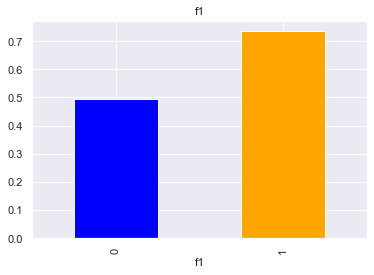

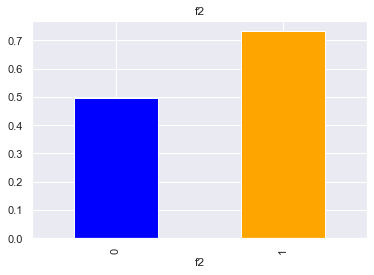

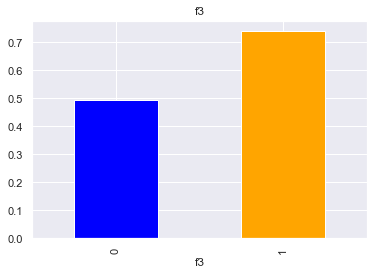

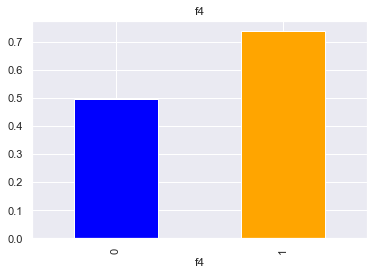

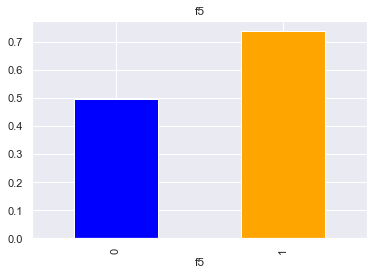

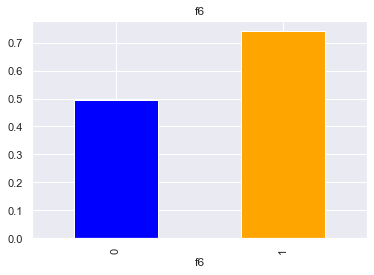

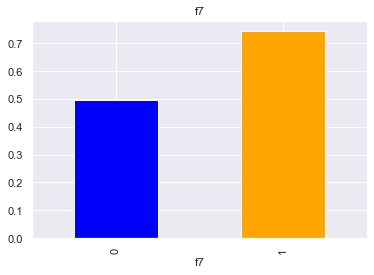

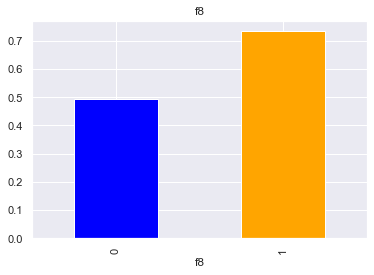

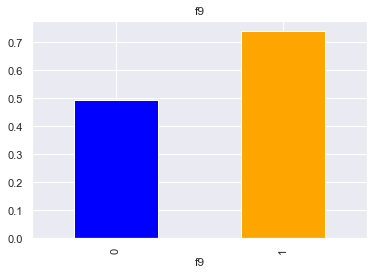

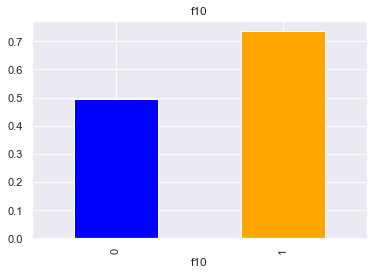

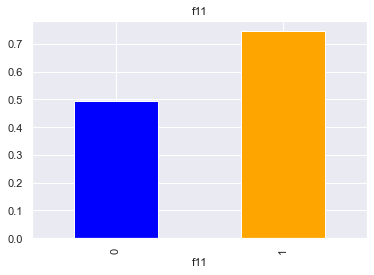

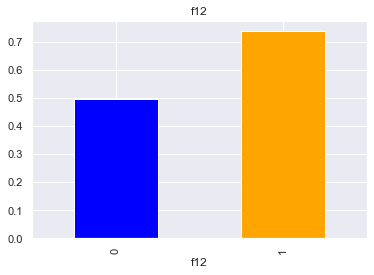

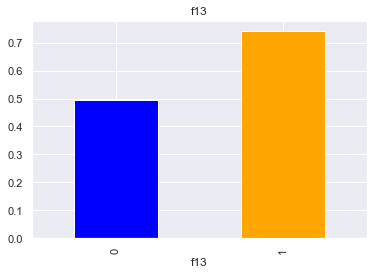

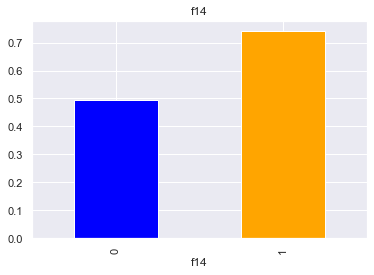

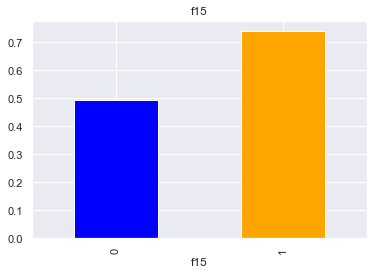

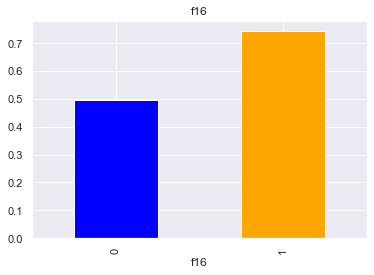

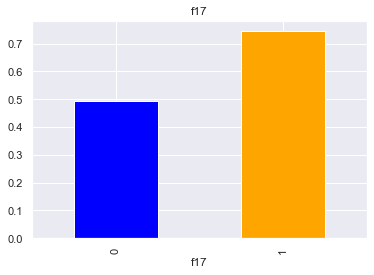

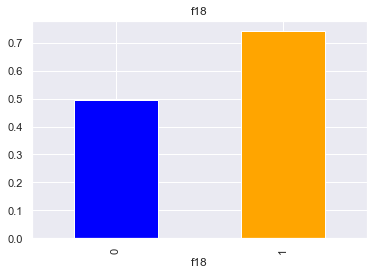

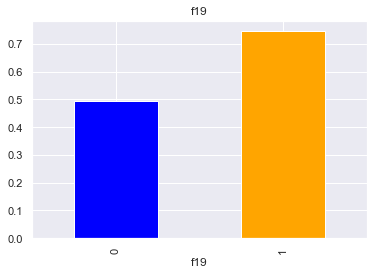

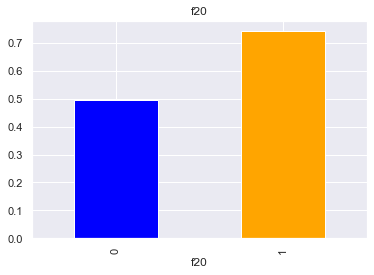

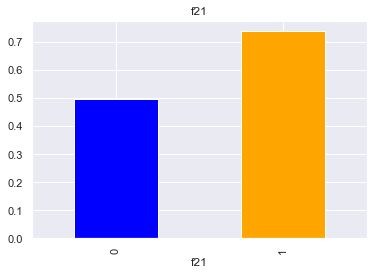

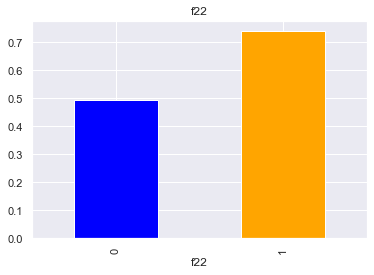

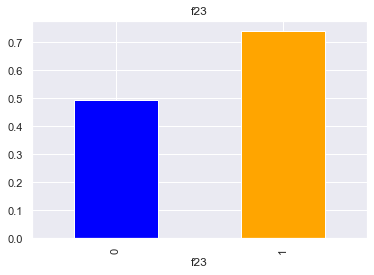

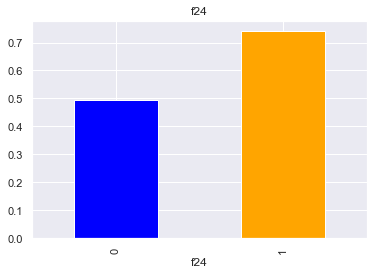

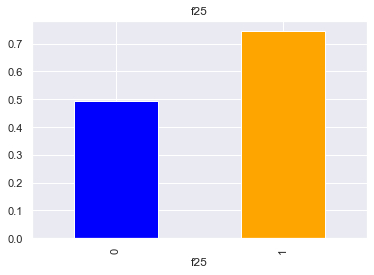

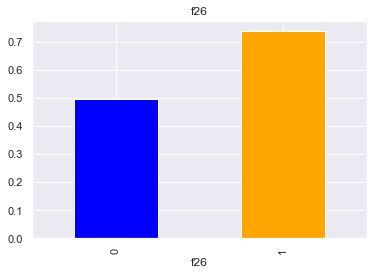

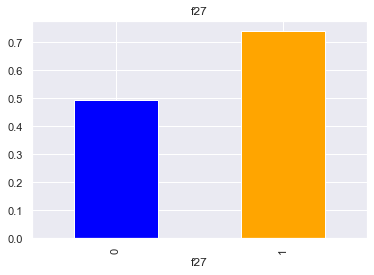

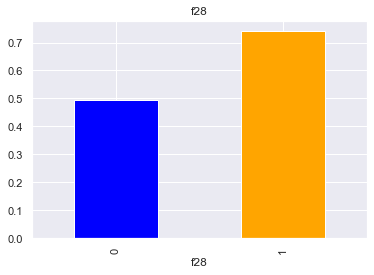

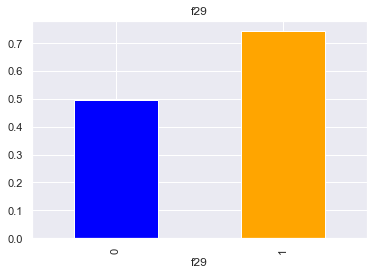

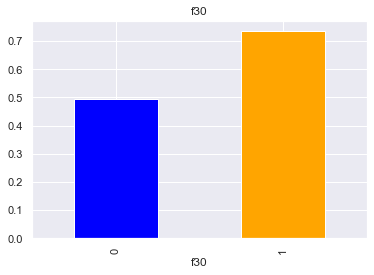

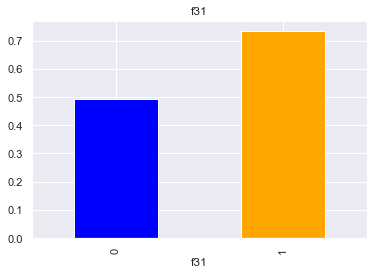

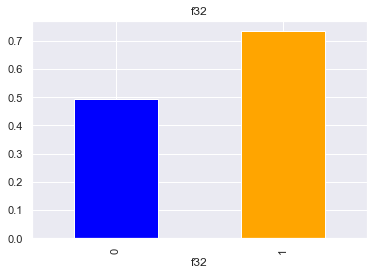

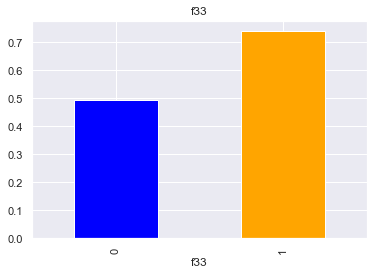

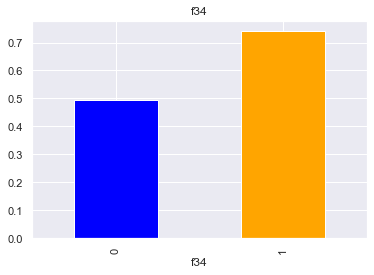

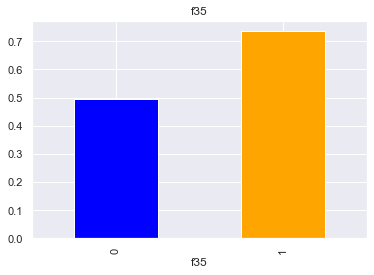

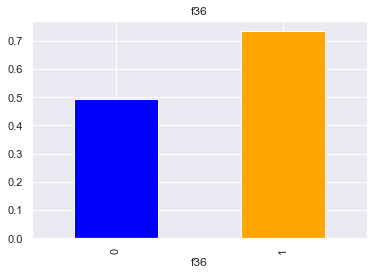

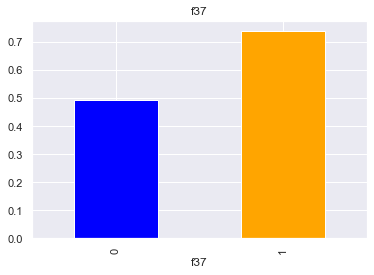

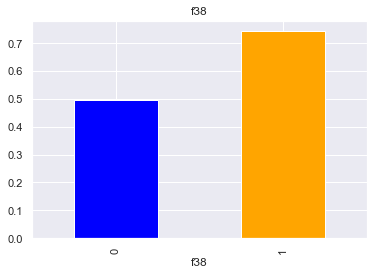

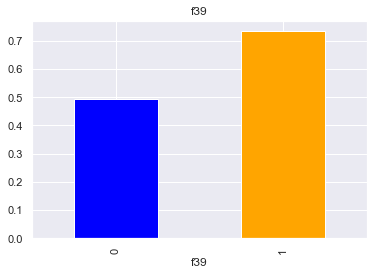

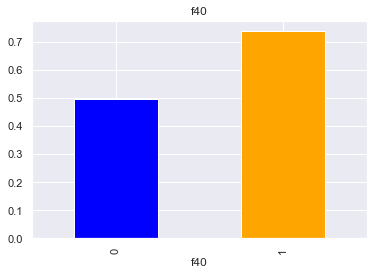

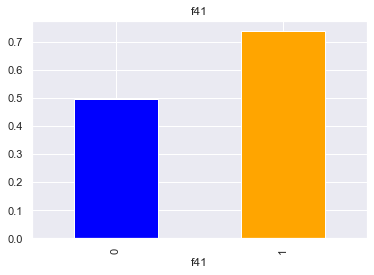

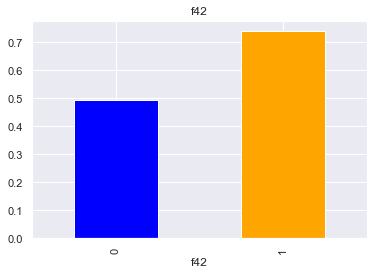

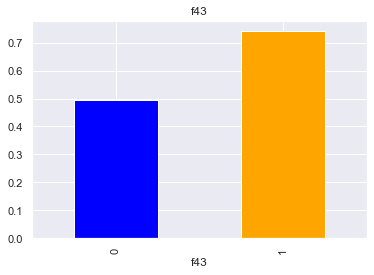

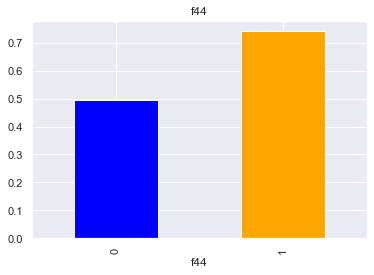

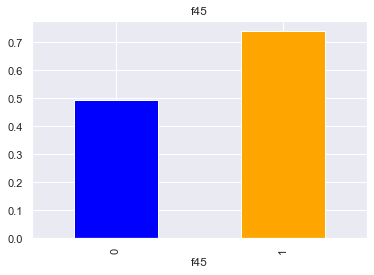

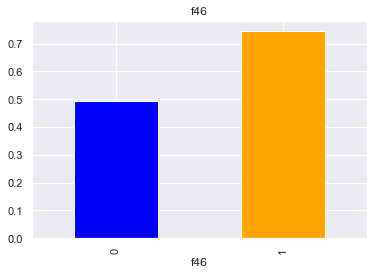

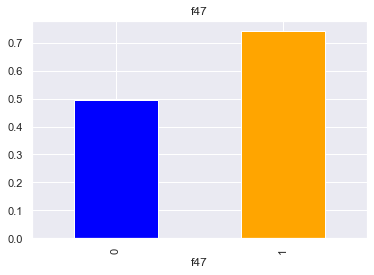

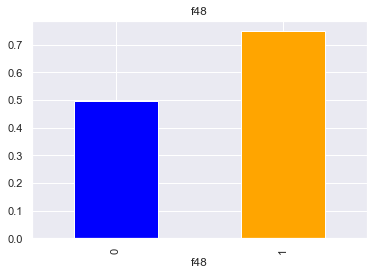

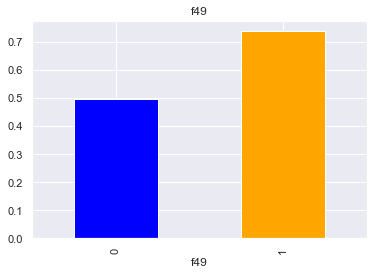

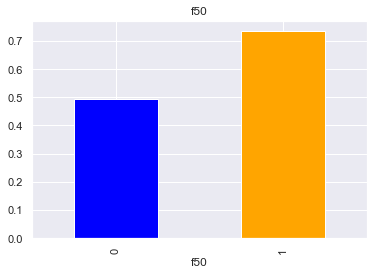

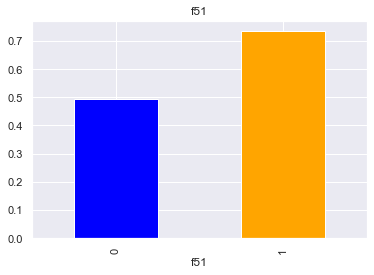

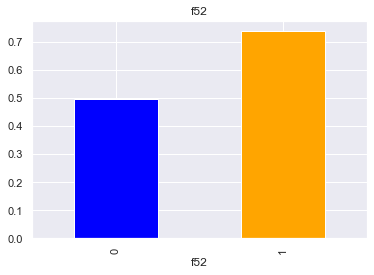

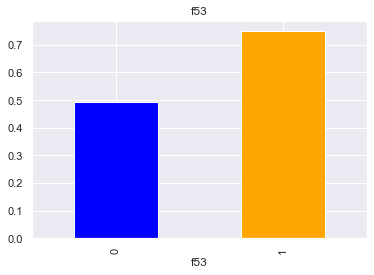

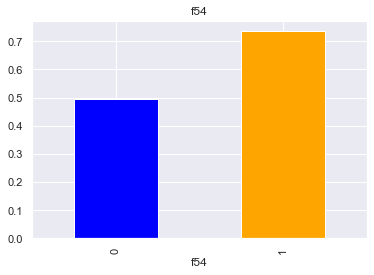

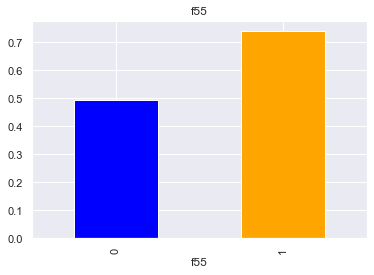

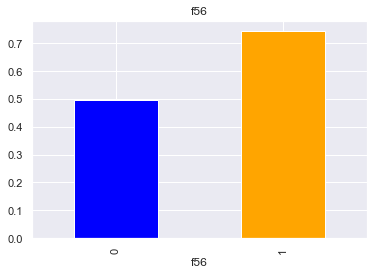

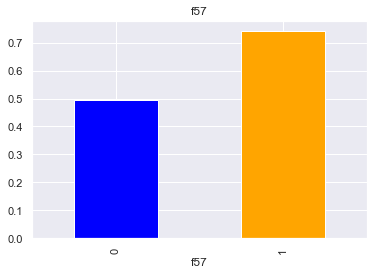

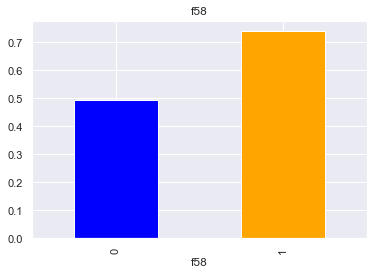

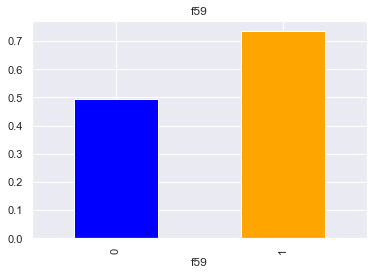

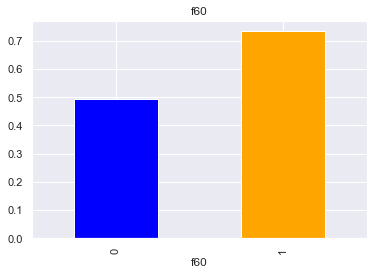

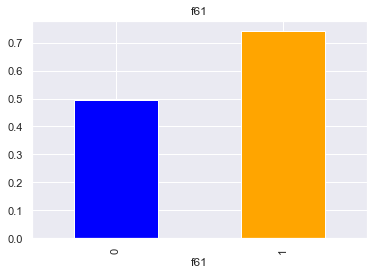

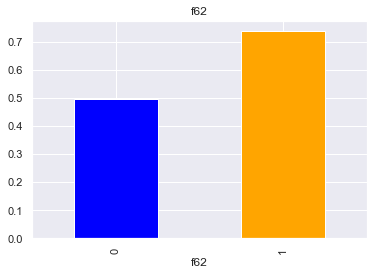

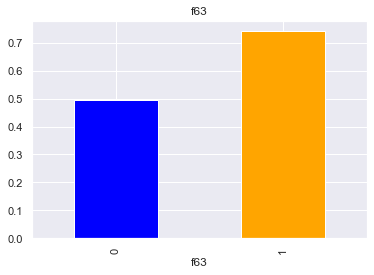

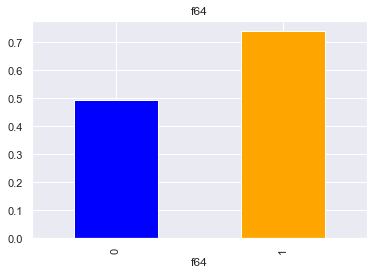

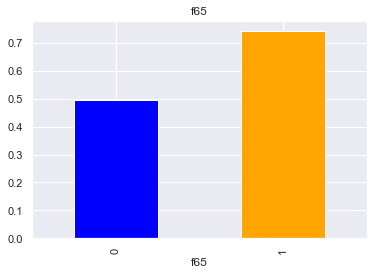

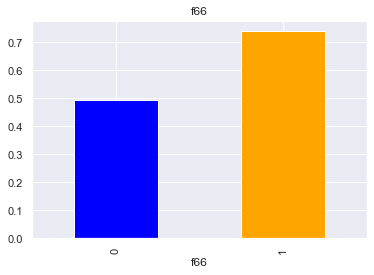

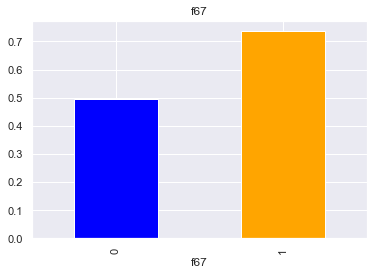

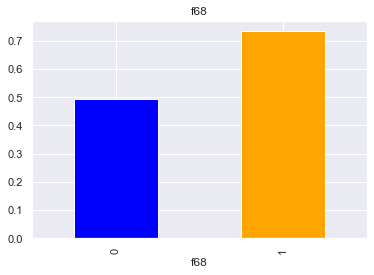

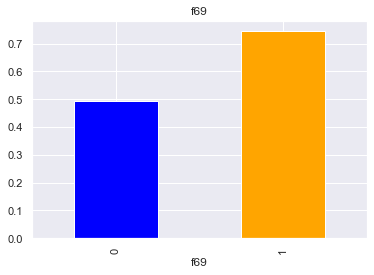

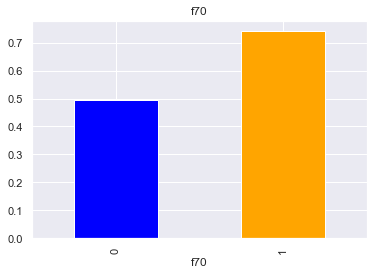

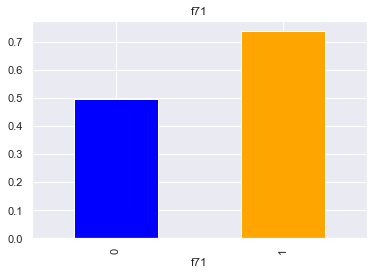

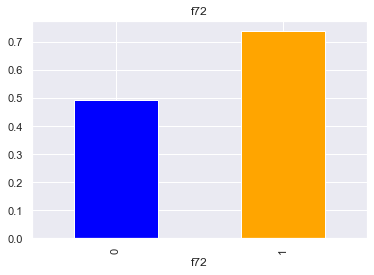

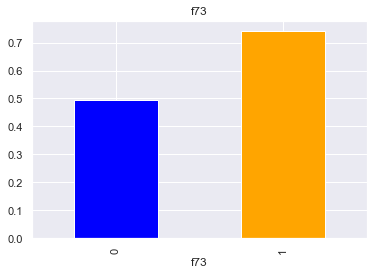

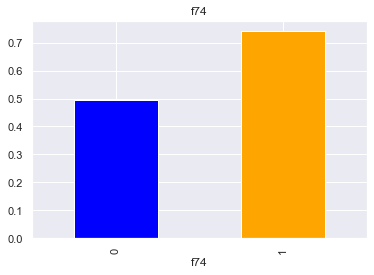

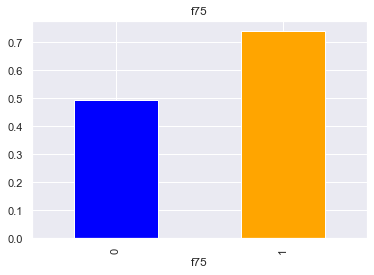

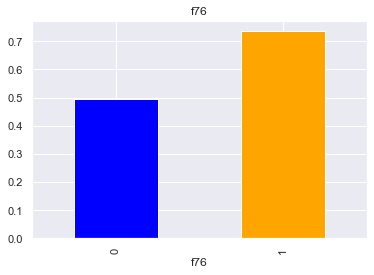

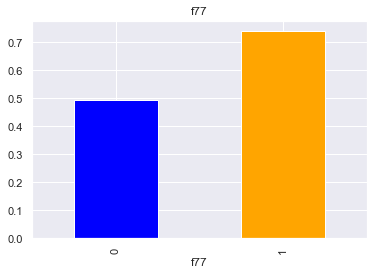

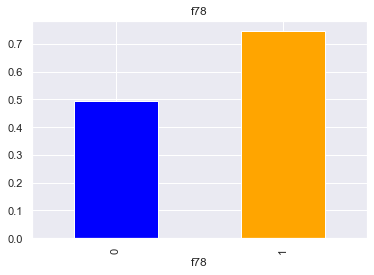

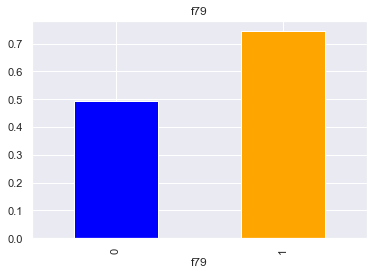

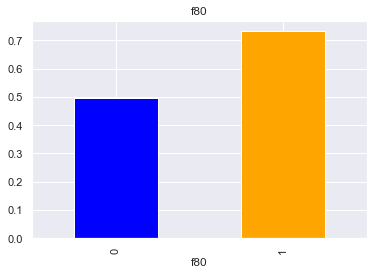

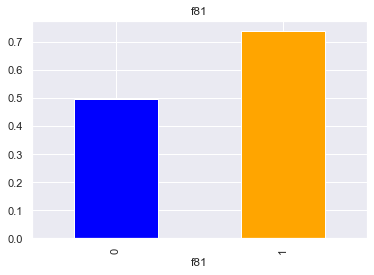

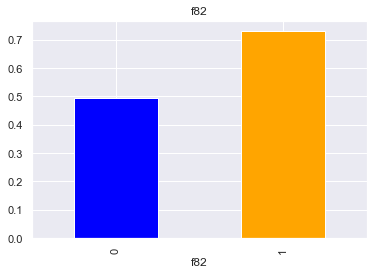

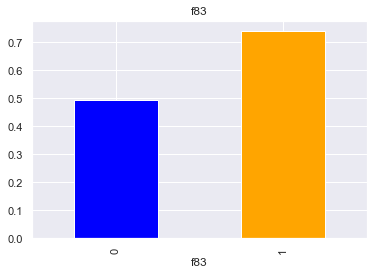

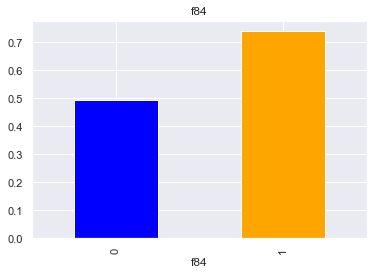

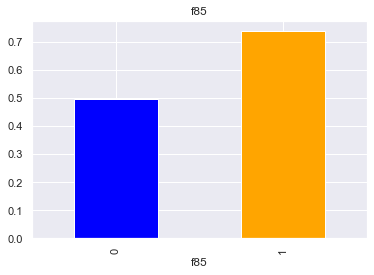

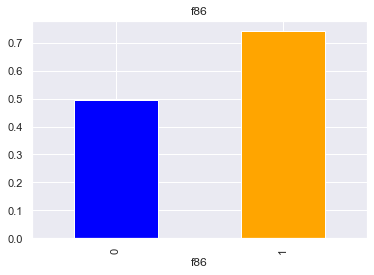

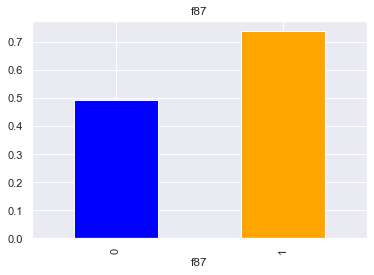

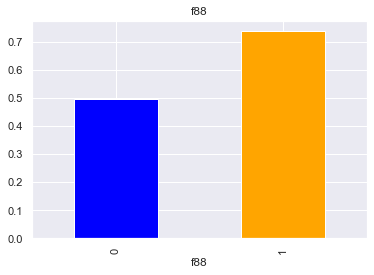

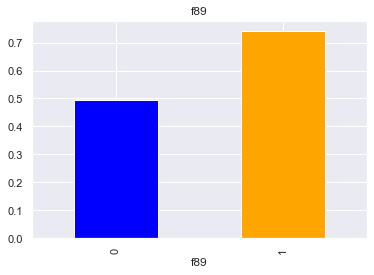

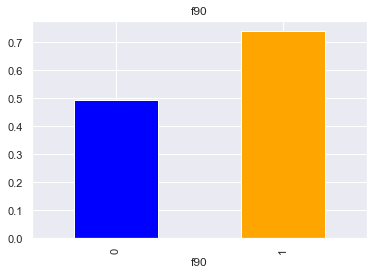

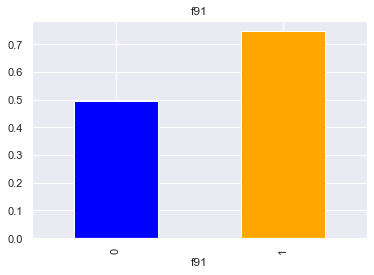

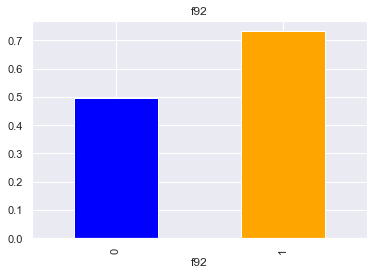

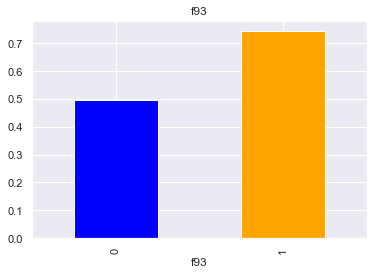

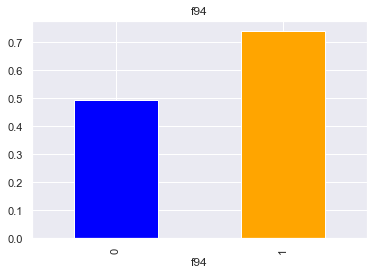

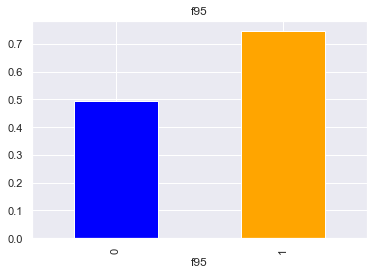

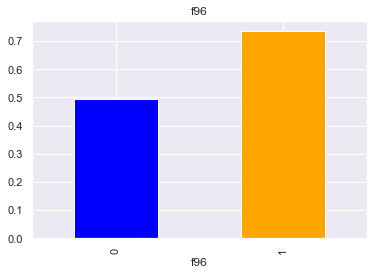

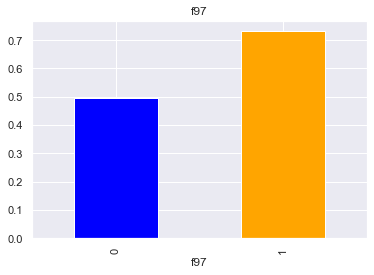

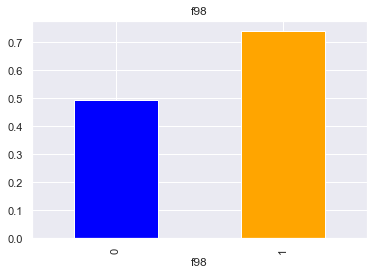

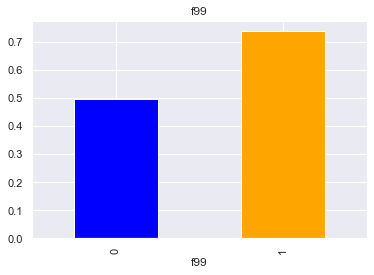

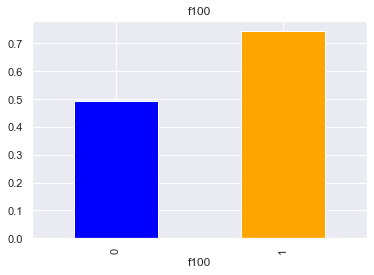

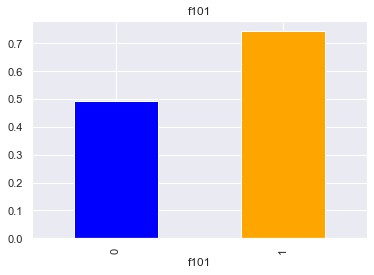

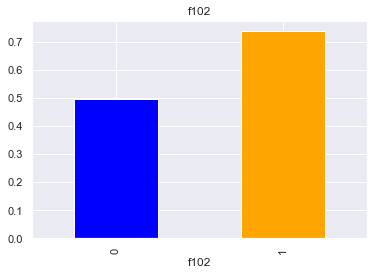

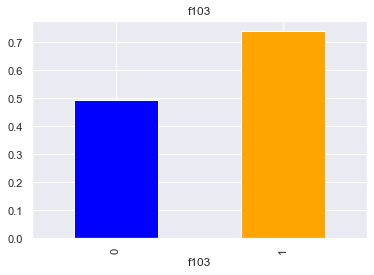

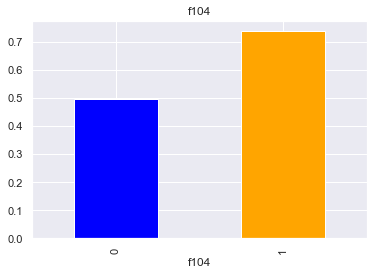

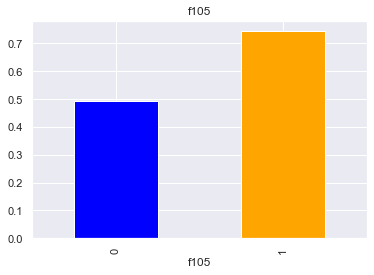

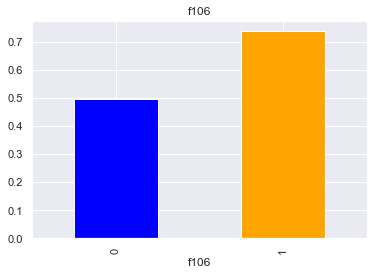

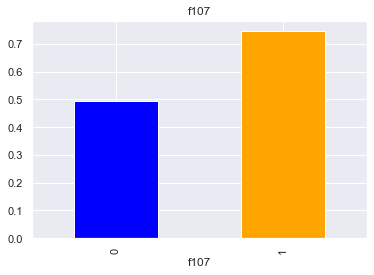

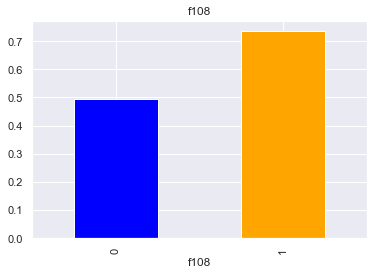

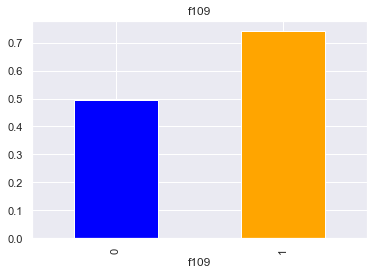

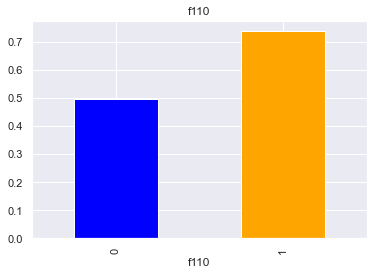

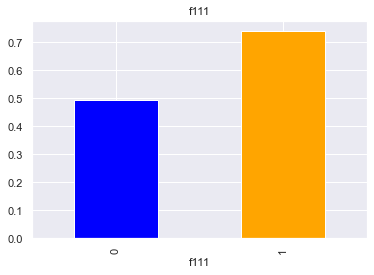

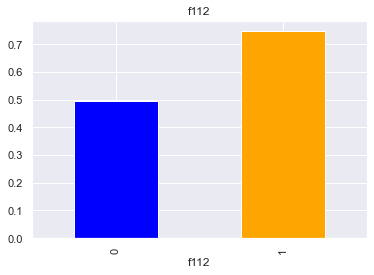

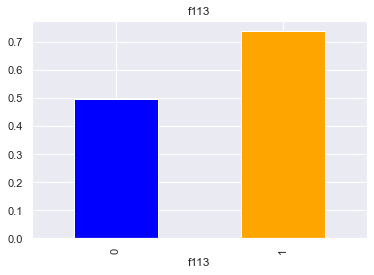

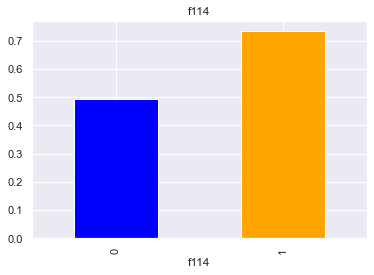

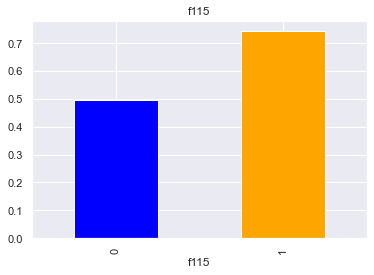

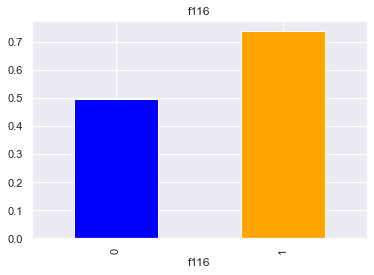

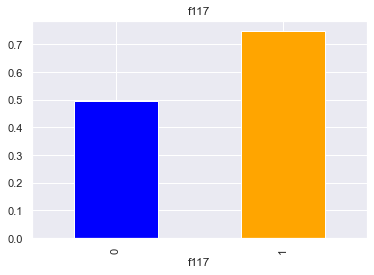

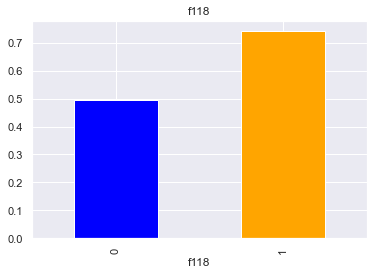

In [11]:
for feature in features_with_na:
    data = train.copy()

    # let's create a variable that indicates 1 if the observation was missing
    # or 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    # Now calculate the median claim where the information is missing or not
    data.groupby(feature)['claim'].mean().plot.bar(color=['blue', 'orange'])
    plt.title(feature)
    plt.show()
    

In each feature, more than 70% of the observations with missing value brought to
a claim, while only 50% with records with no missing.
To me it seems strange that the situation is identical for every variable.

In any case, we need to replace these nan values with something meaningful.
We will think about that in the Feature Engineering section.

The last we can see with null values in this section is that we can see if the proportion of
a claim changes according to null value counts in each observation.

In [12]:
# create a new feature that creates a new columns that counts the na per record:
train['na_count'] = train.transpose().isnull().sum()

<AxesSubplot:xlabel='na_count'>

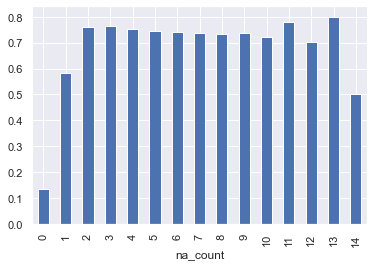

In [13]:
train.groupby('na_count')['claim'].mean().plot.bar()

We can se that slightly more than 10% of records with no NAs brought to a claim,
against big percentages in other categories of missings.

## 2 - All the numerical variables
Numerical variables are usually of two types:
- Discrete variables
- Continuous variables

### Discrete Features
Let's check if there is any discrete feature. I don't think we will find any of these,
since every predictor is a float.

In [14]:
discrete_features = [feature for feature in train.columns if len(train[feature].unique())<25]
print("Discrete variables count: {}".format(len(discrete_features)))

Discrete variables count: 2


Certainly the unique discrete feature is the target column.

In [15]:
discrete_features

['claim', 'na_count']

As we imagined it is `claim` feature.
Let's go to the next step.

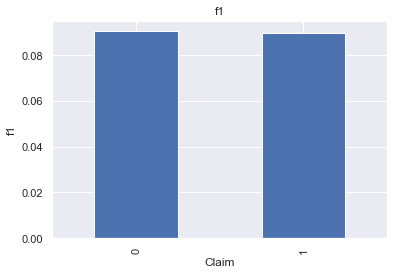

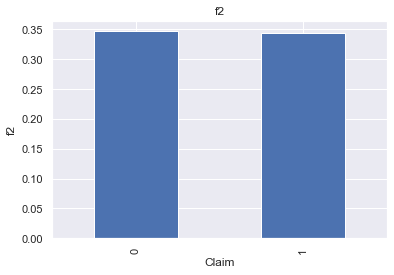

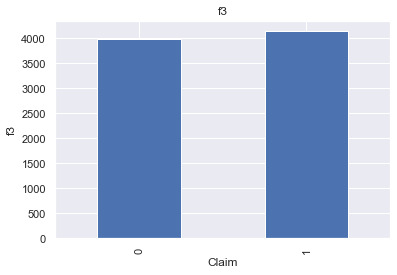

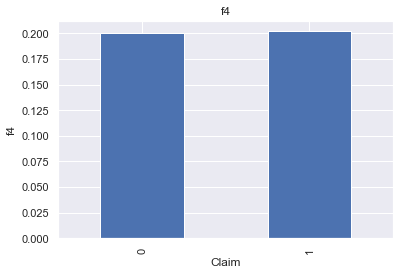

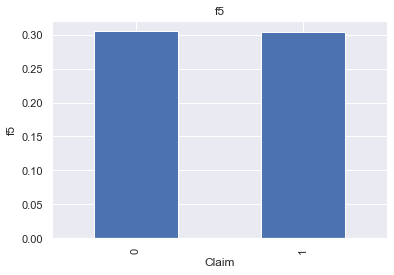

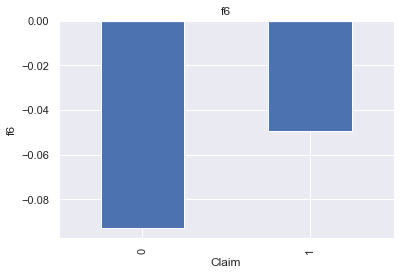

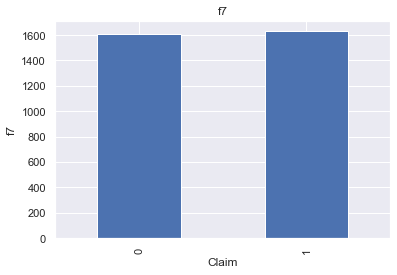

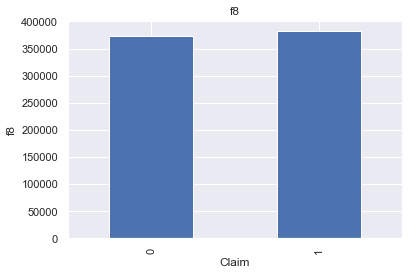

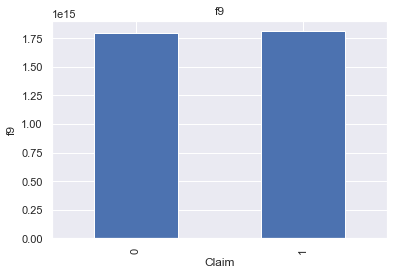

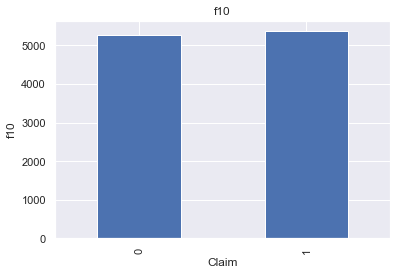

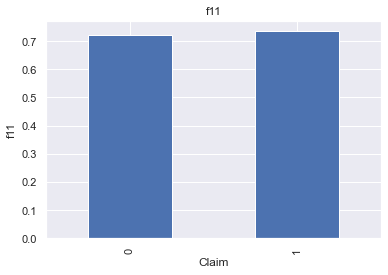

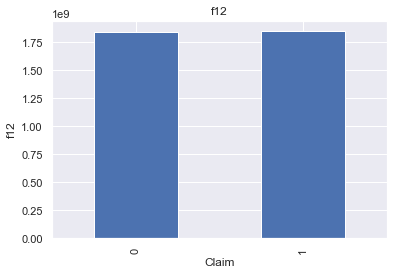

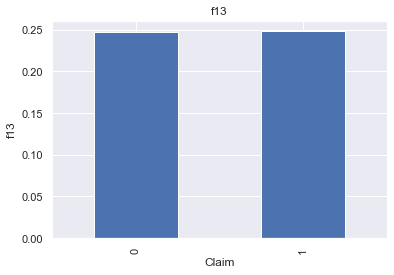

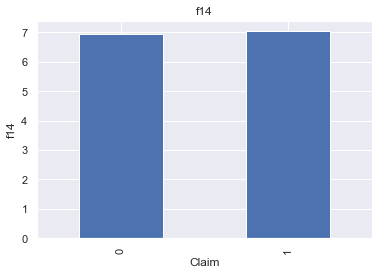

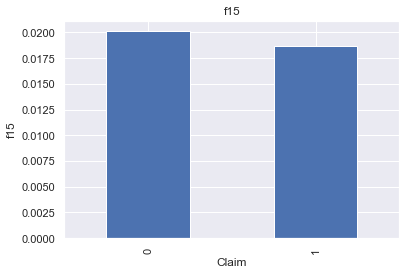

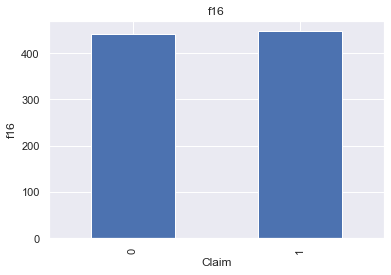

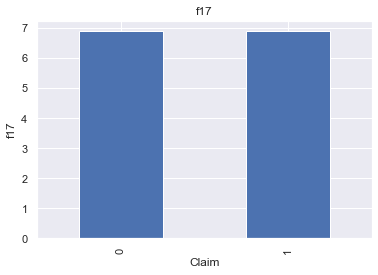

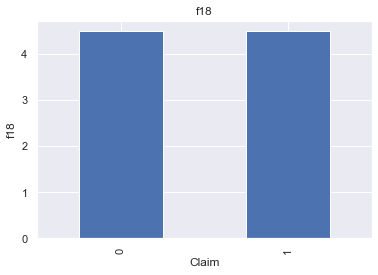

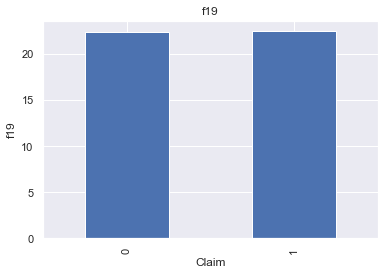

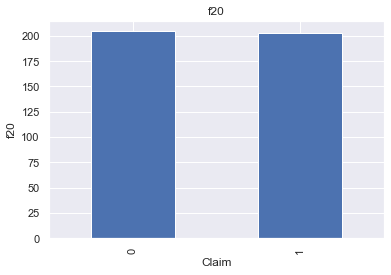

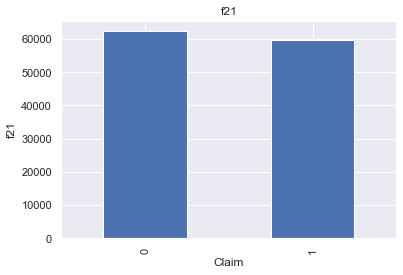

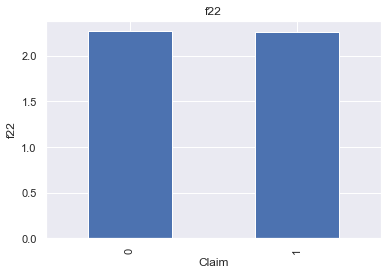

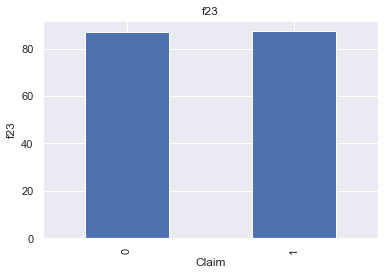

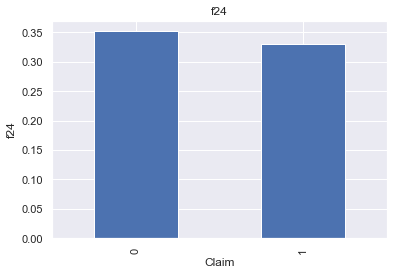

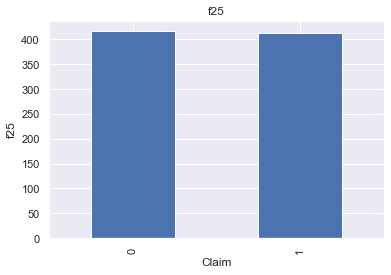

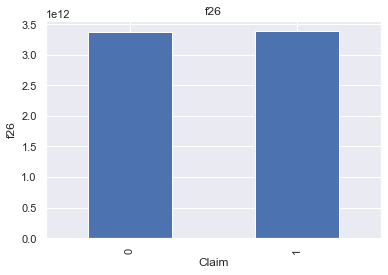

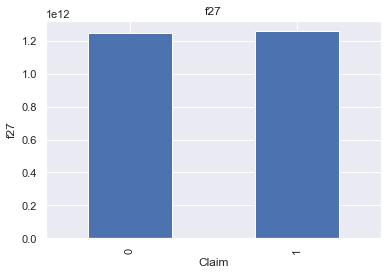

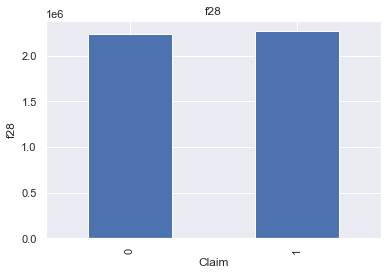

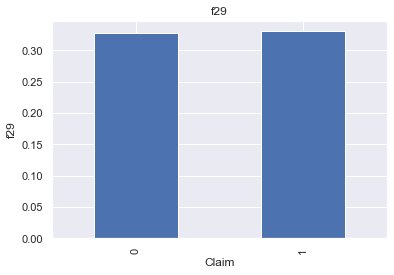

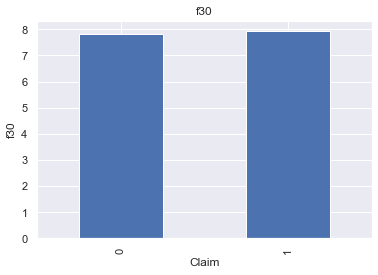

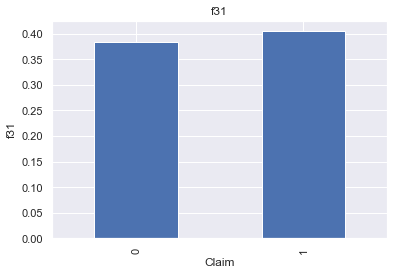

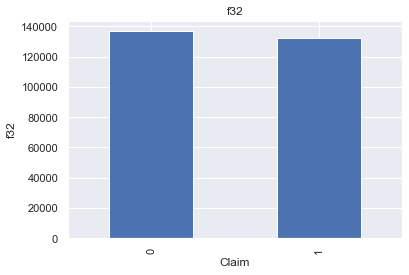

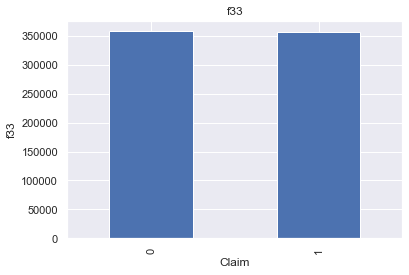

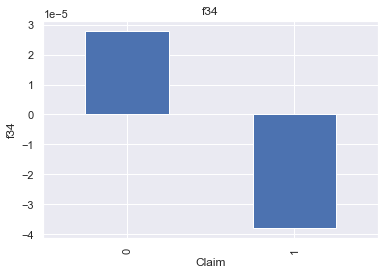

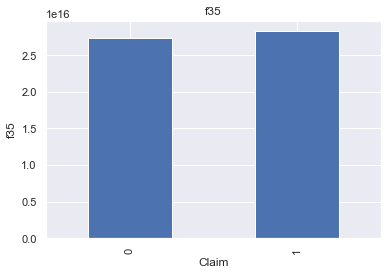

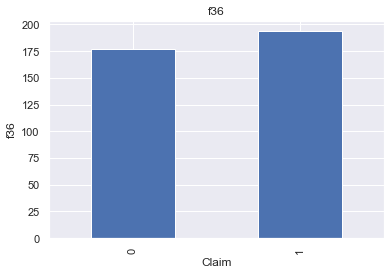

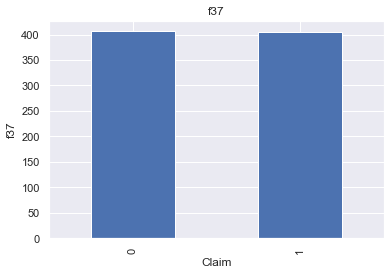

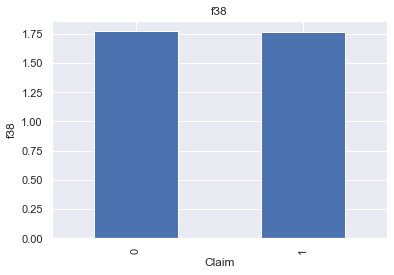

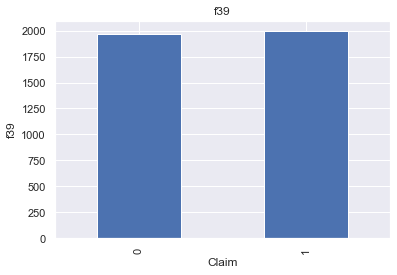

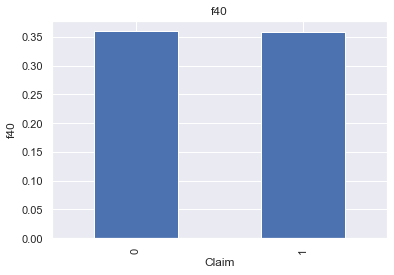

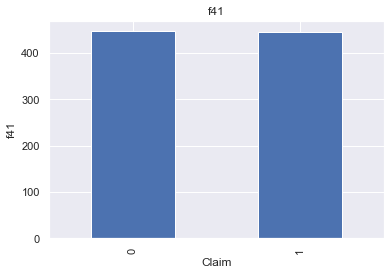

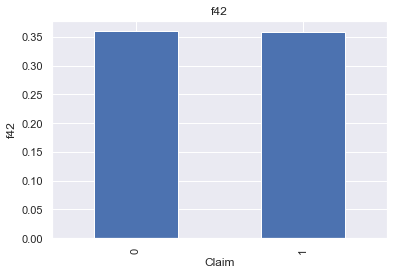

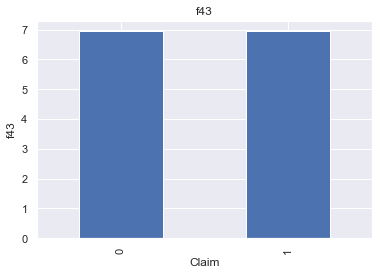

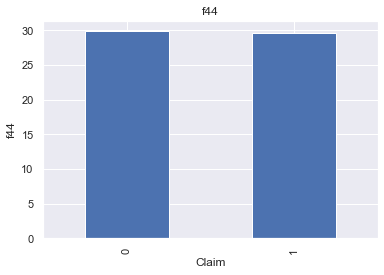

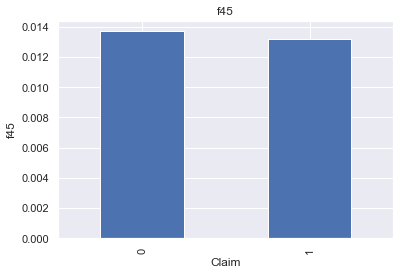

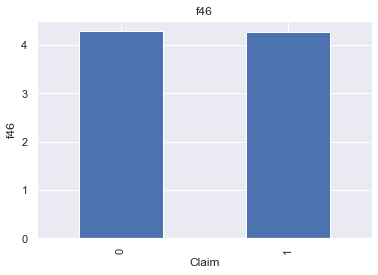

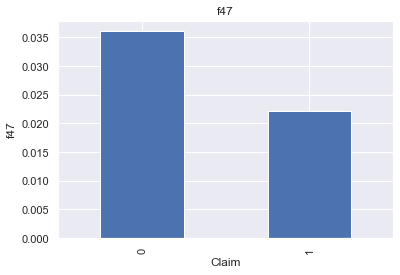

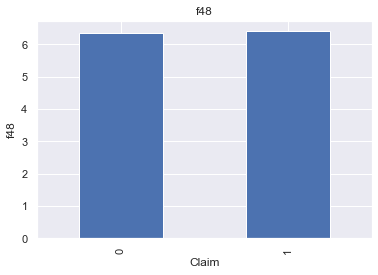

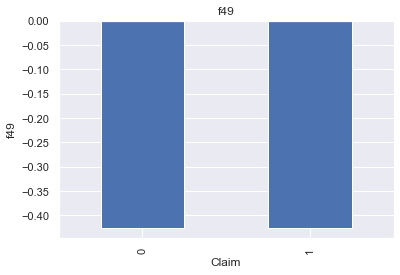

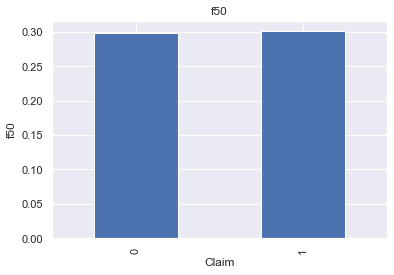

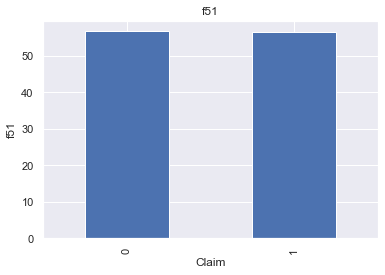

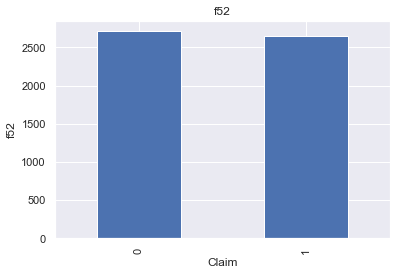

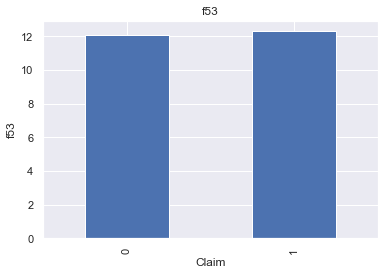

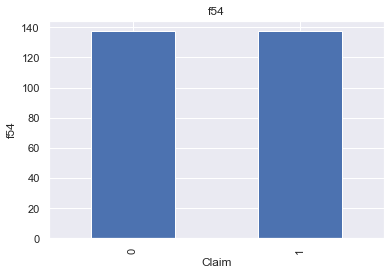

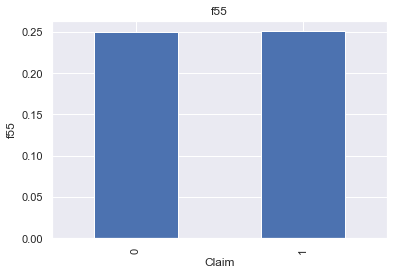

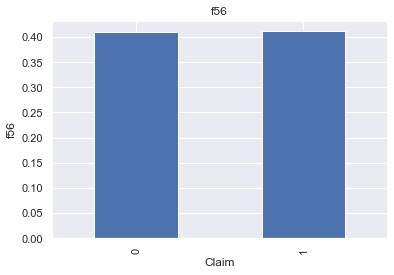

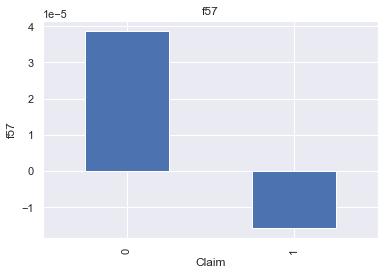

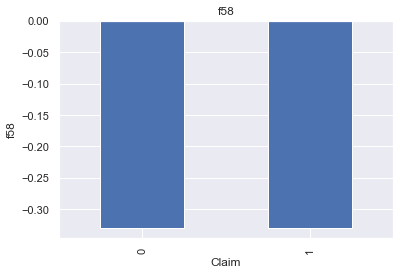

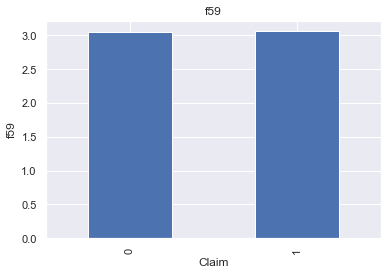

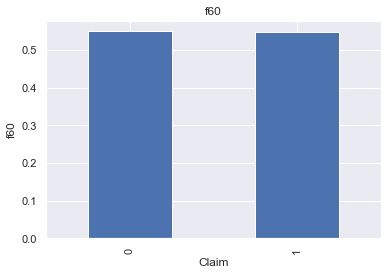

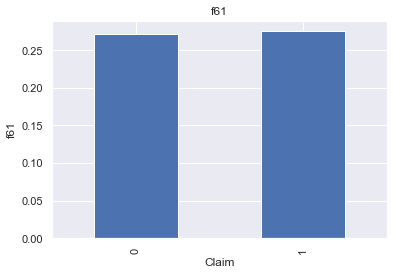

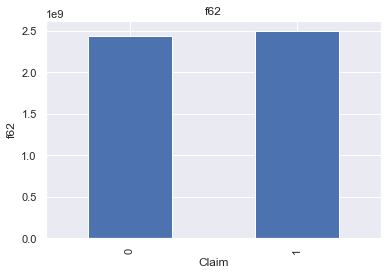

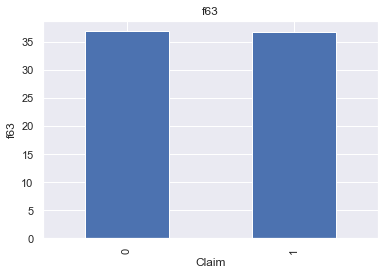

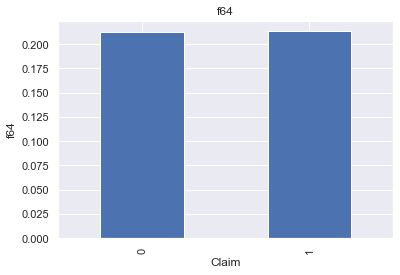

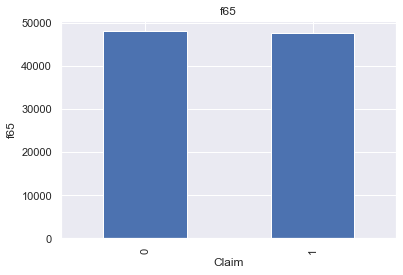

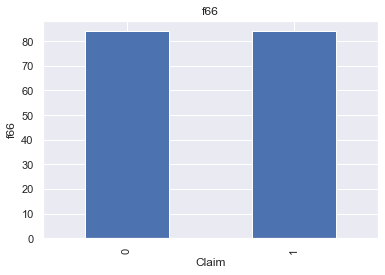

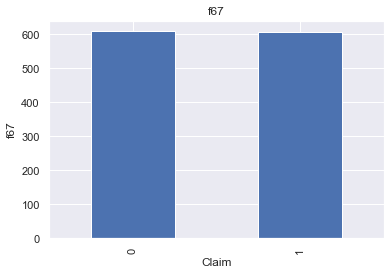

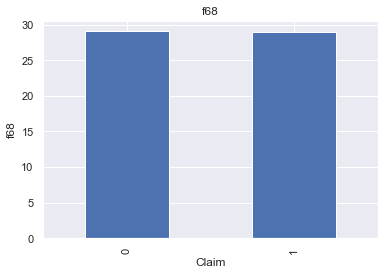

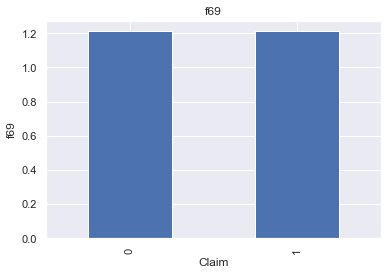

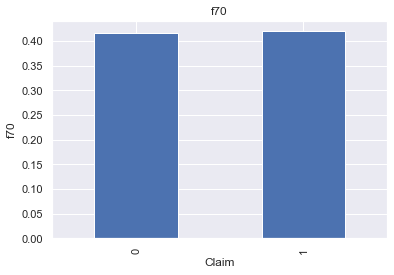

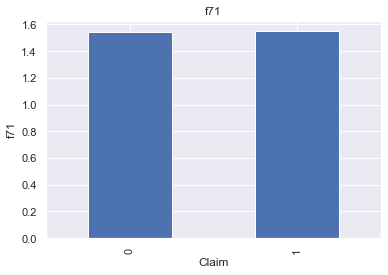

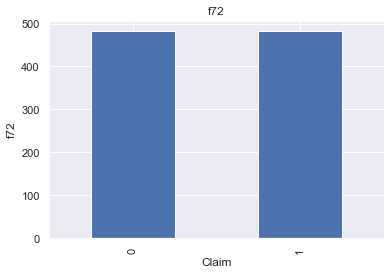

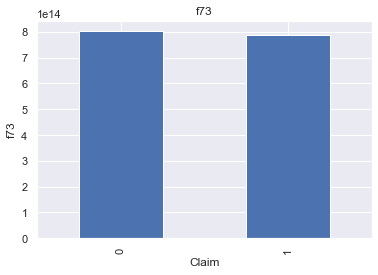

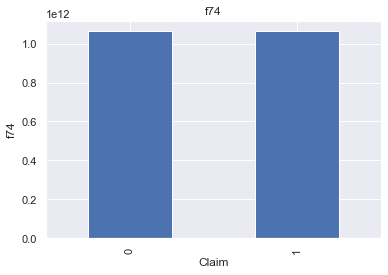

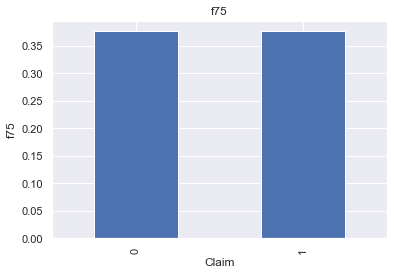

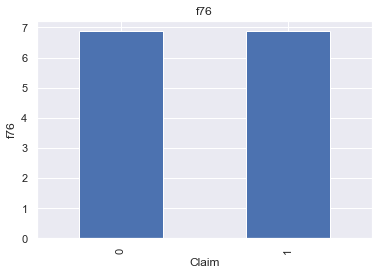

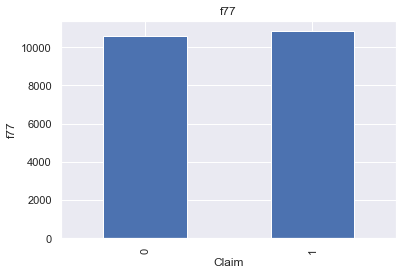

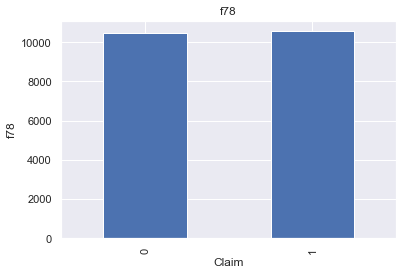

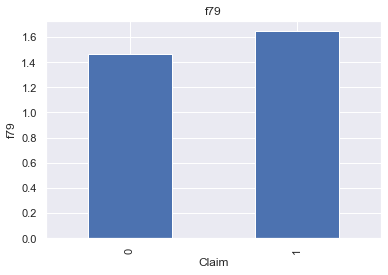

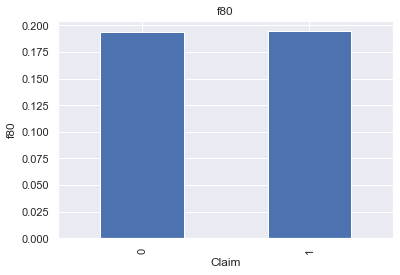

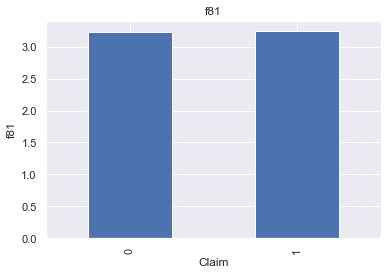

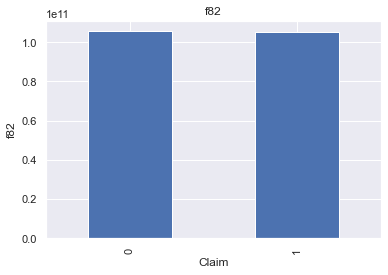

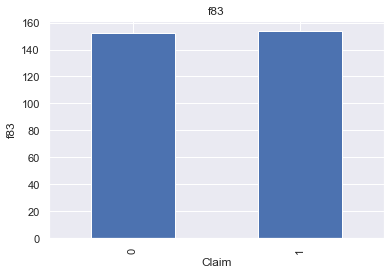

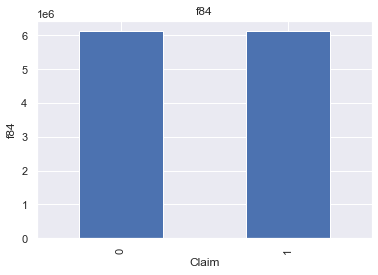

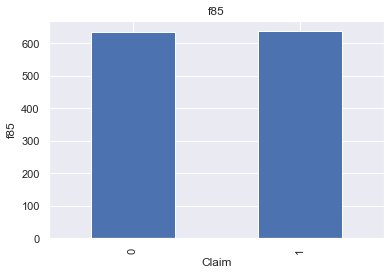

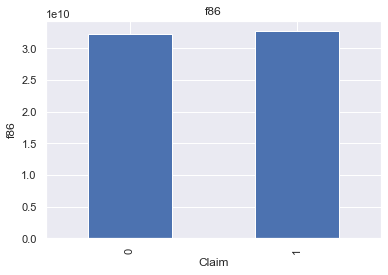

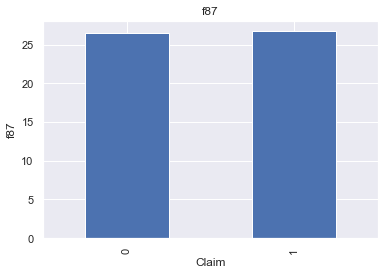

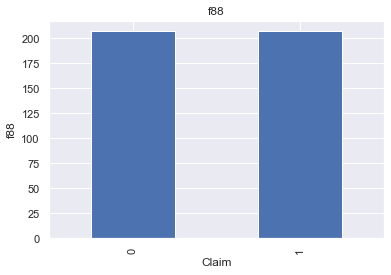

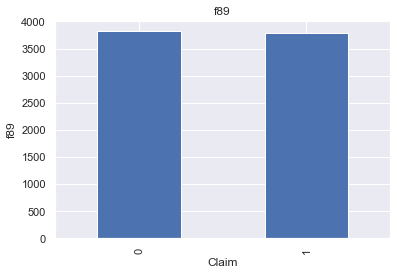

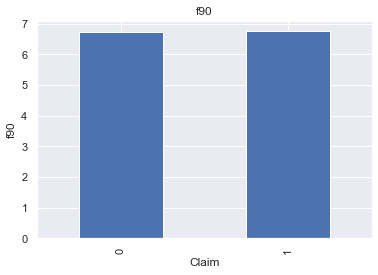

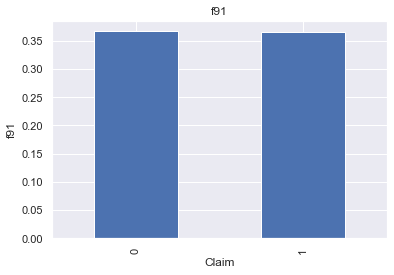

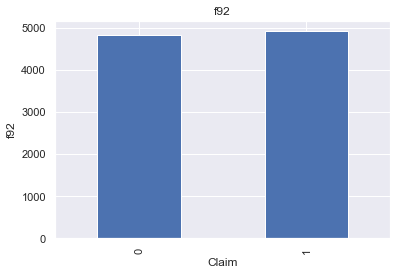

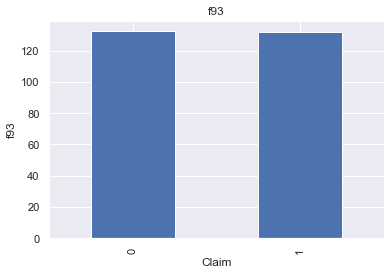

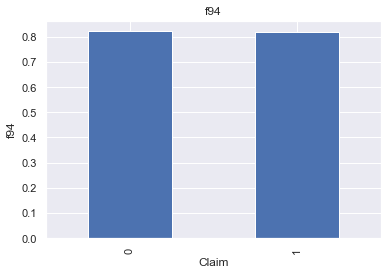

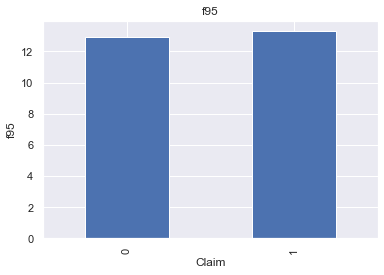

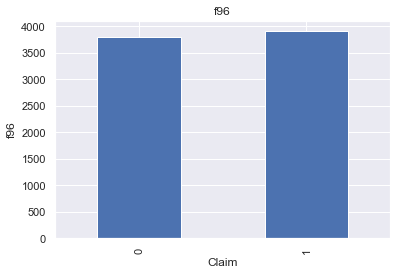

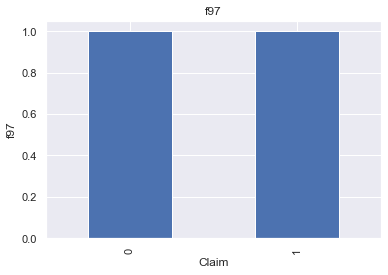

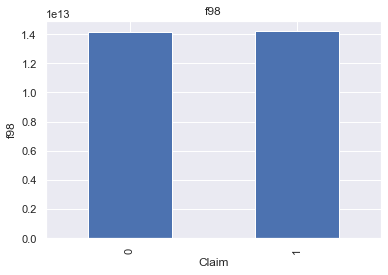

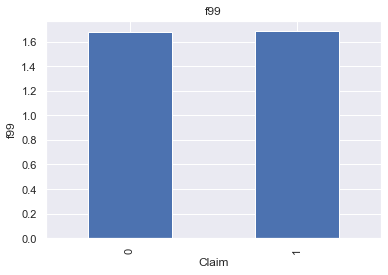

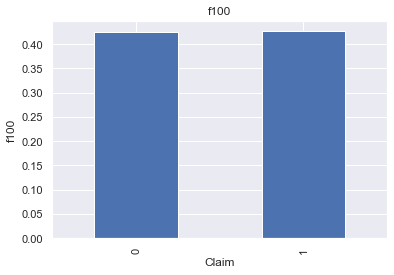

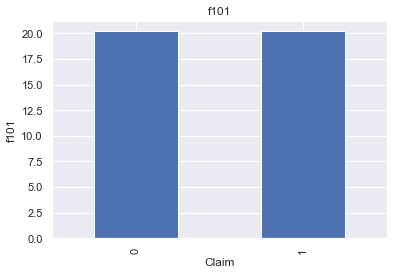

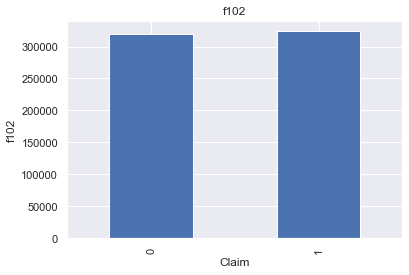

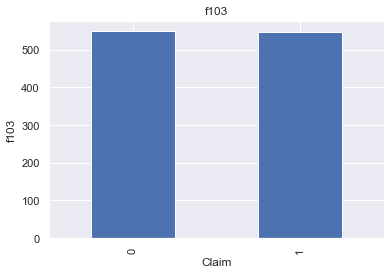

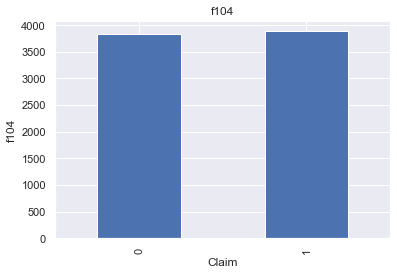

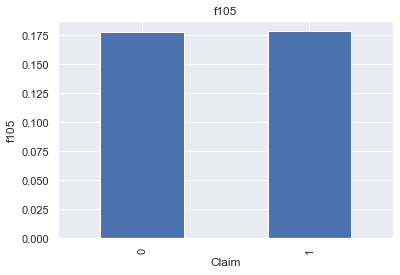

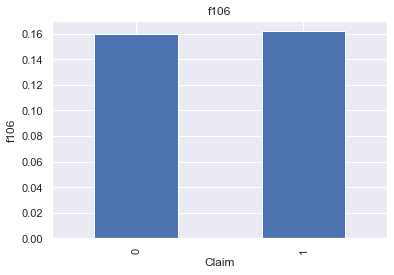

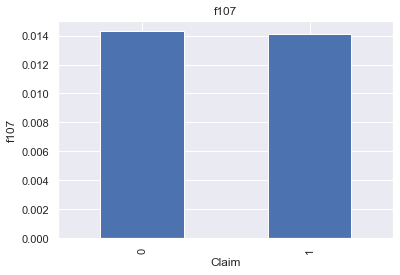

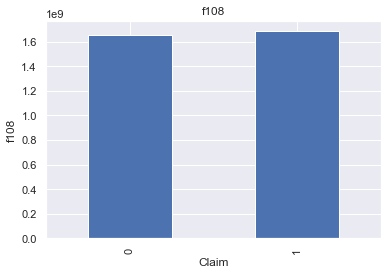

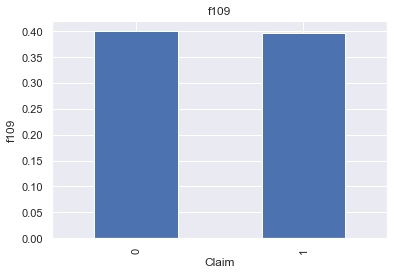

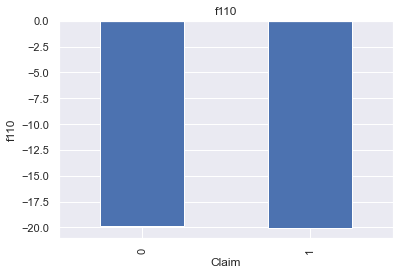

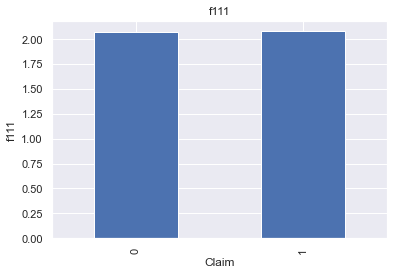

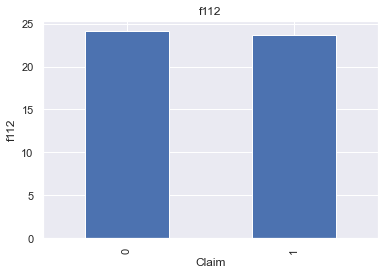

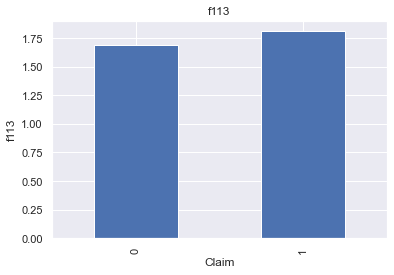

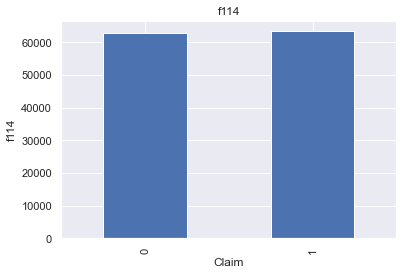

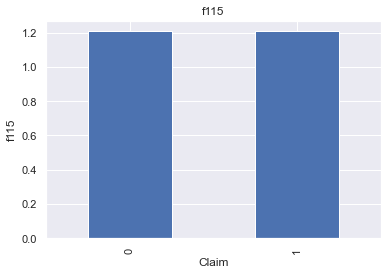

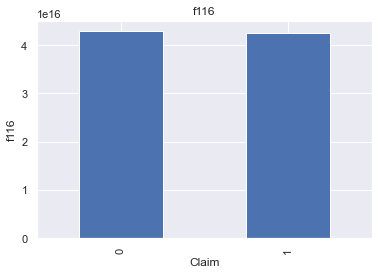

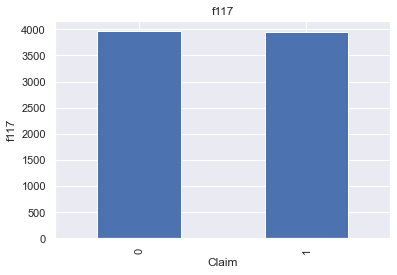

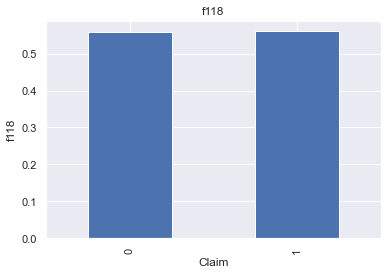

In [16]:
# Let's see the relationship between it and the predictors average.
for feature in features_with_na:   # features with na are the ones we are interested in
    data = train.copy()
    data.groupby('claim')[feature].mean().plot.bar()
    plt.xlabel('Claim')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Continuous features

In [17]:
print('Continuous features: {}'.format(len(features_with_na)))

Continuous features: 118


Let's analyze the continuous values by creating histograms to understand the distribution.

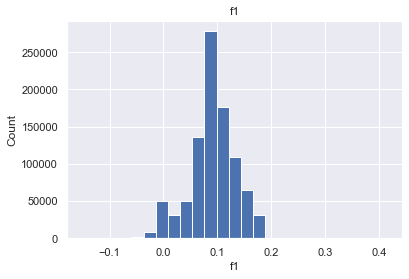

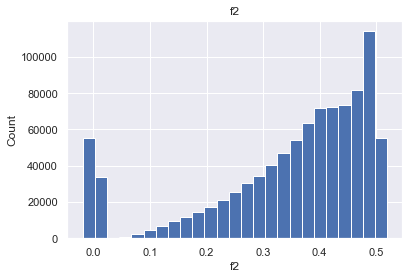

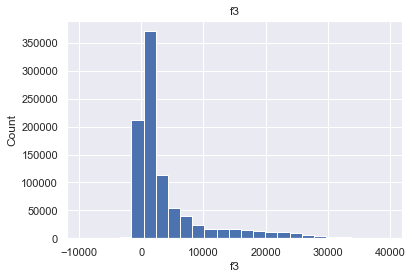

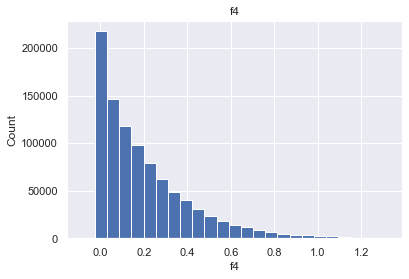

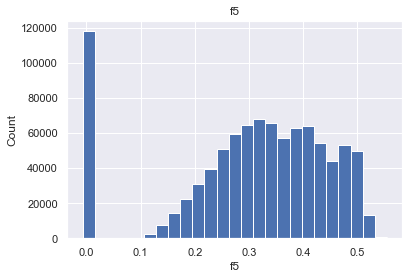

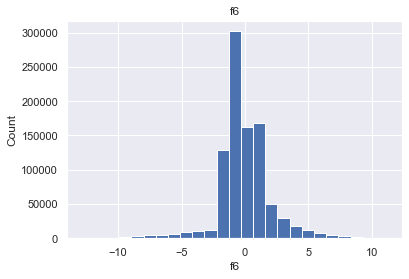

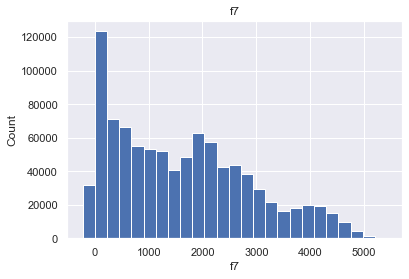

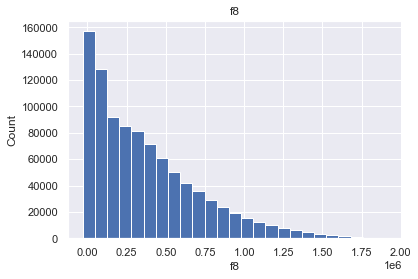

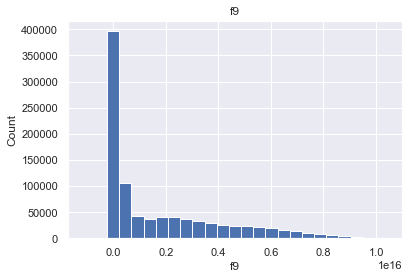

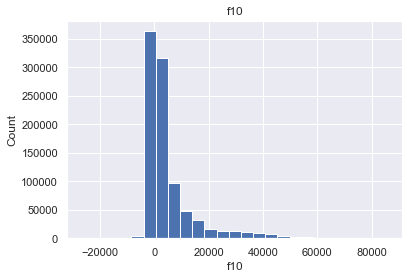

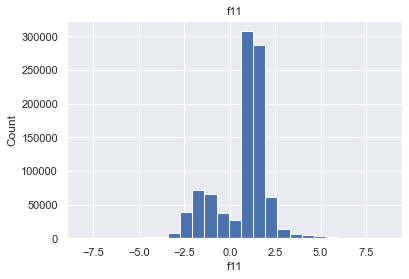

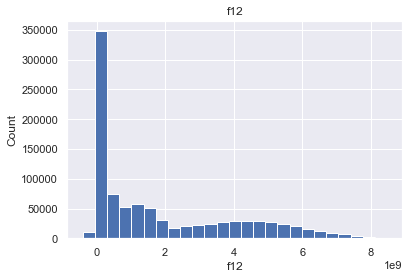

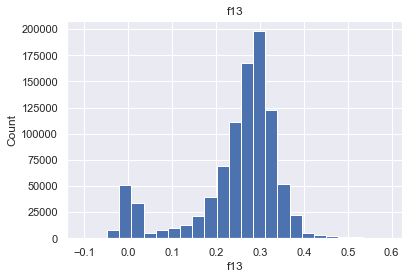

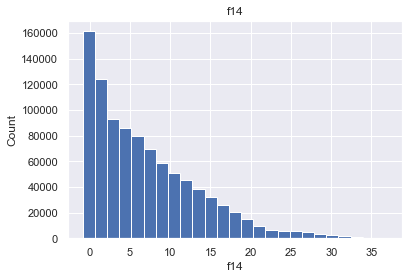

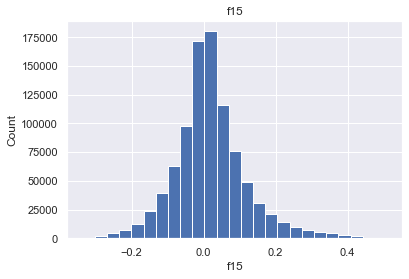

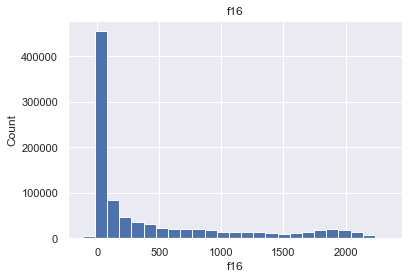

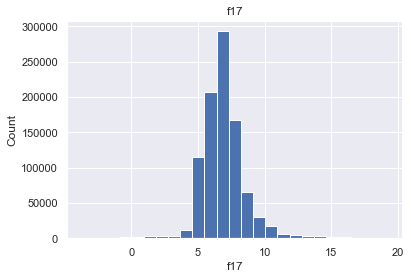

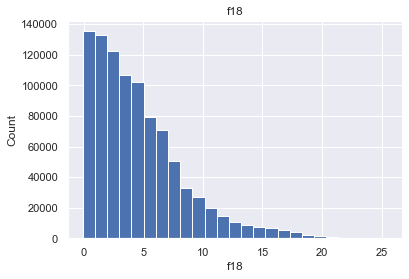

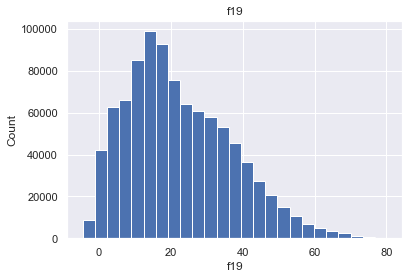

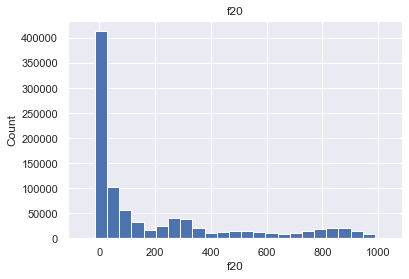

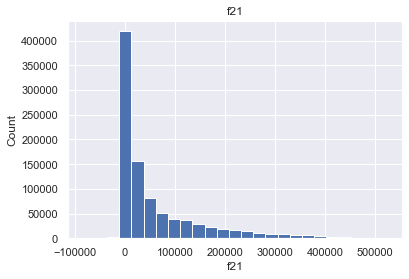

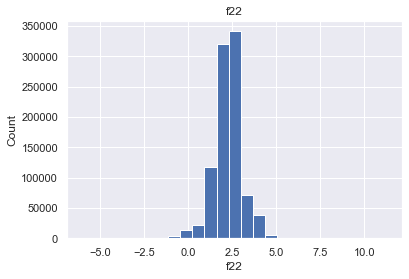

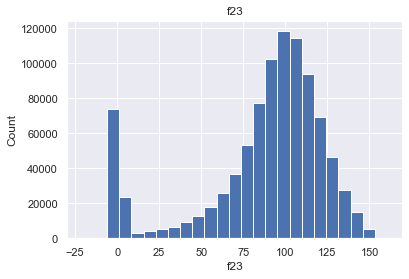

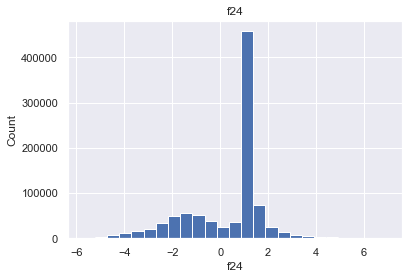

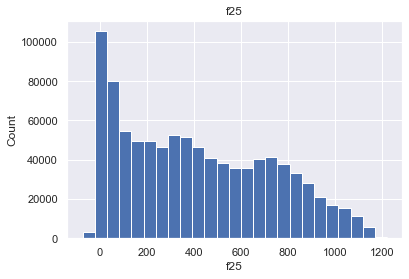

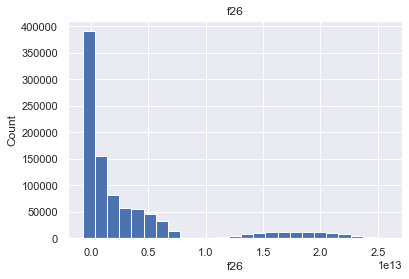

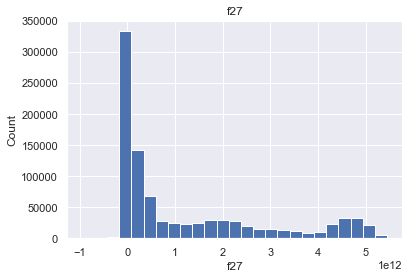

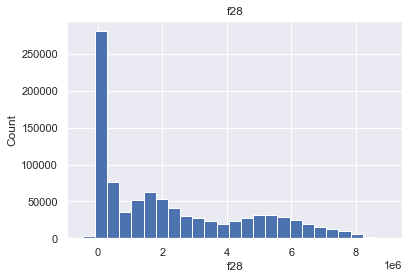

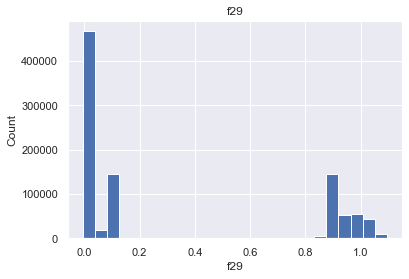

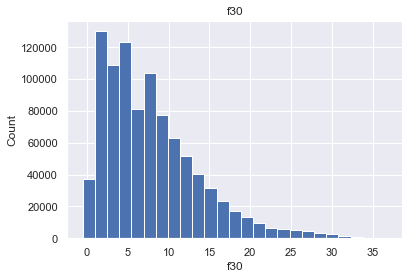

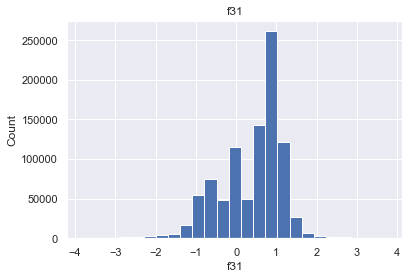

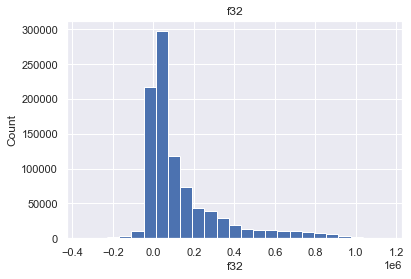

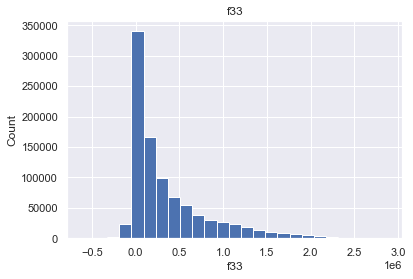

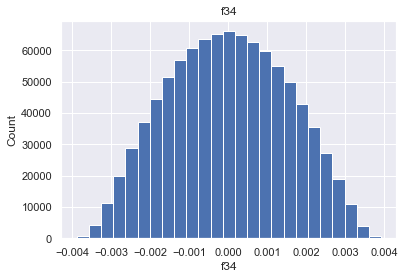

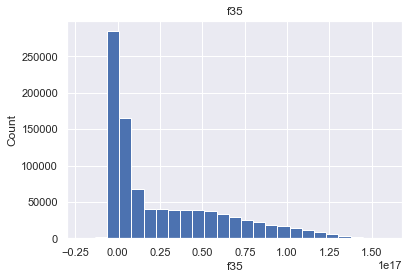

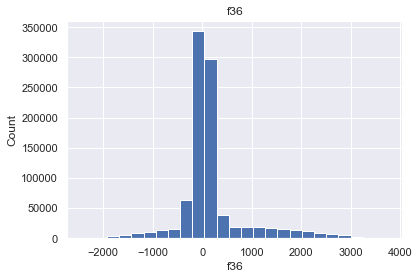

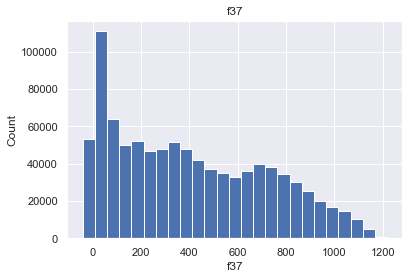

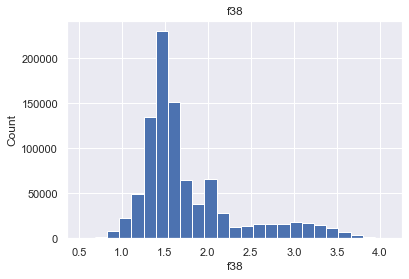

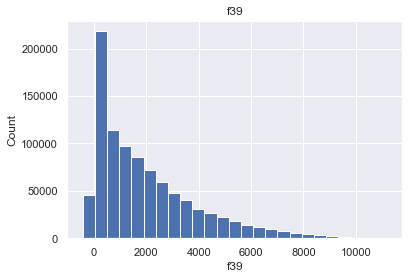

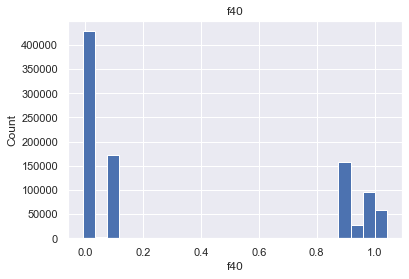

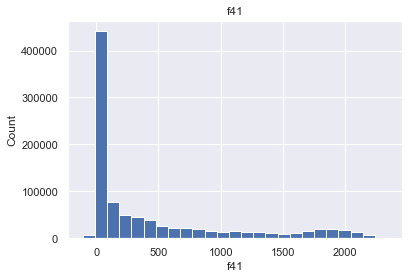

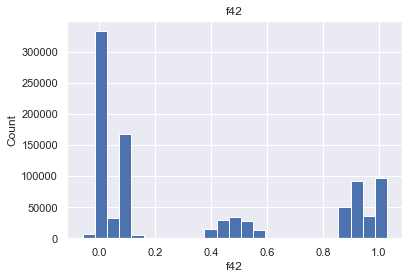

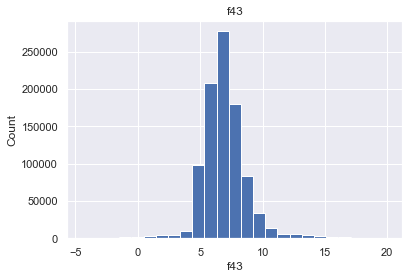

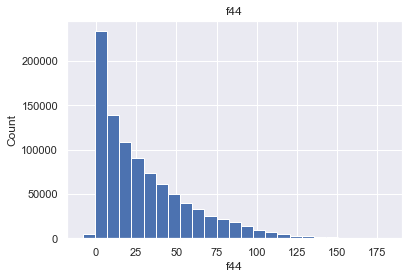

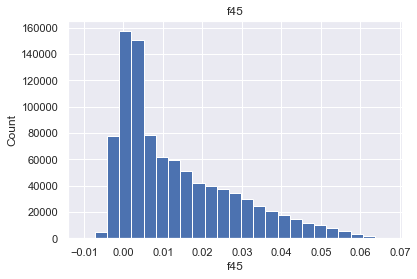

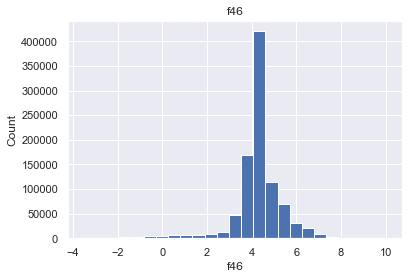

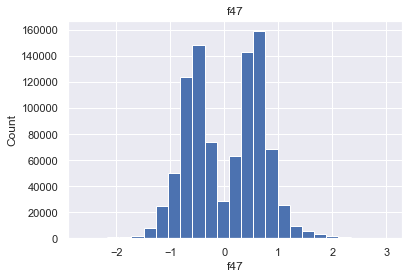

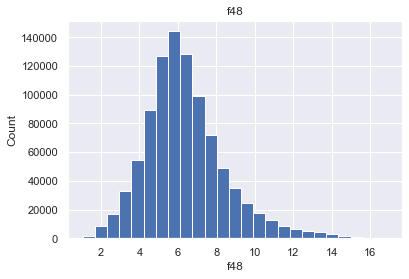

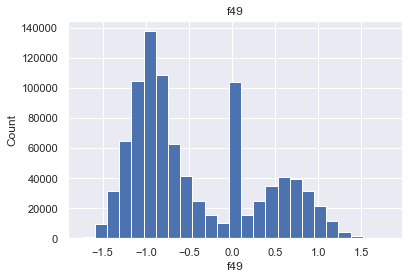

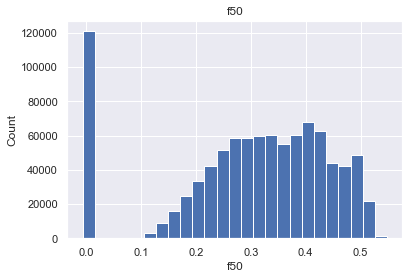

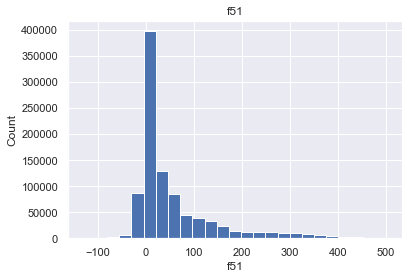

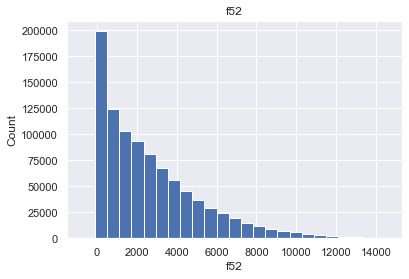

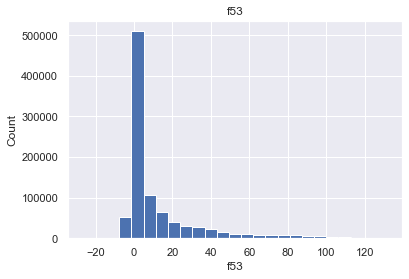

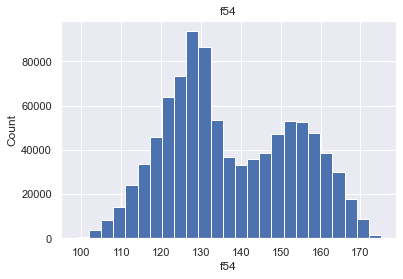

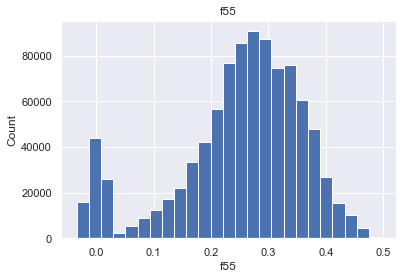

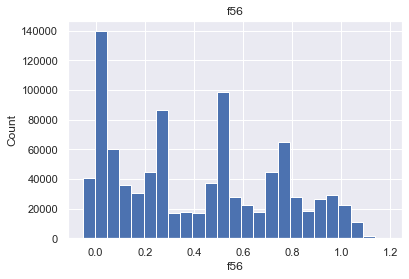

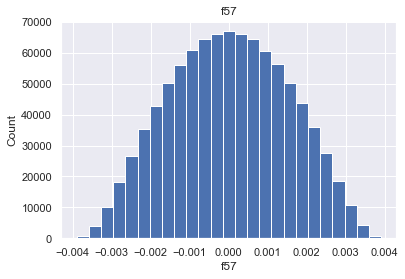

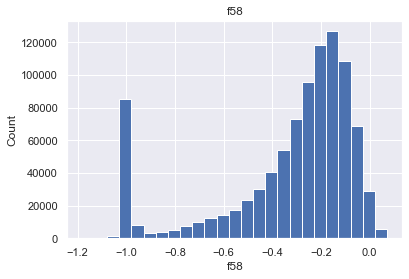

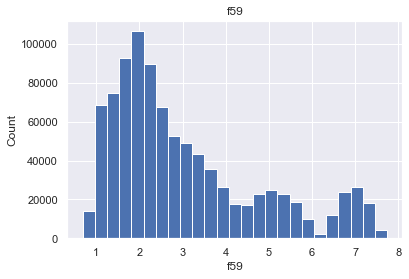

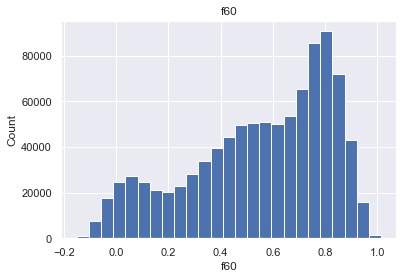

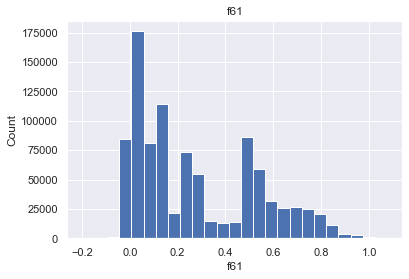

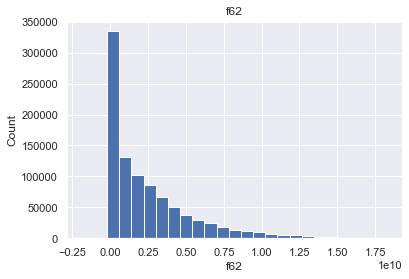

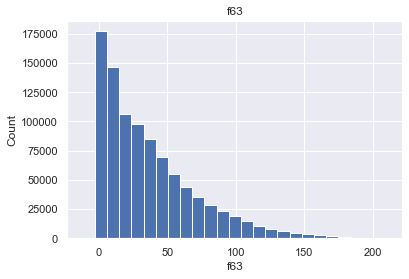

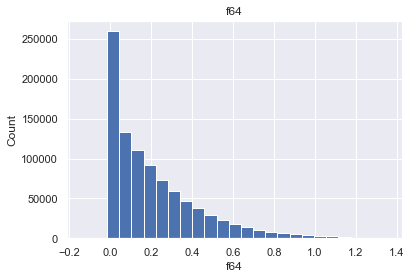

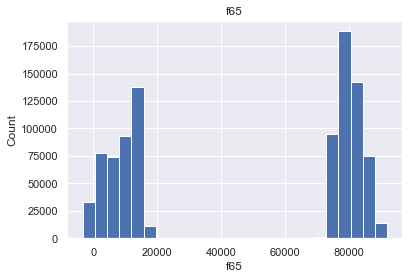

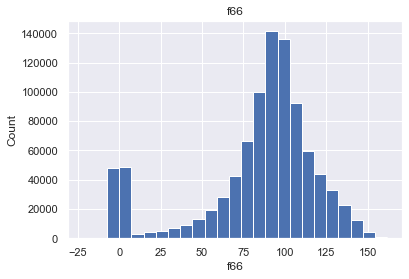

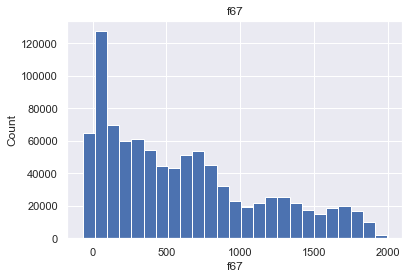

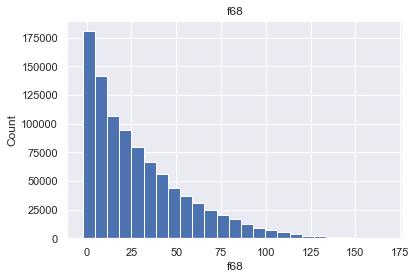

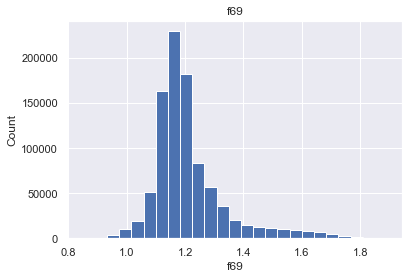

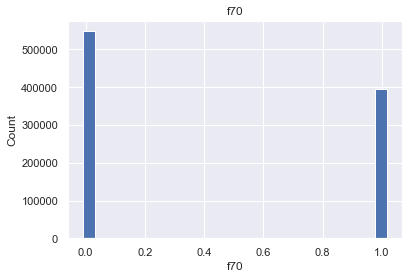

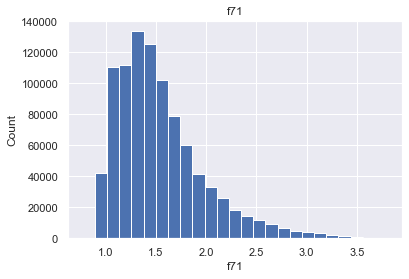

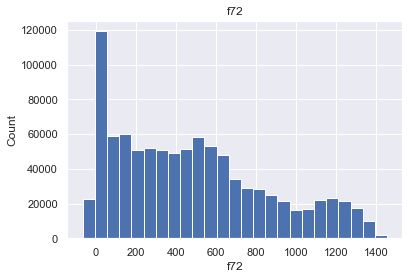

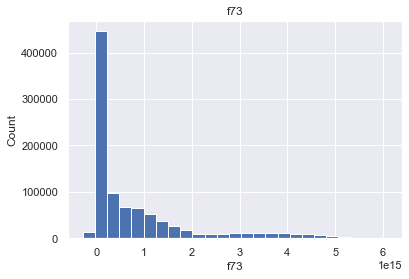

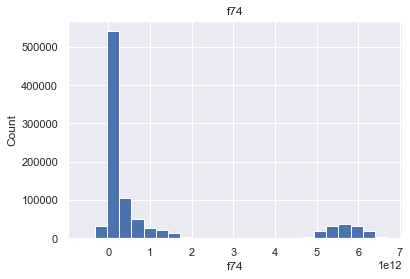

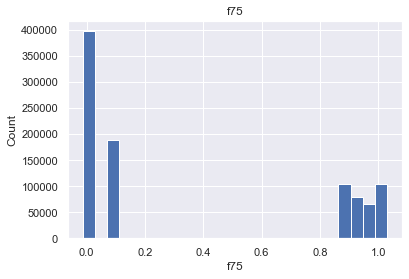

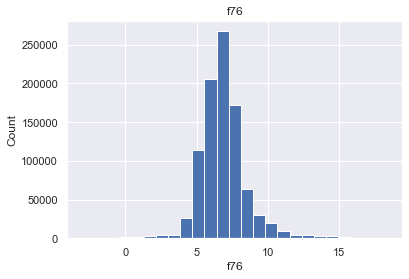

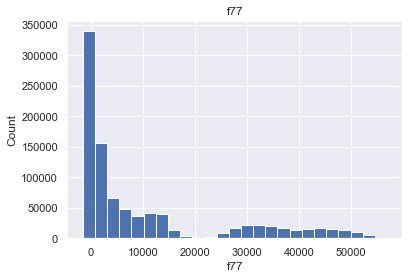

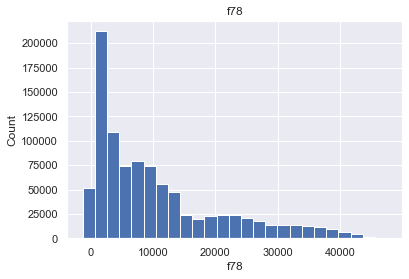

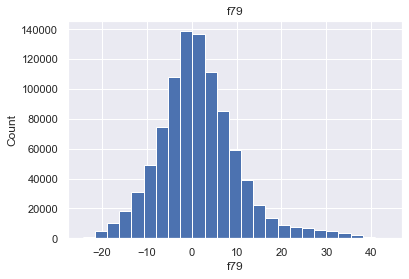

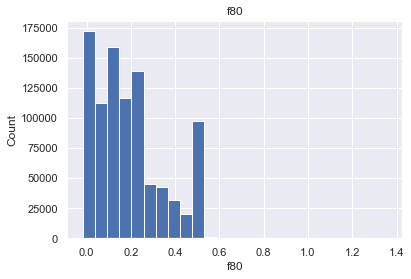

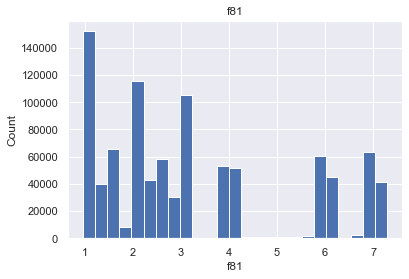

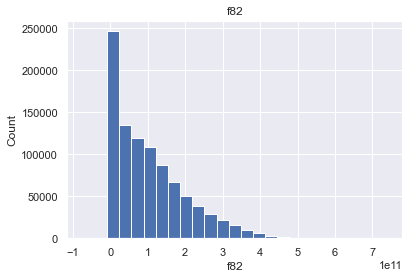

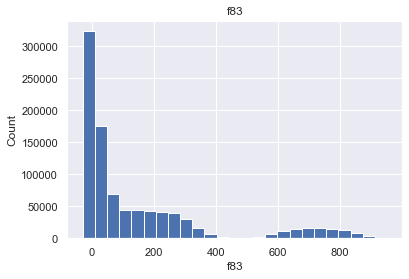

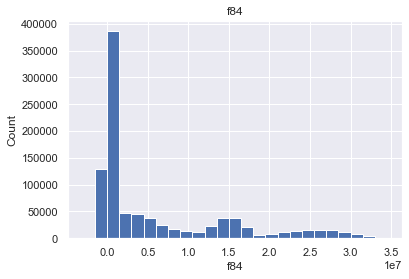

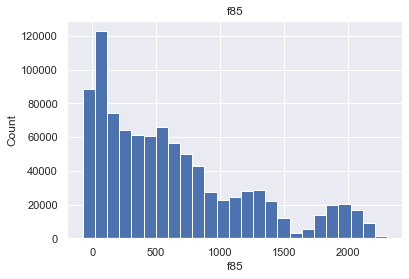

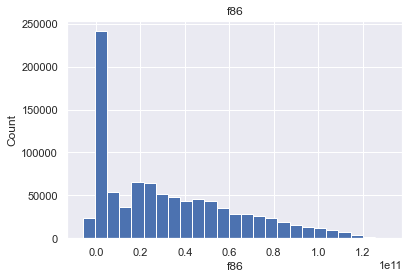

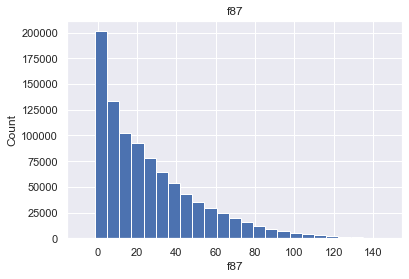

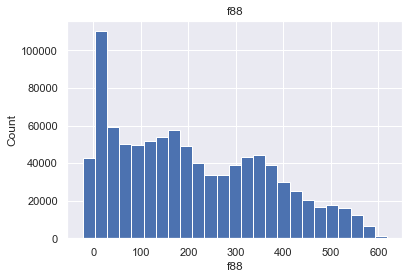

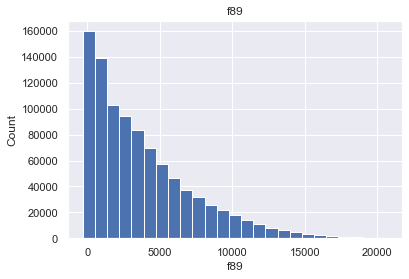

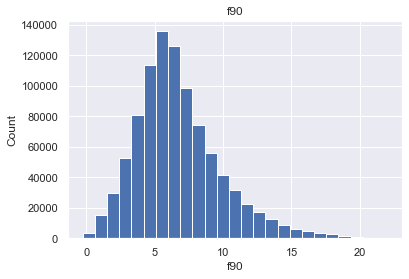

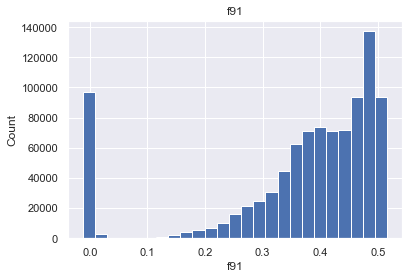

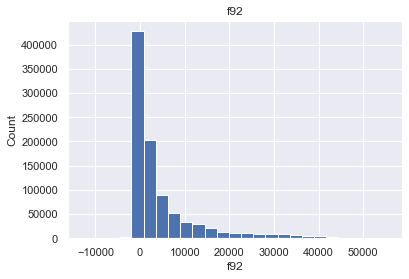

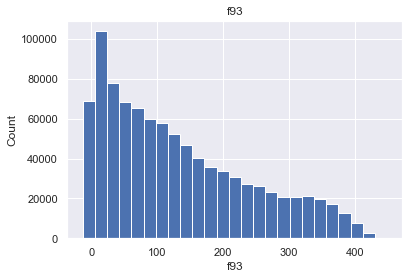

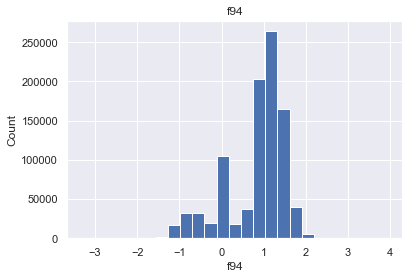

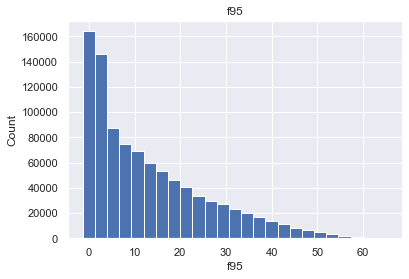

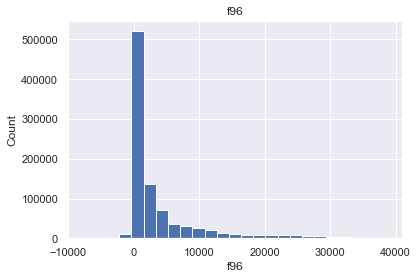

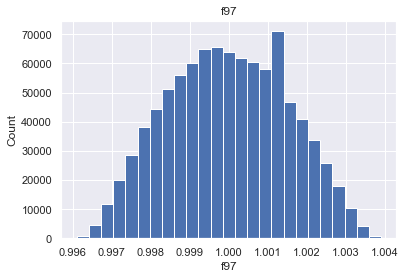

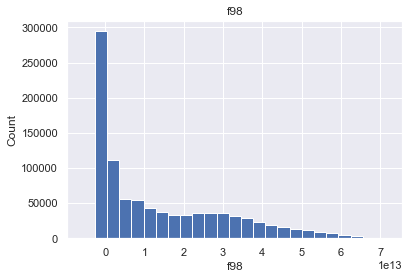

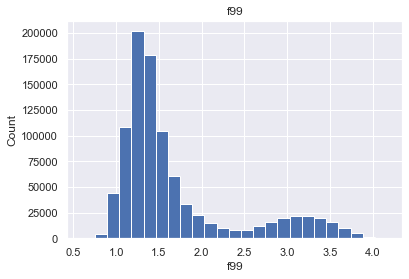

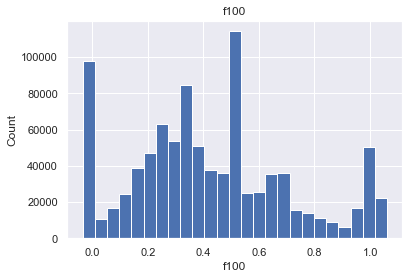

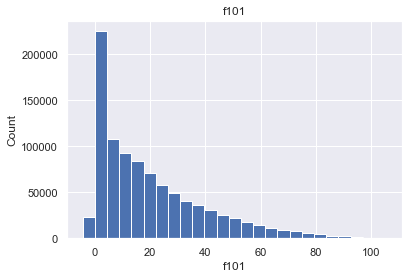

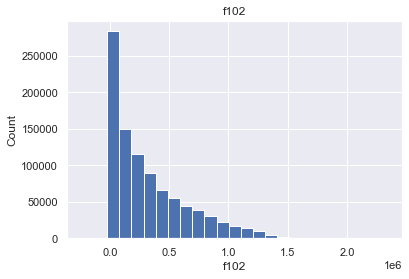

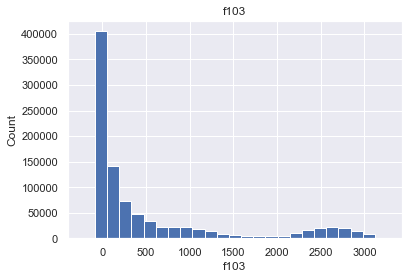

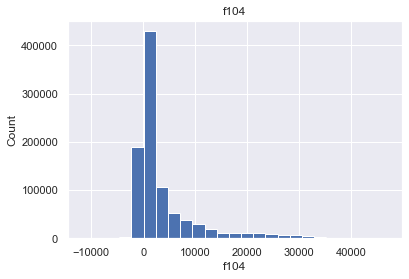

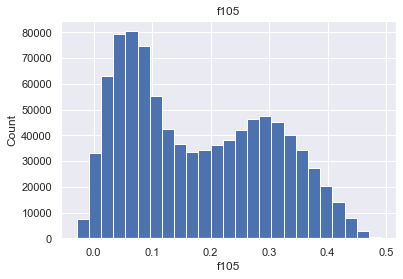

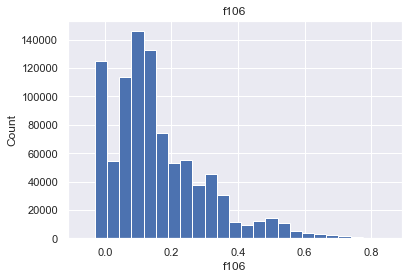

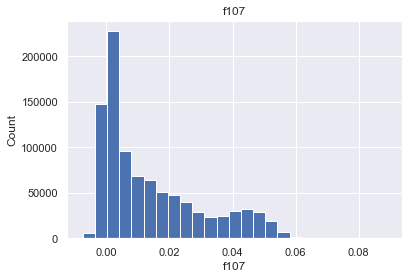

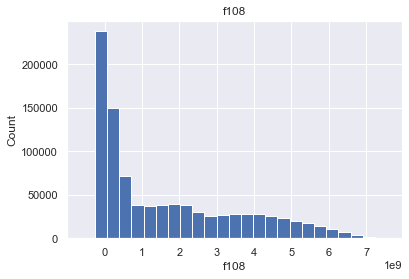

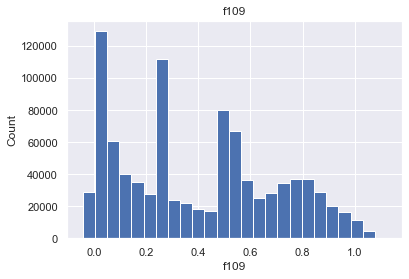

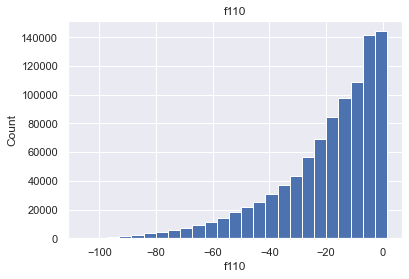

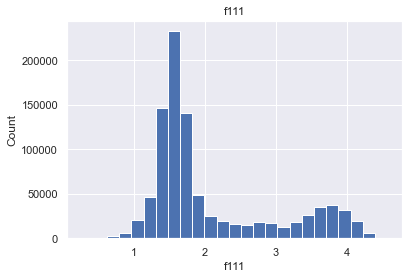

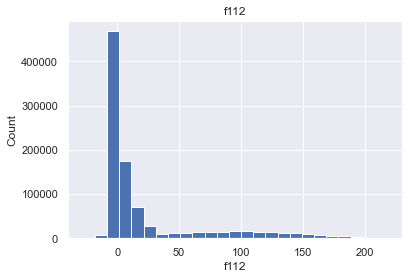

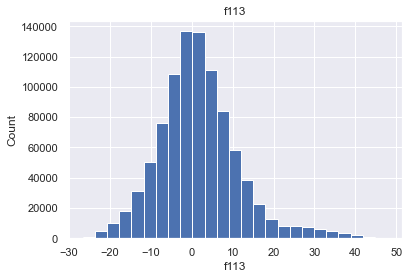

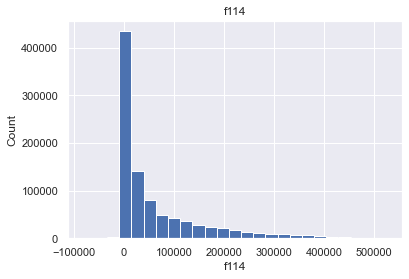

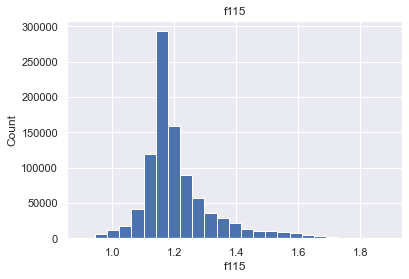

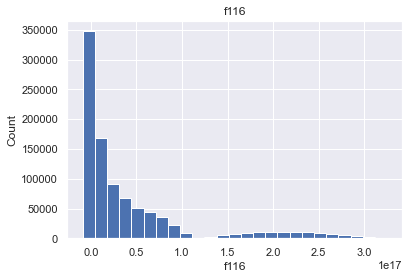

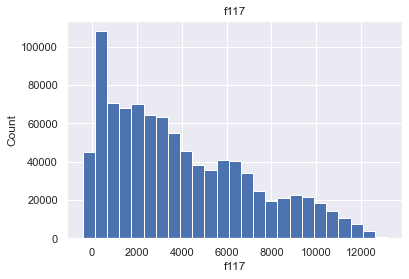

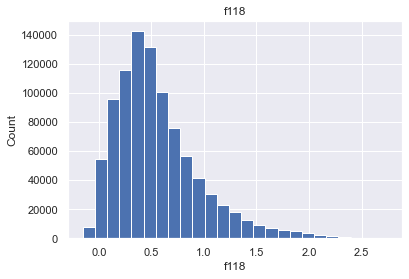

In [18]:
for feature in features_with_na:
    data = train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Most of the regressors don't follow a normal distribution.
We have to standardize them in order to improve model performance.
I'll try with a logarithm transformation.

## Correlations
Now we can move on and check the correlation between numerical variables.

In [19]:
# correlation matrix
cor = train.corr()

Performing a correlation heatmap on the entire dataset is very difficult, so I'll
show only about 30 columns at a time.

<AxesSubplot:>

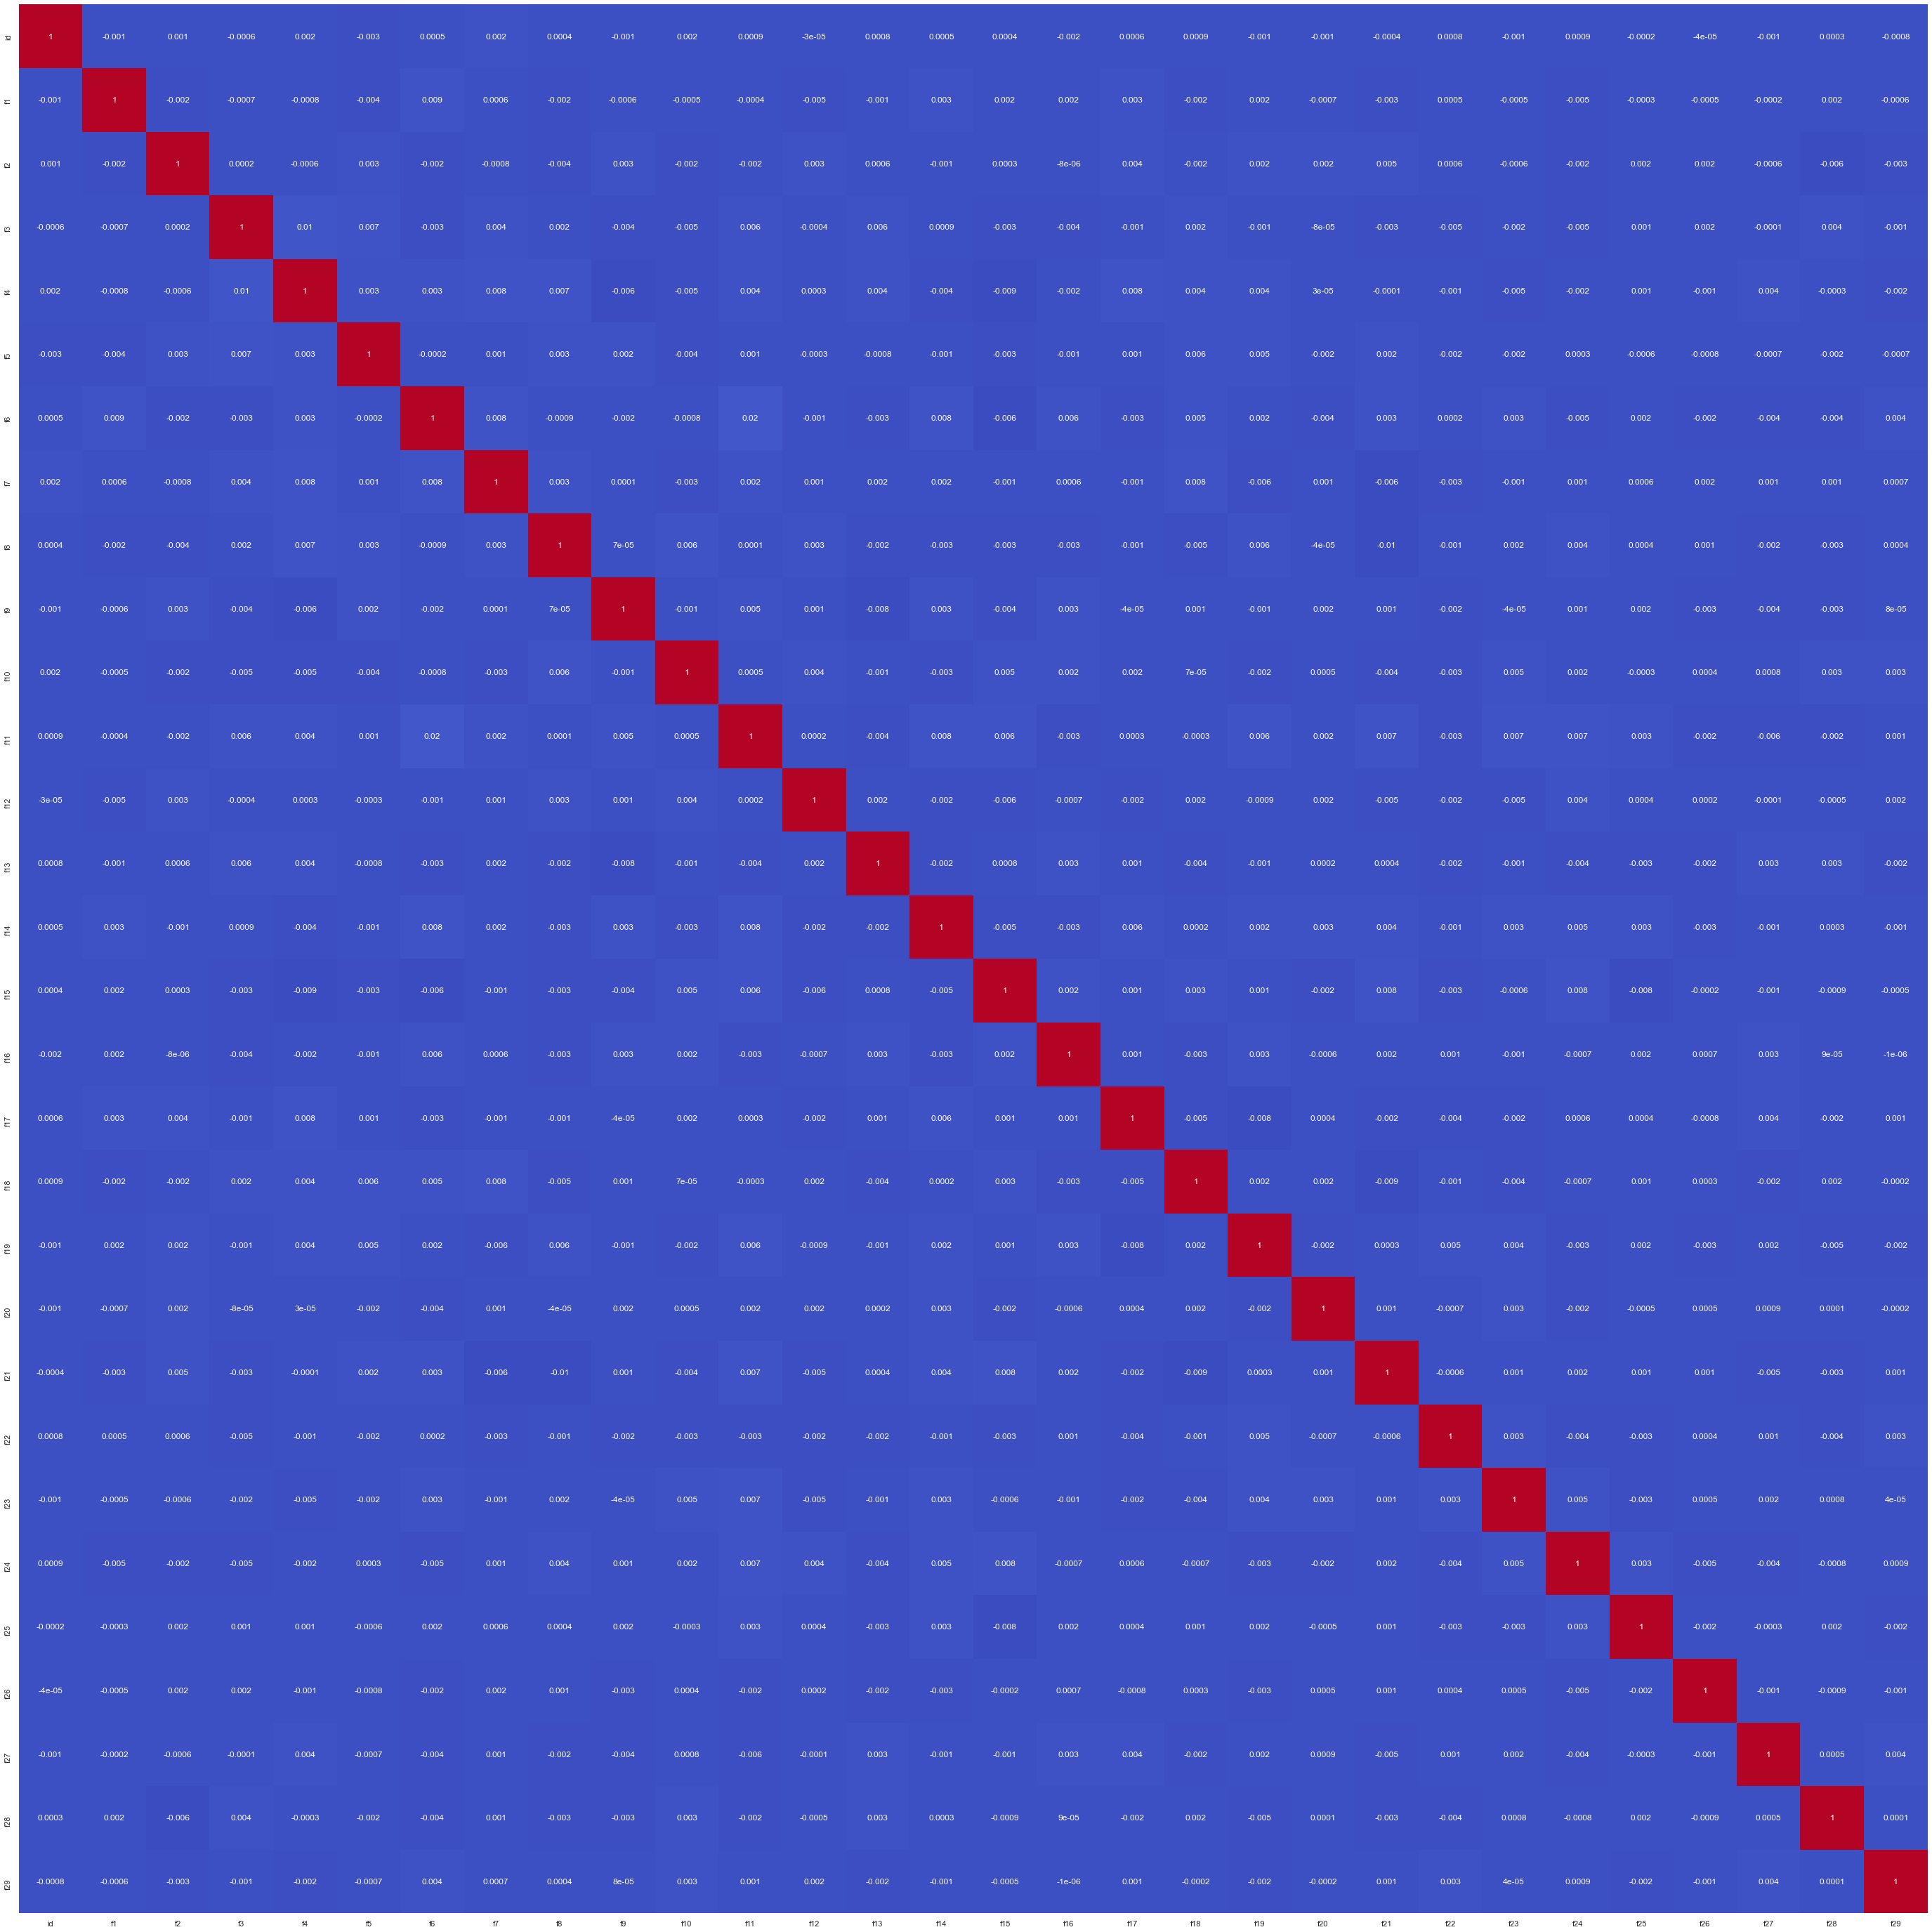

In [20]:
plt.subplots(figsize=(50,50))
sns.heatmap(cor.iloc[0:30, 0:30], annot=True, square=True,fmt='.1g', cmap='coolwarm', cbar=False)

<AxesSubplot:>

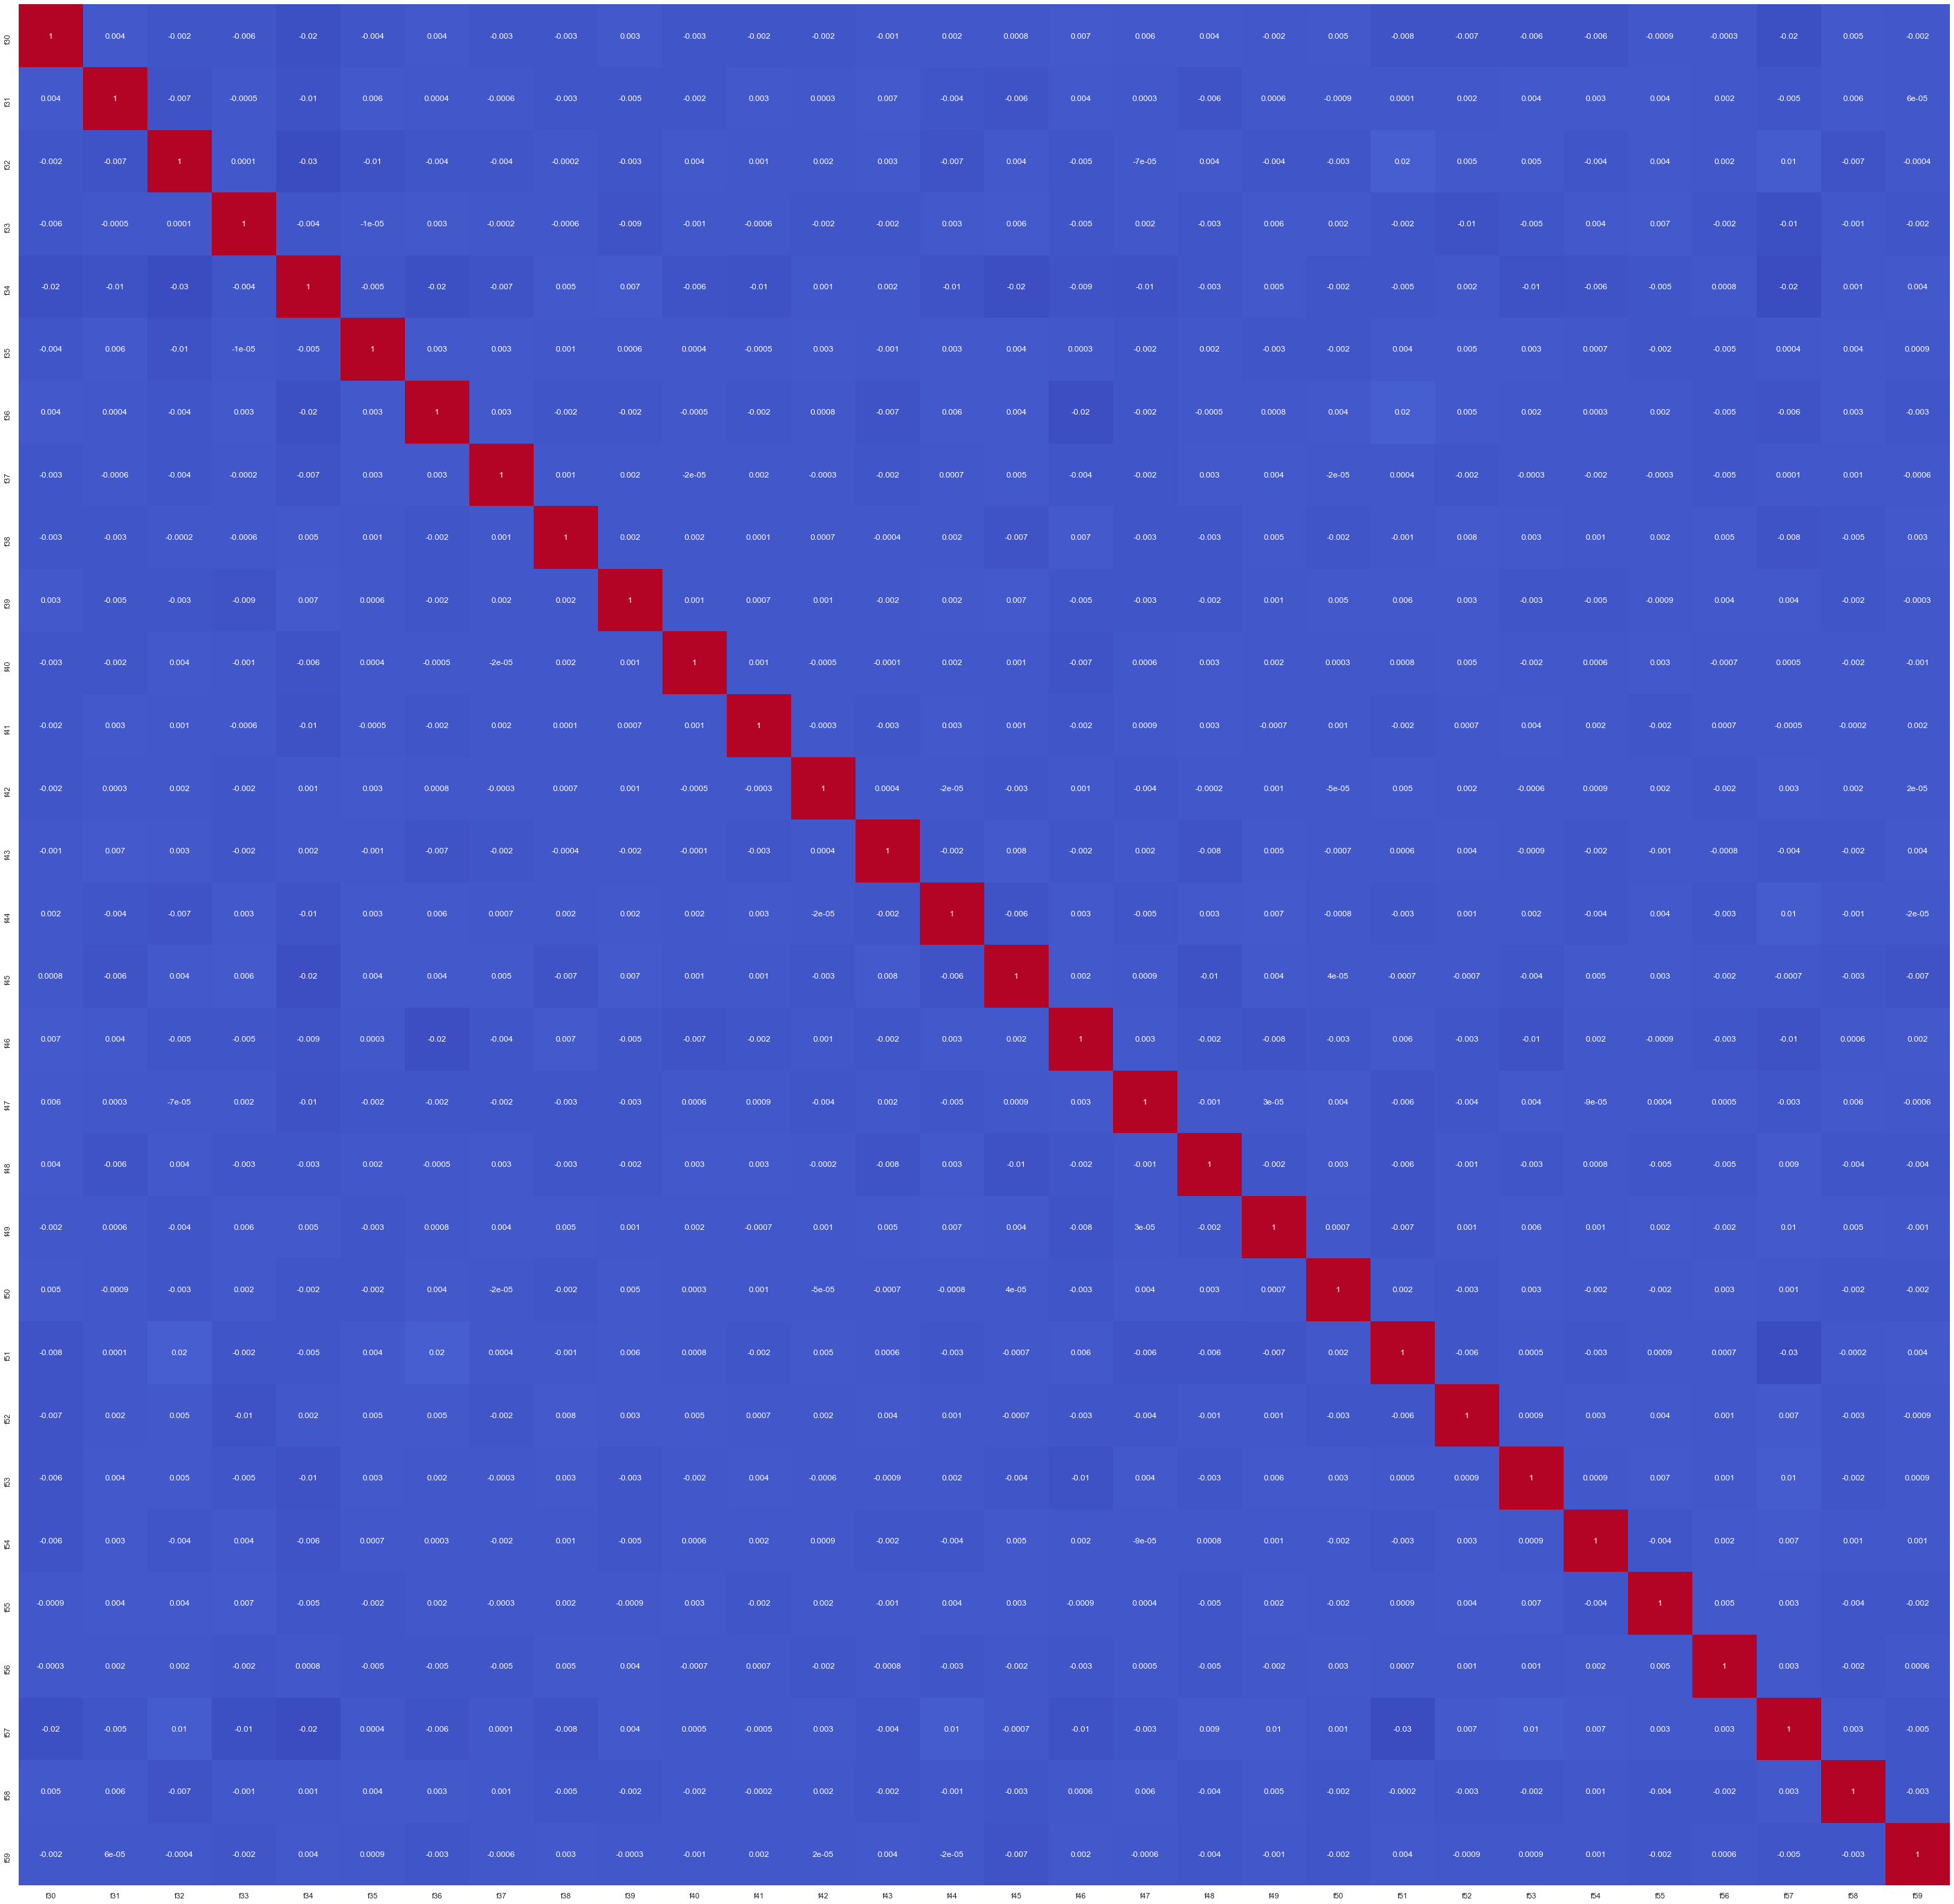

In [21]:
plt.subplots(figsize=(50,50))
sns.heatmap(cor.iloc[30:60, 30:60], annot=True, fmt='.1g', cmap='coolwarm', cbar=False)

<AxesSubplot:>

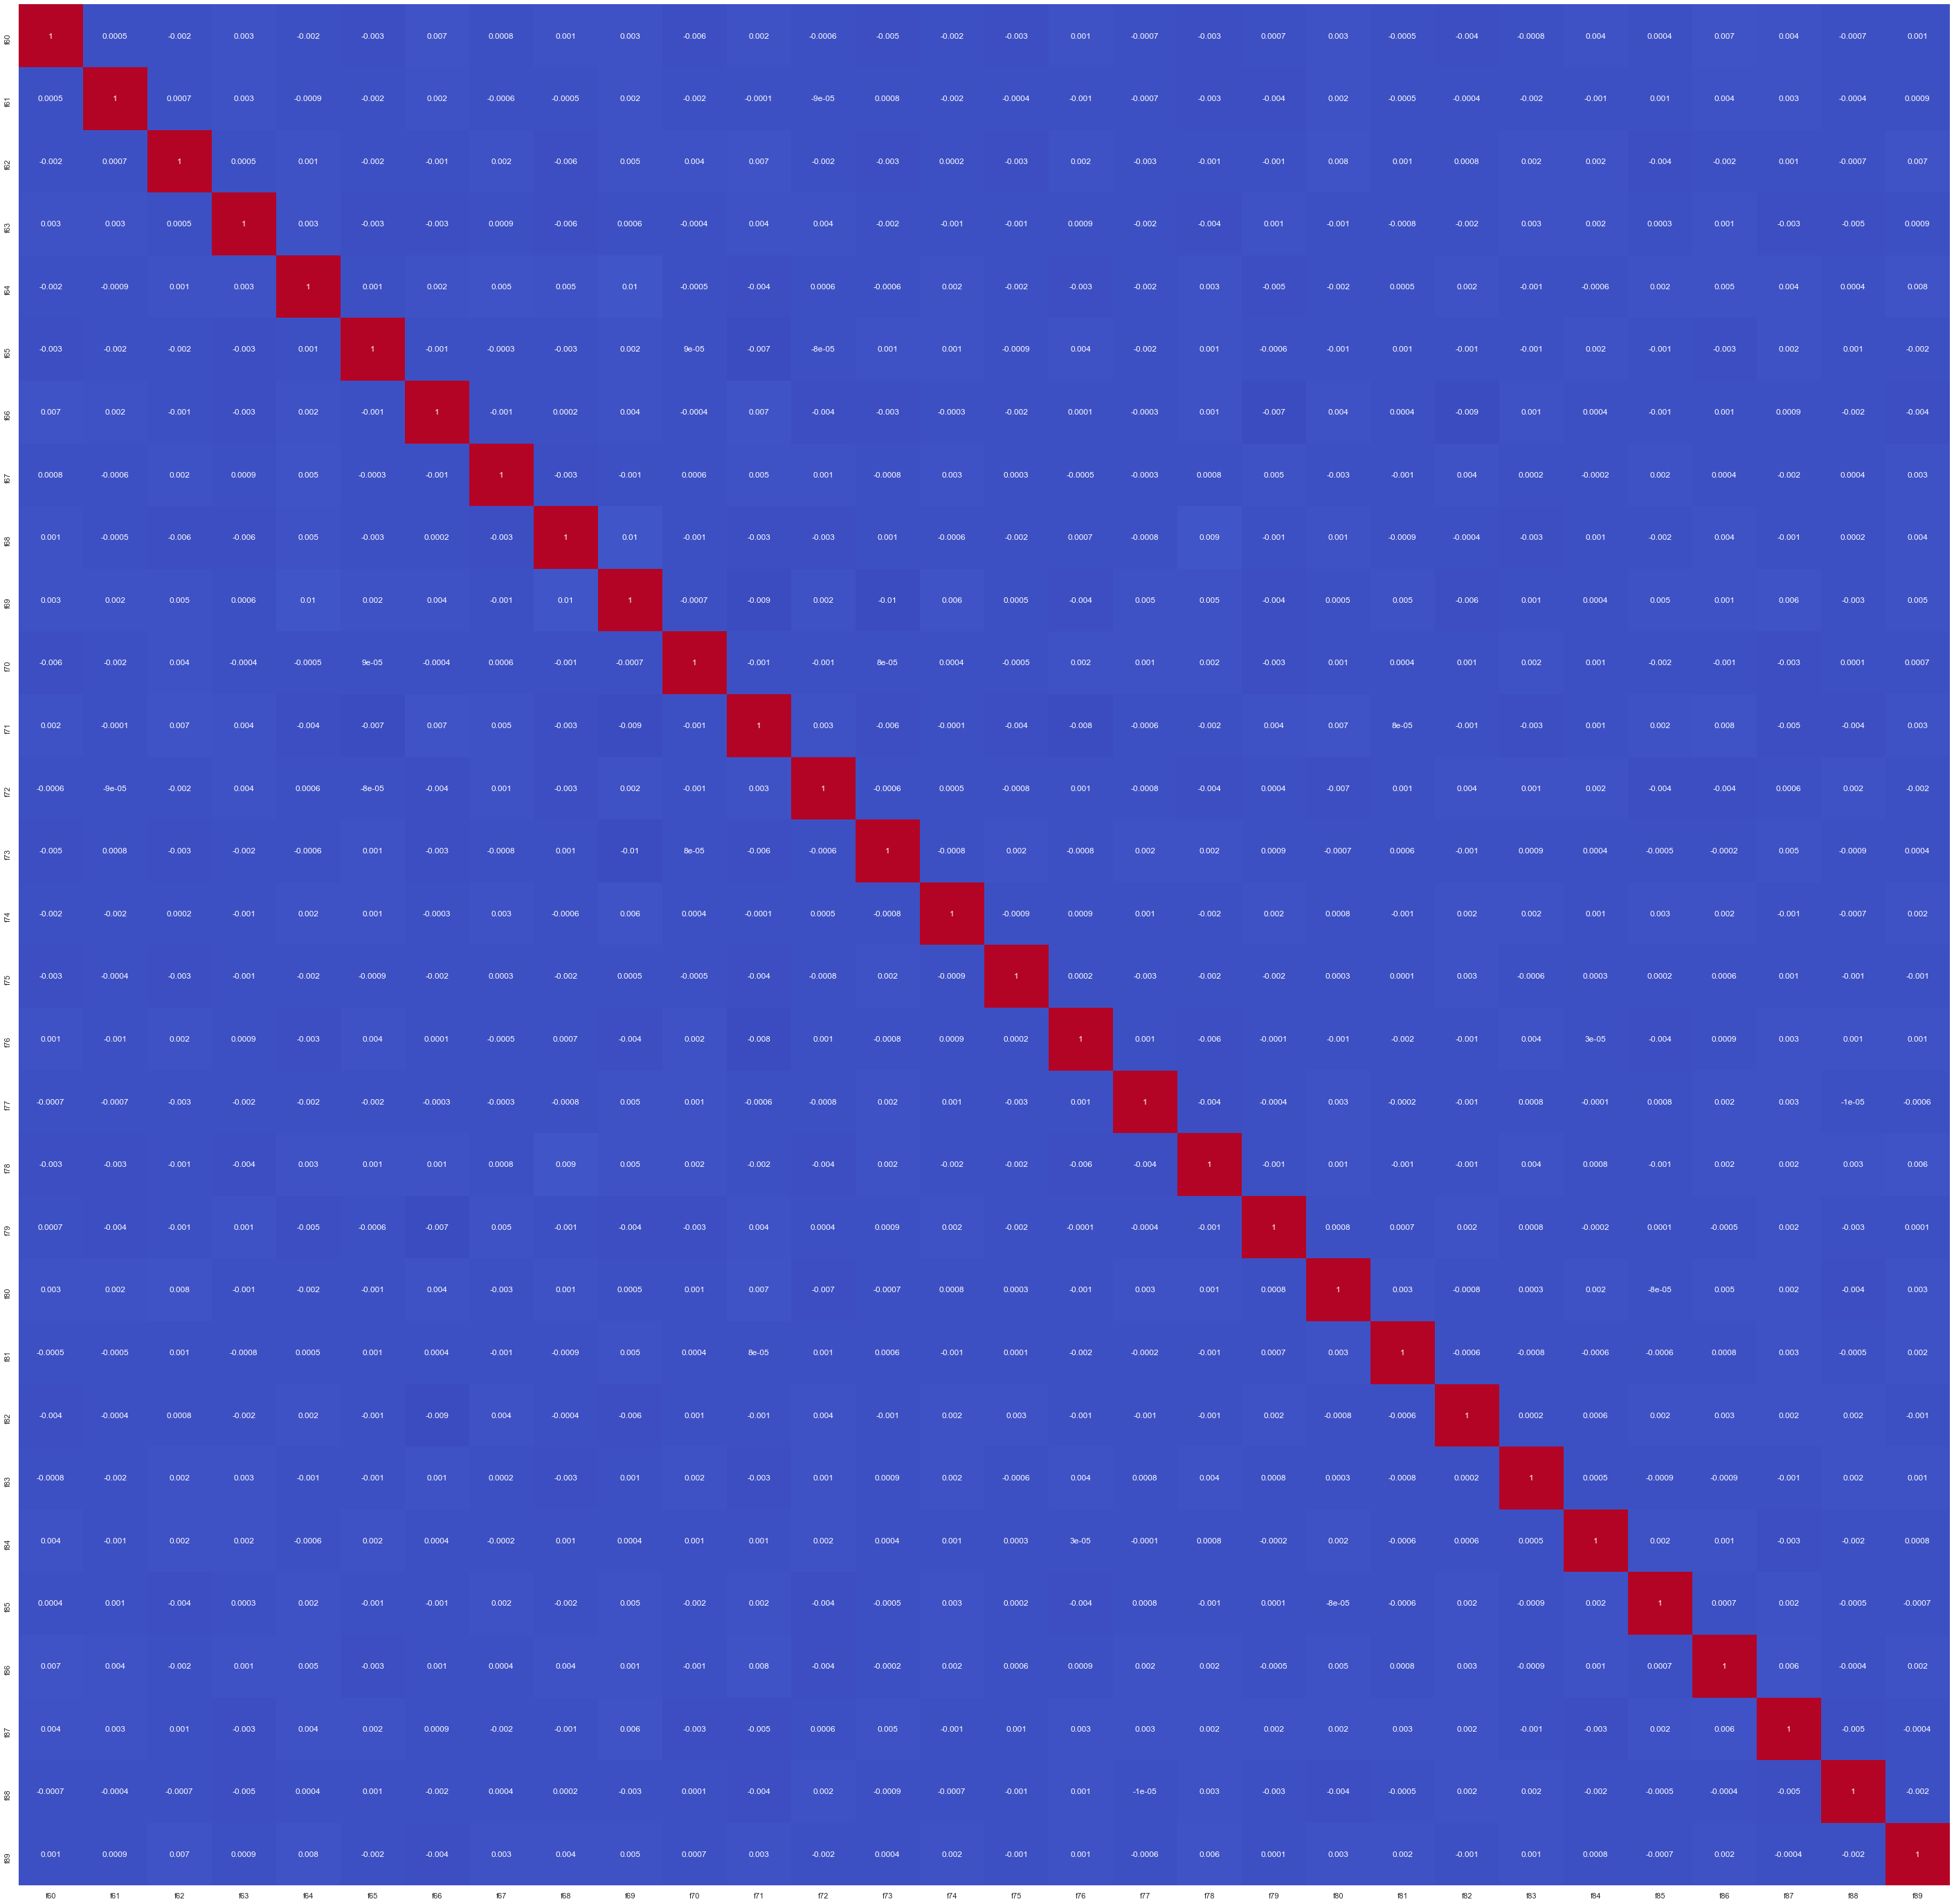

In [22]:
plt.subplots(figsize=(50,50))
sns.heatmap(cor.iloc[60:90, 60:90], annot=True,fmt='.1g', cmap='coolwarm', cbar=False)

<AxesSubplot:>

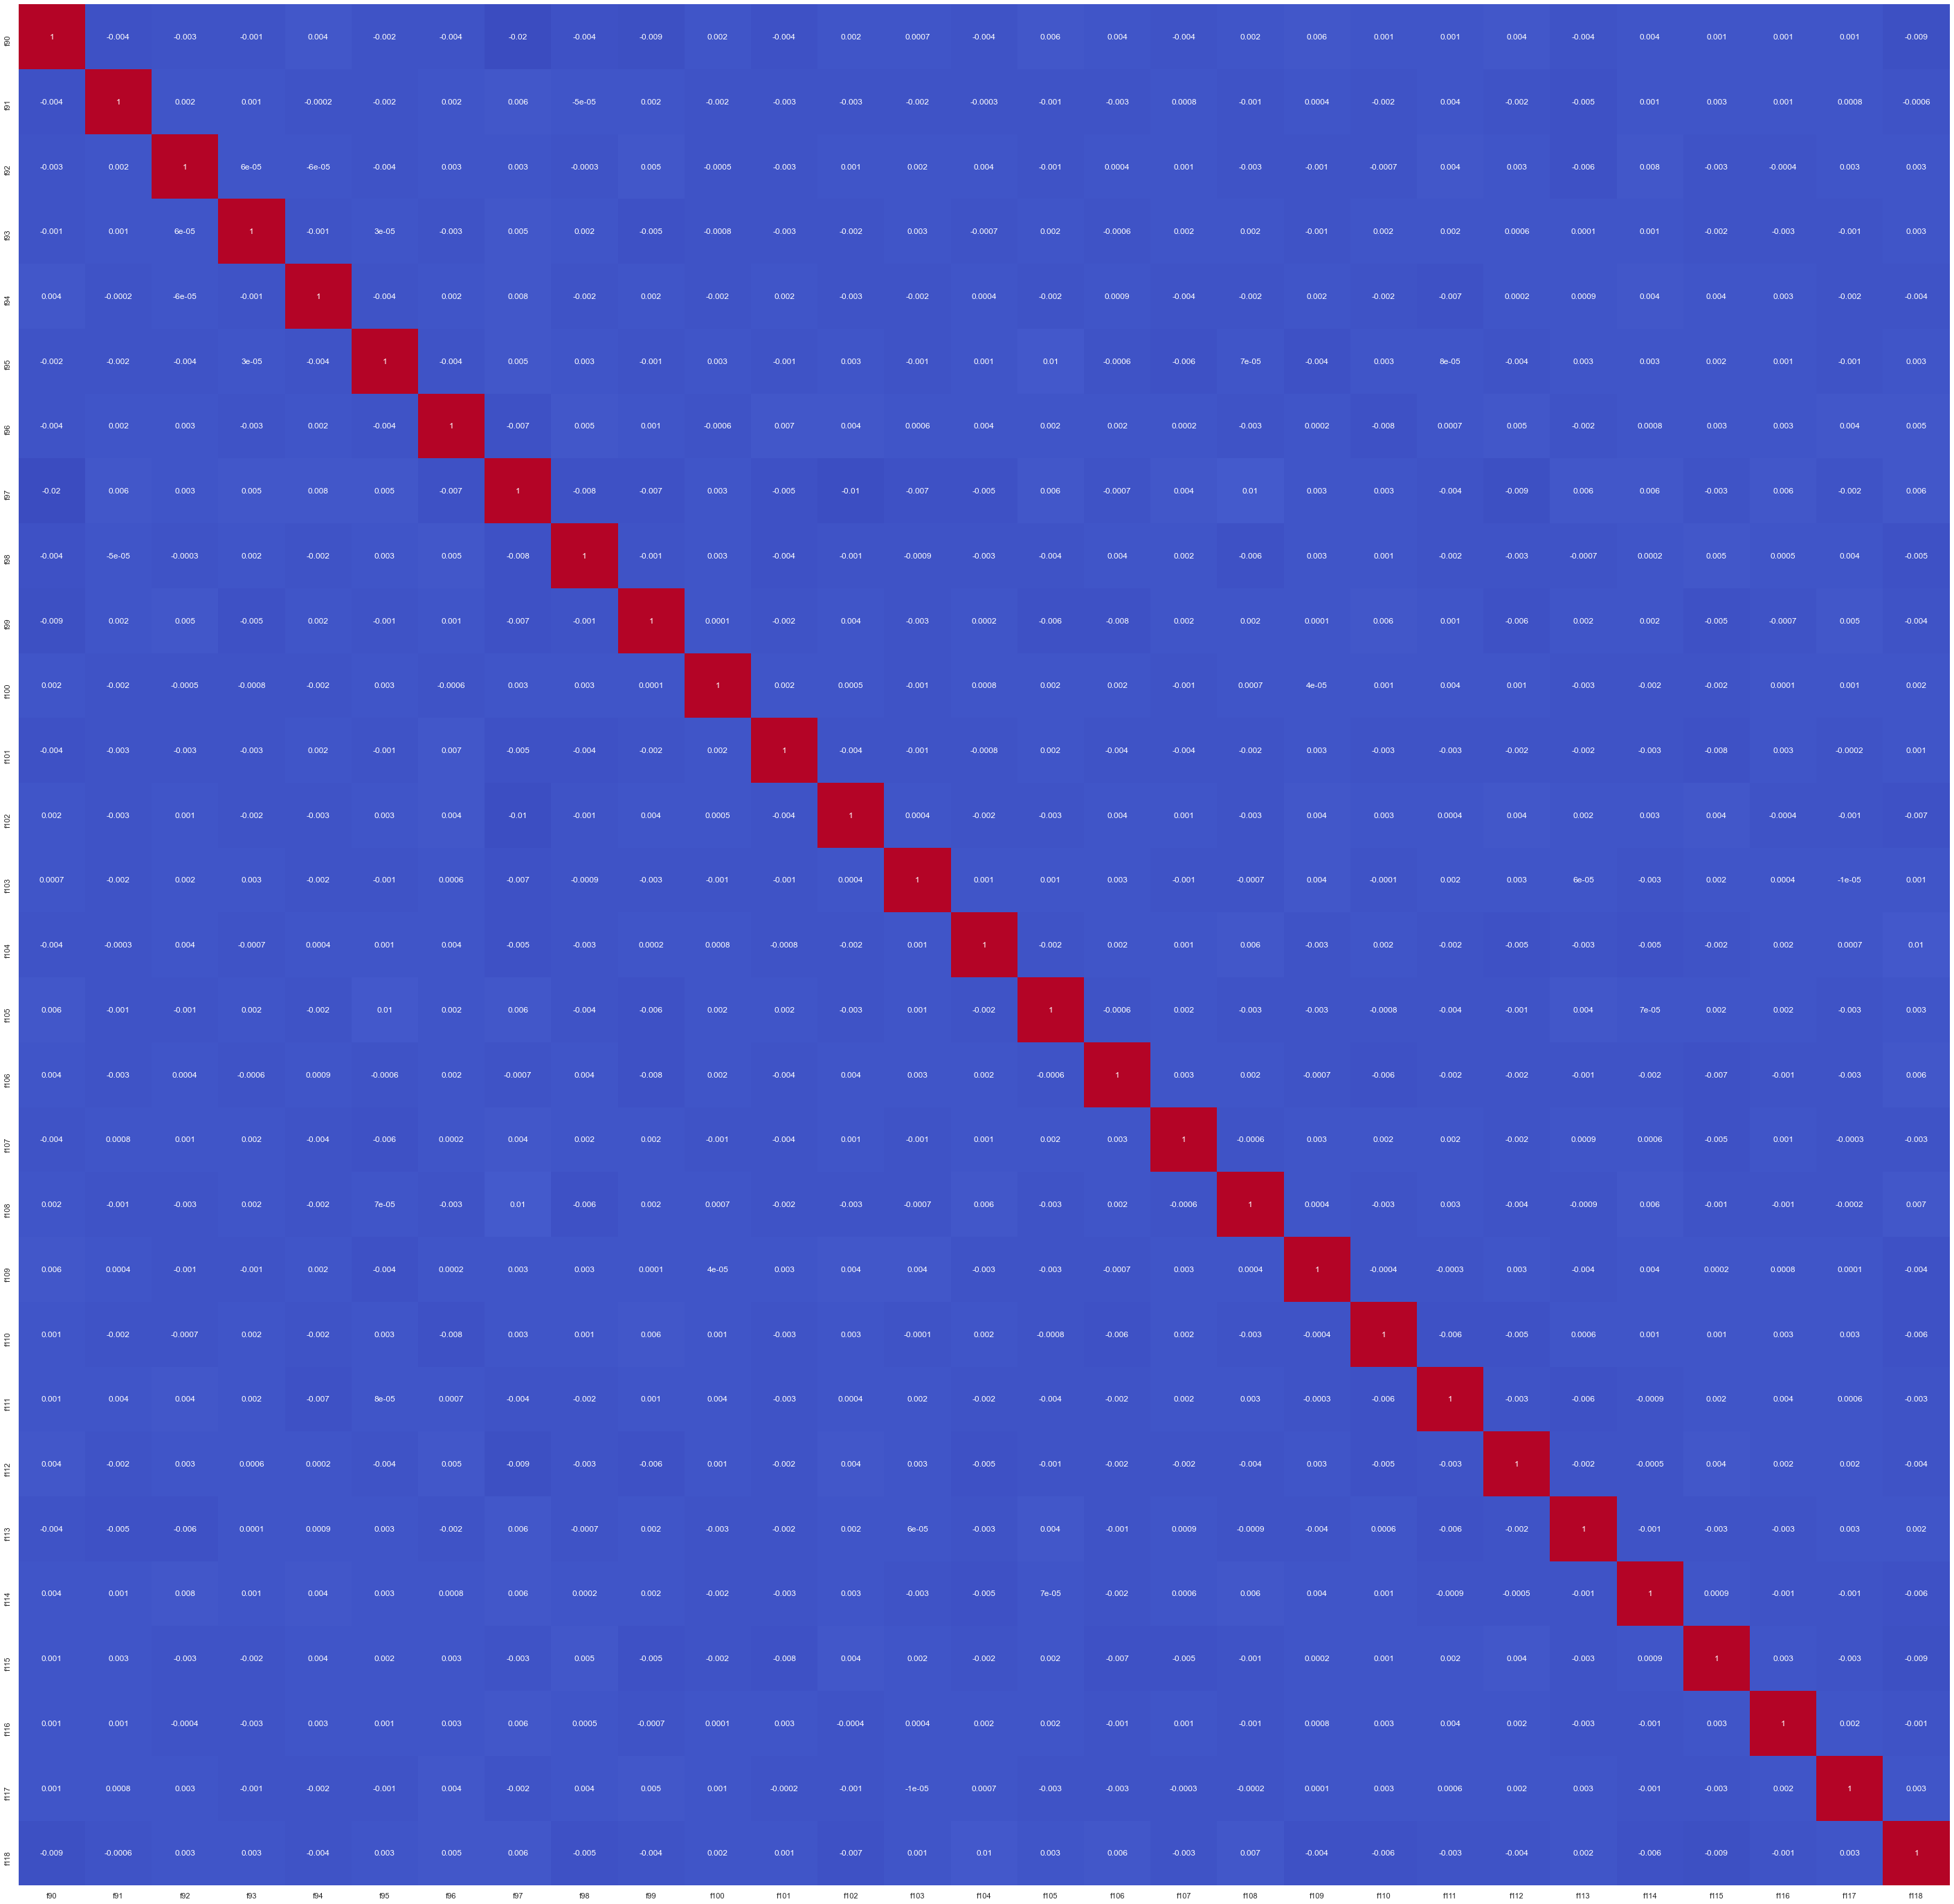

In [23]:
plt.subplots(figsize=(50,50))
sns.heatmap(cor.iloc[90:119, 90:119], annot=True,fmt='.1g', cmap='coolwarm', cbar=False)

The predictors aren't correlated, this is a good news. I won't remove any of them.
Now let's see the correlation between claim column and all the rest.

In [24]:
cor['claim'].sort_values()

f34        -0.021505
f57        -0.017977
f45        -0.017692
f21        -0.014342
f52        -0.012356
              ...   
f31         0.013903
f8          0.014311
f95         0.014771
na_count    0.452653
claim       1.000000
Name: claim, Length: 121, dtype: float64

As we can see, the only columns slightly correlated with claim field is the one
we created.

## Outliers
We can check the outliers with a boxplot for every feature.

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


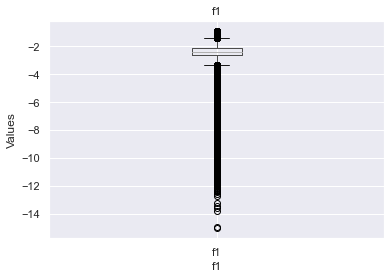

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


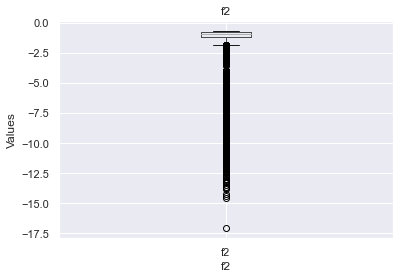

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


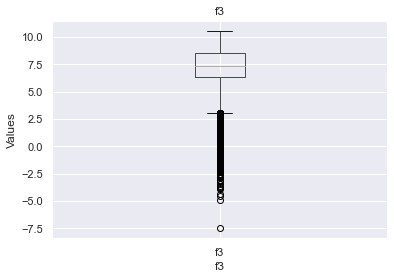

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


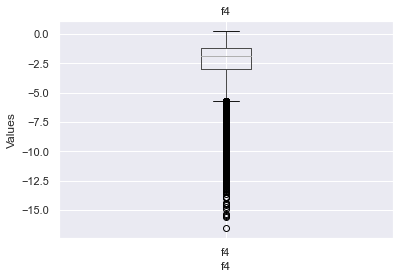

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


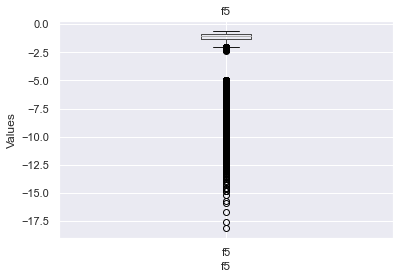

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


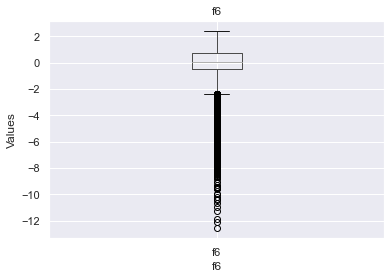

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


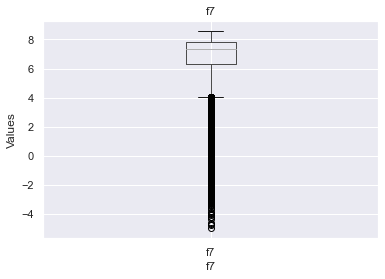

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


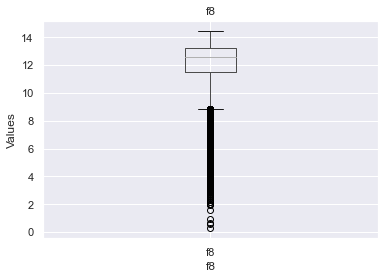

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


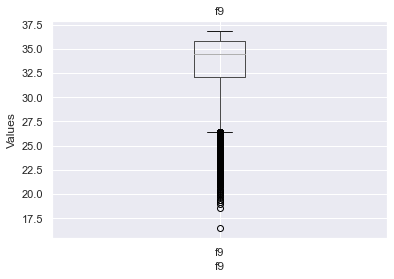

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


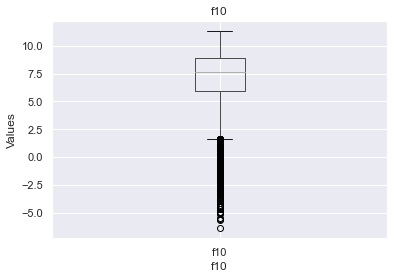

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


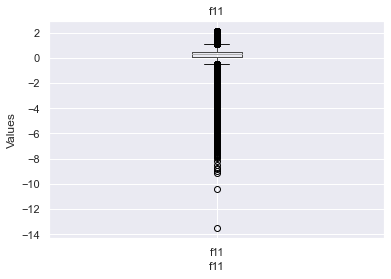

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


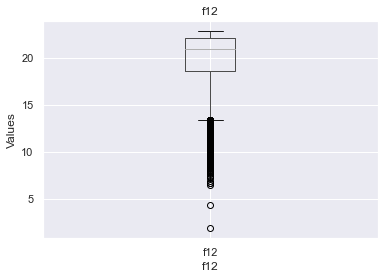

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


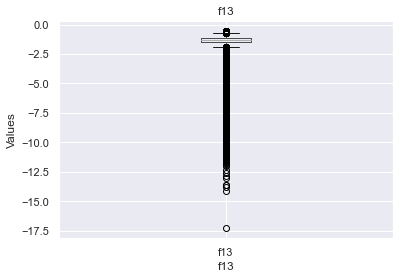

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


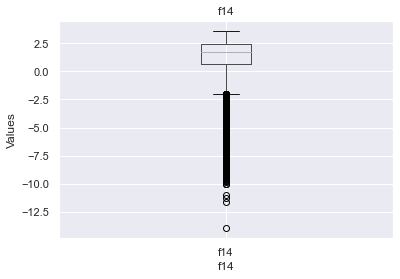

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


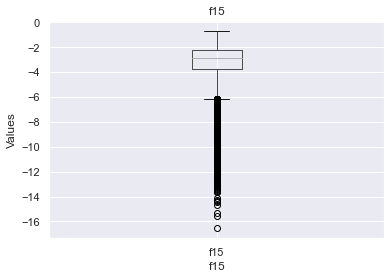

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


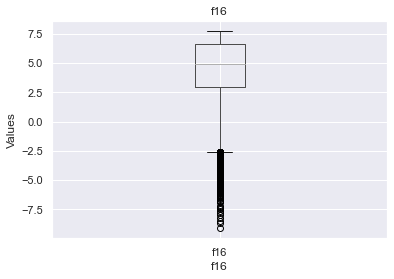

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


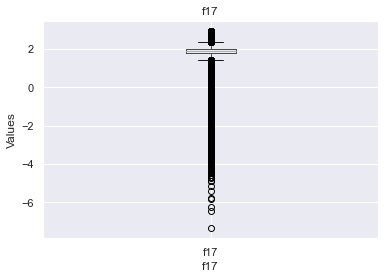

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


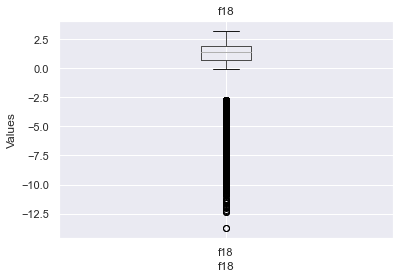

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


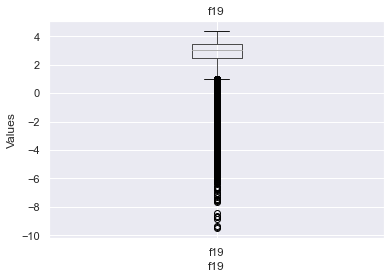

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


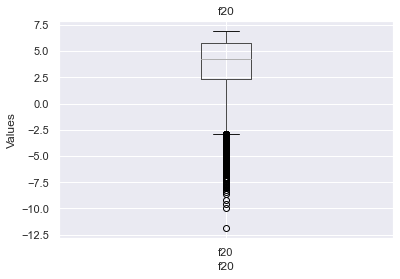

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


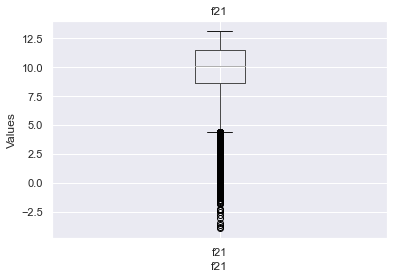

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


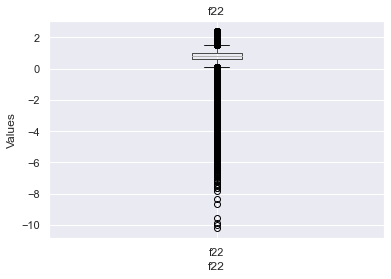

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


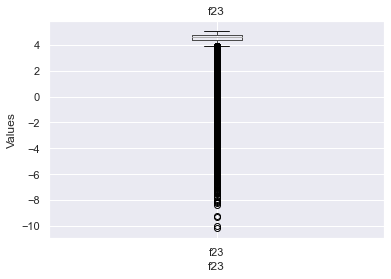

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


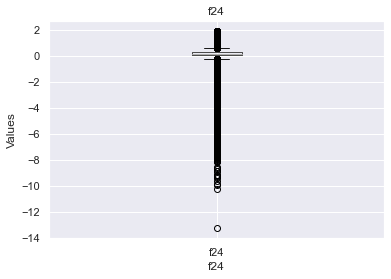

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


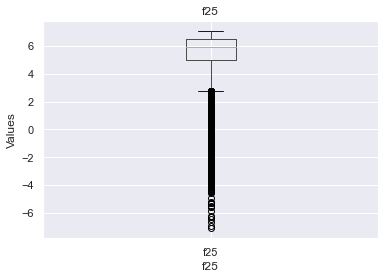

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


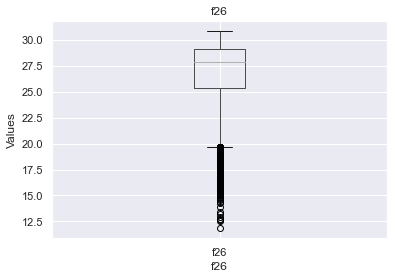

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


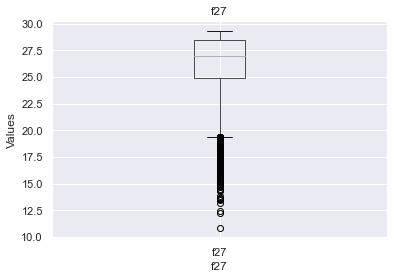

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


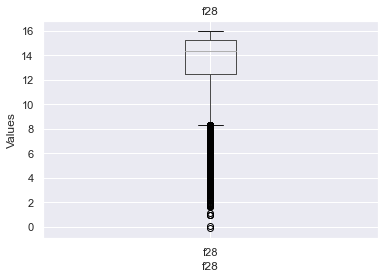

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


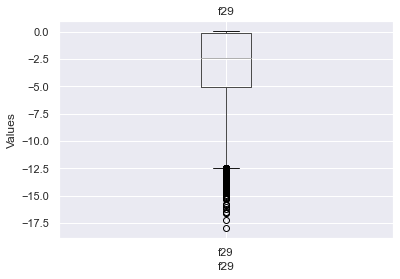

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


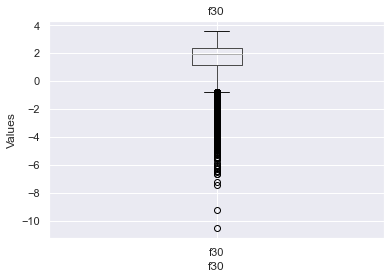

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


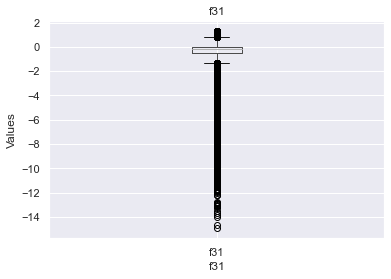

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


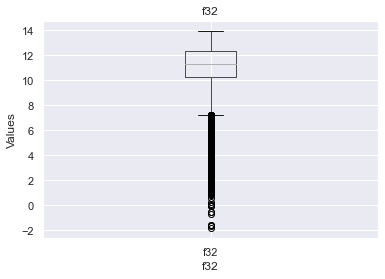

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


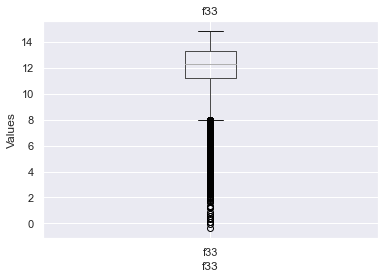

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


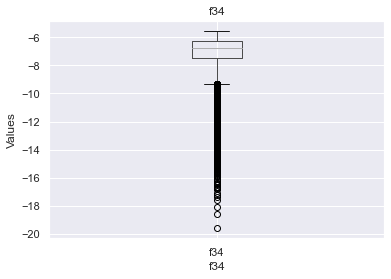

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


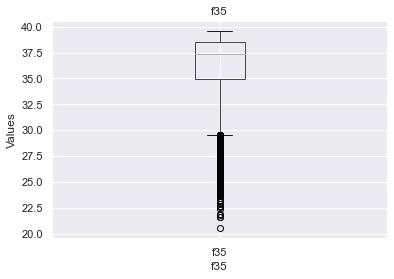

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


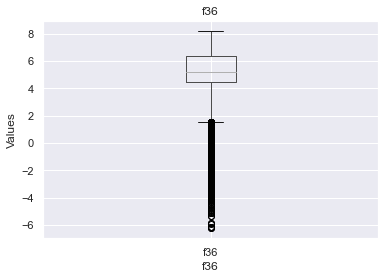

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


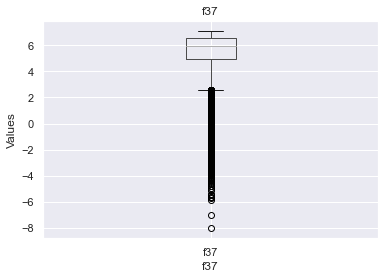

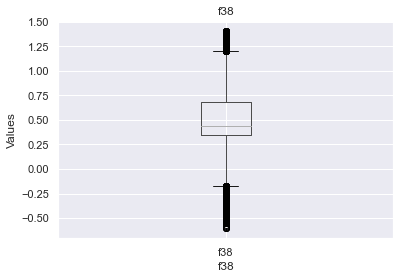

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


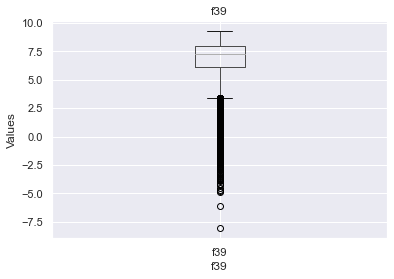

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


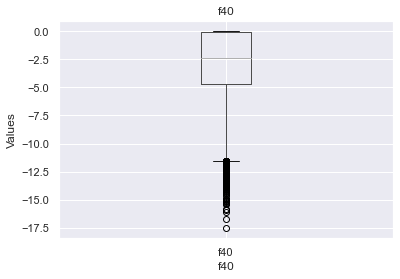

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


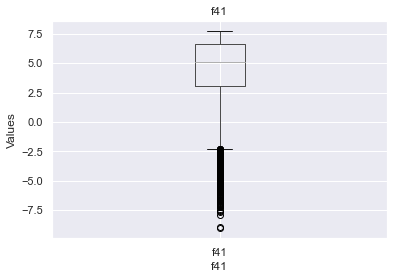

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


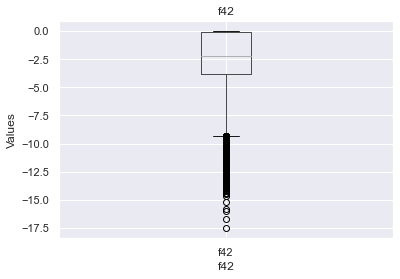

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


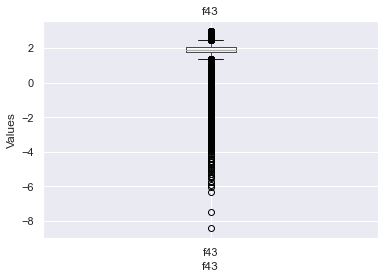

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


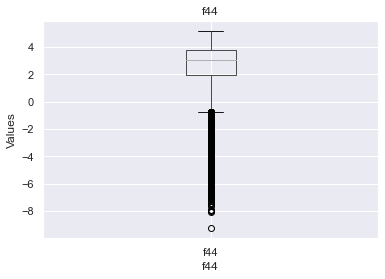

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


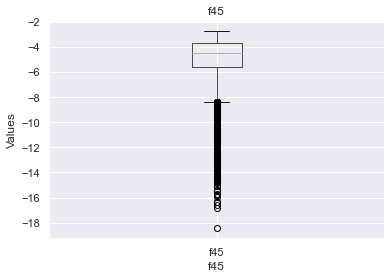

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


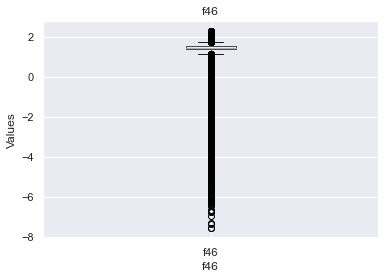

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


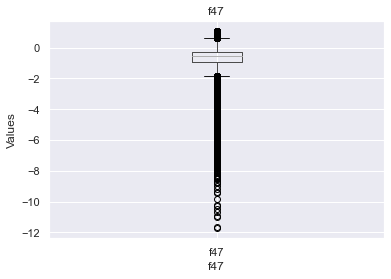

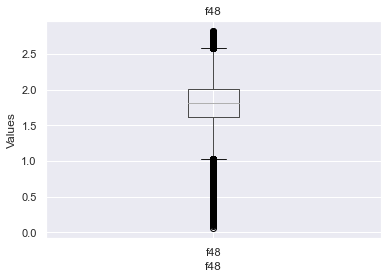

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


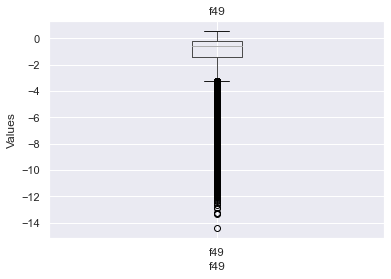

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


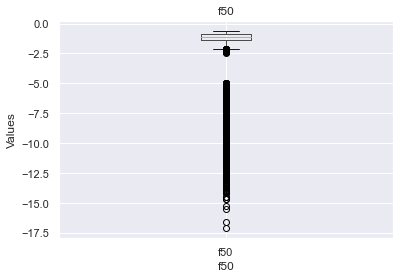

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


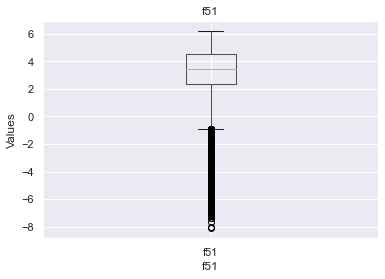

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


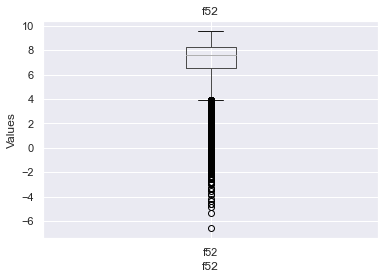

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


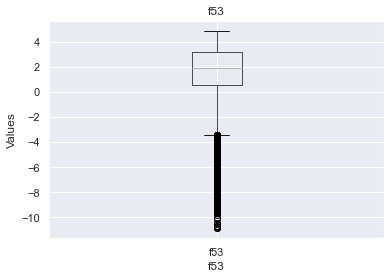

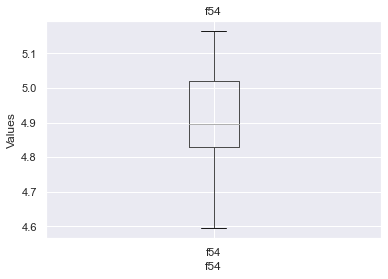

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


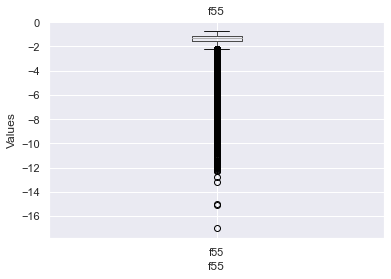

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


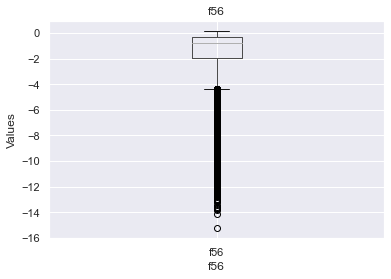

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


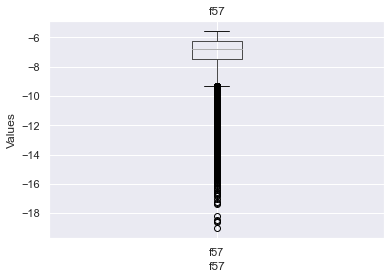

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


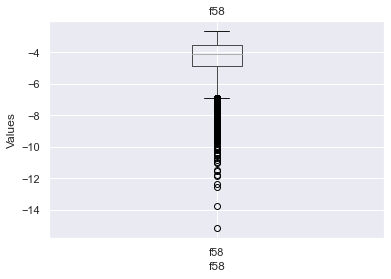

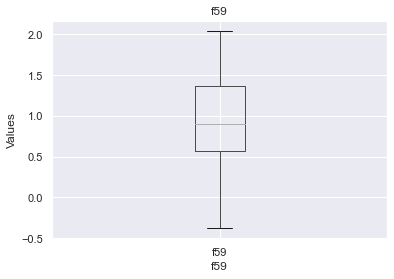

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


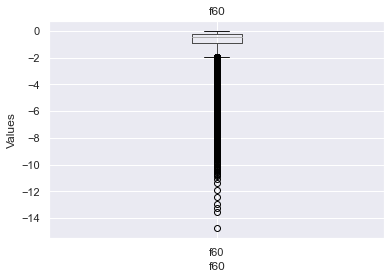

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


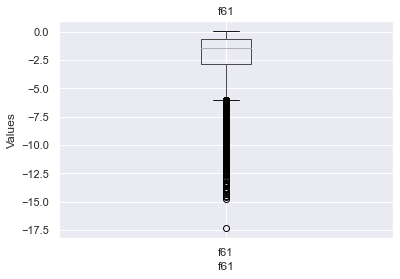

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


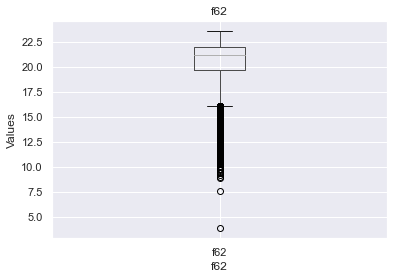

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


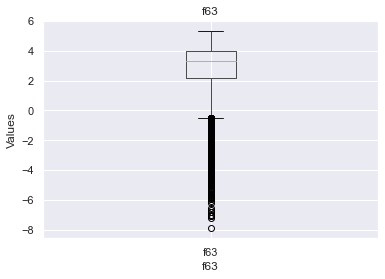

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


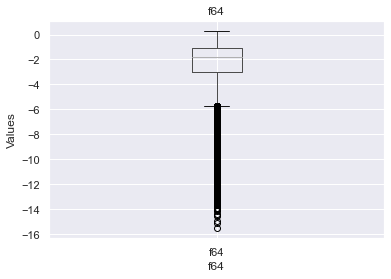

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


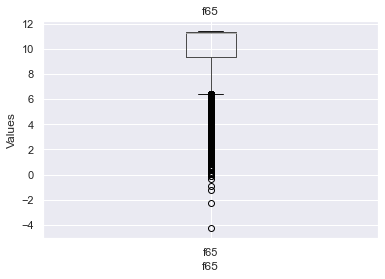

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


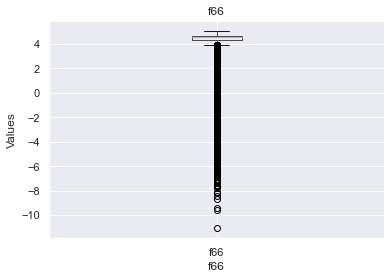

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


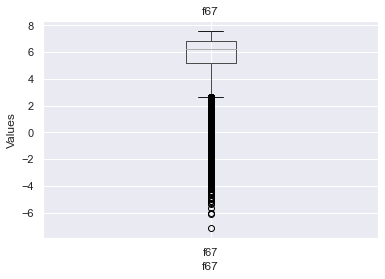

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


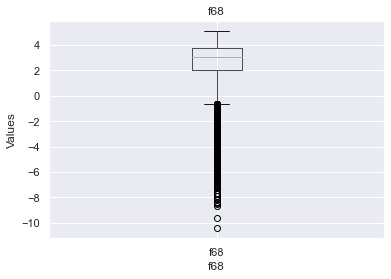

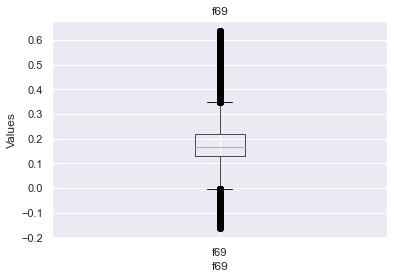

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


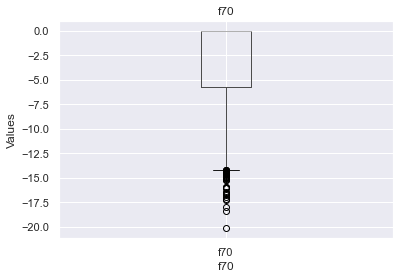

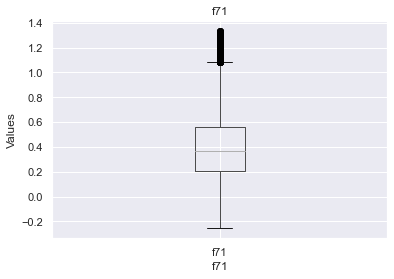

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


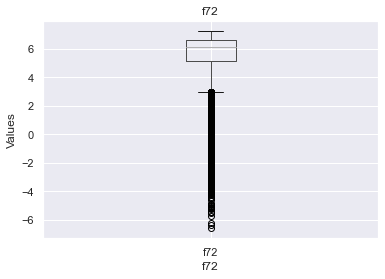

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


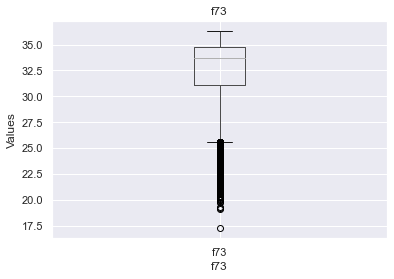

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


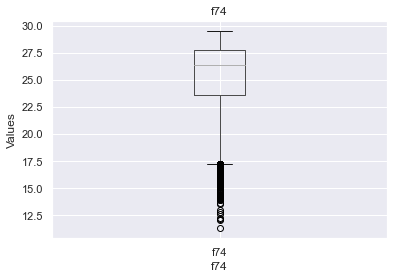

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


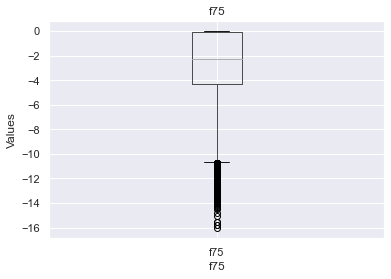

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


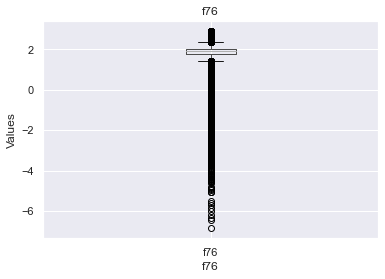

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


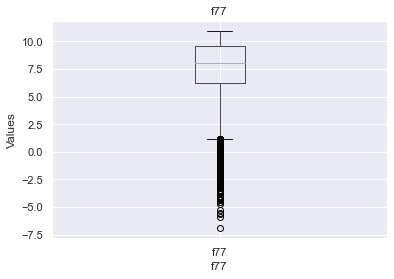

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


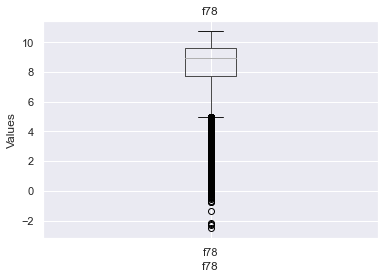

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


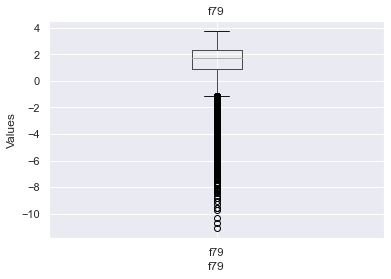

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


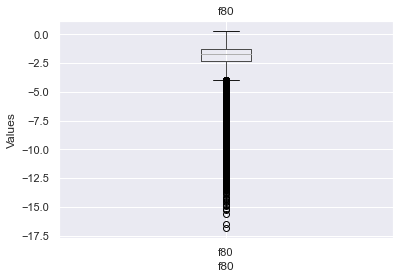

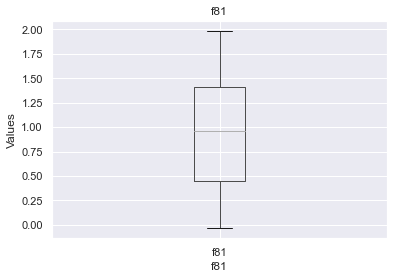

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


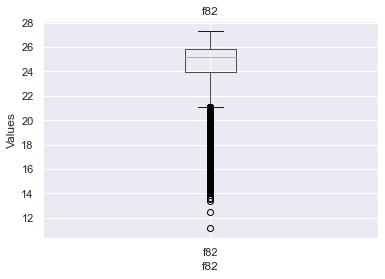

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


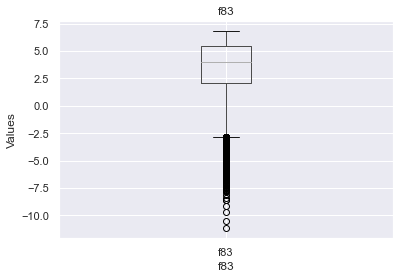

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


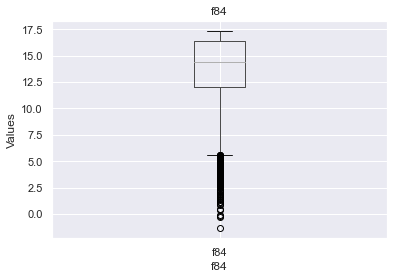

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


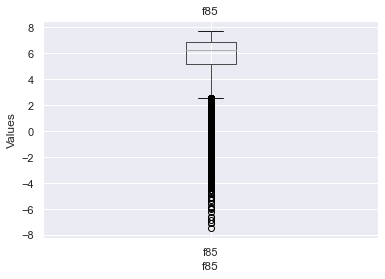

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


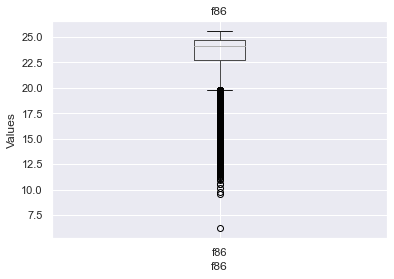

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


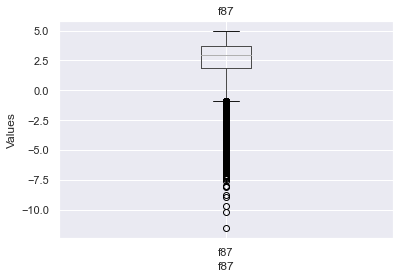

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


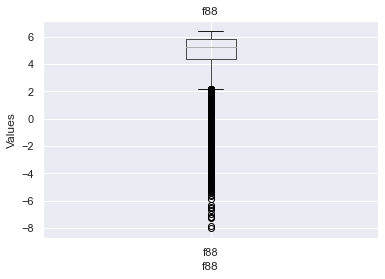

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


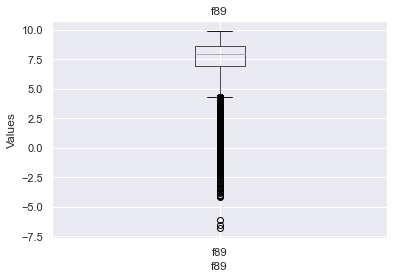

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


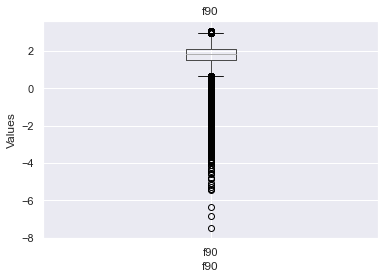

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


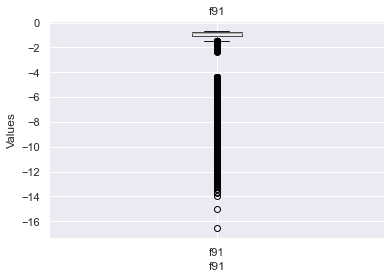

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


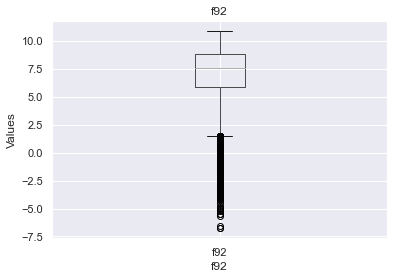

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


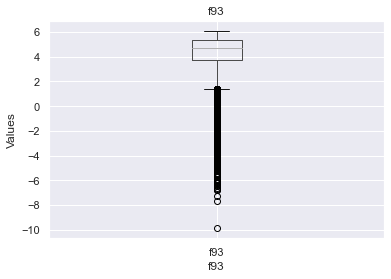

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


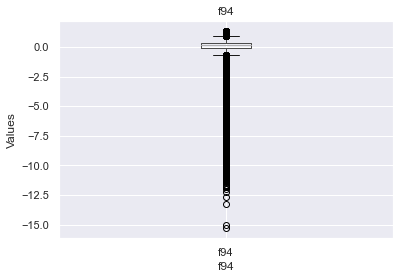

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


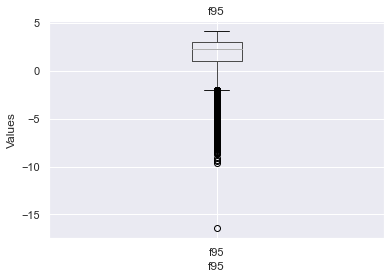

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


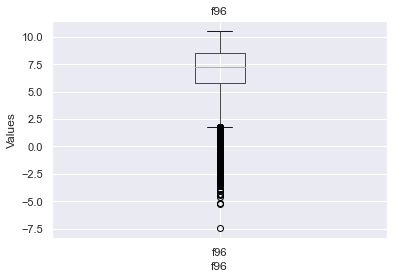

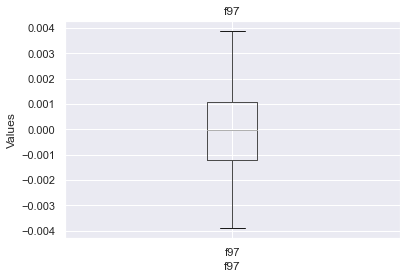

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


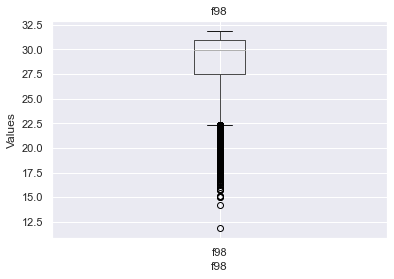

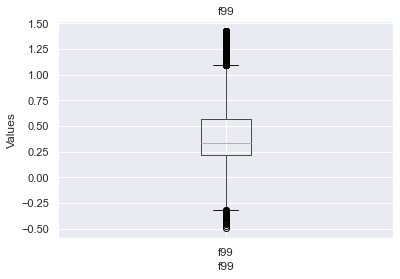

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


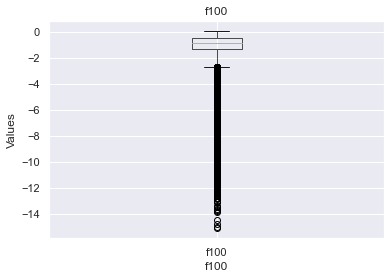

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


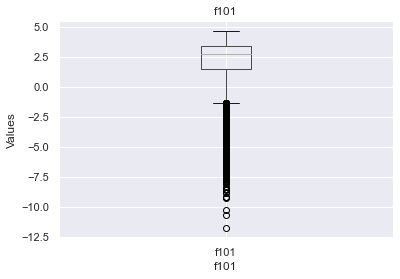

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


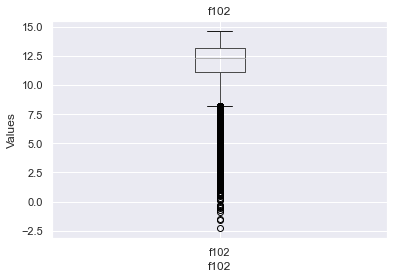

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


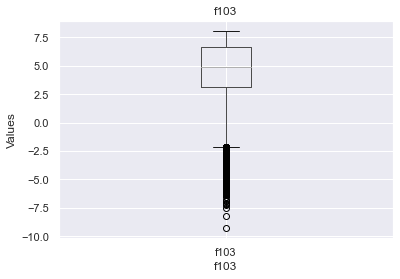

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


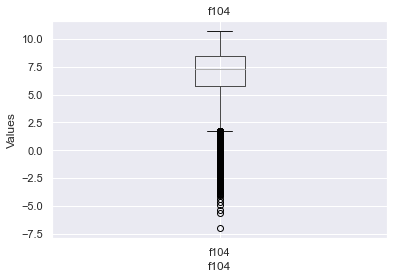

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


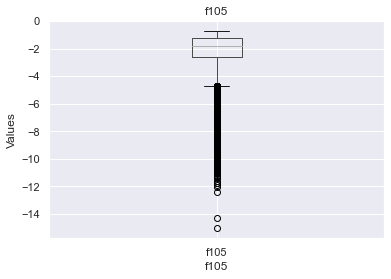

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


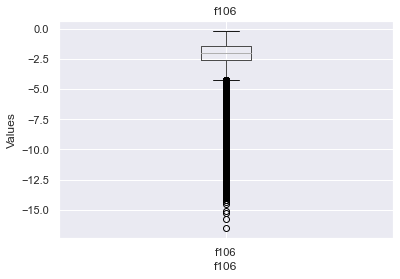

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


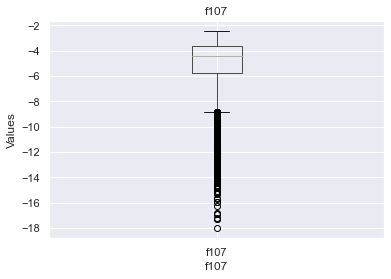

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


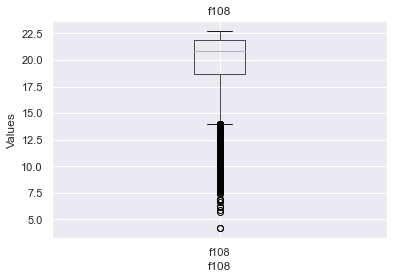

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


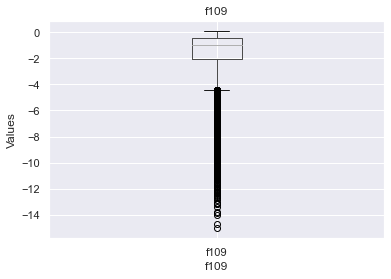

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


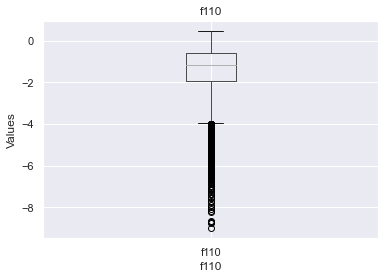

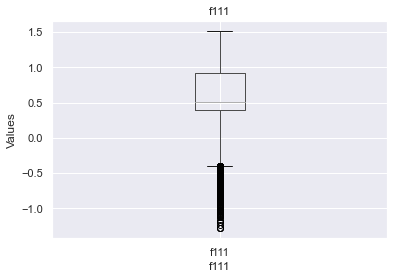

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


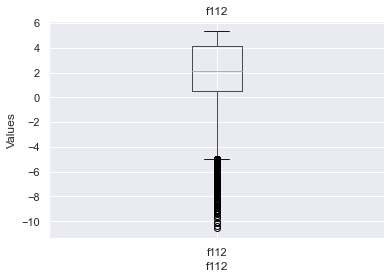

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


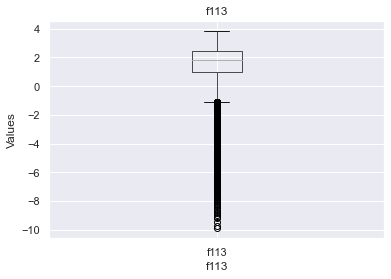

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


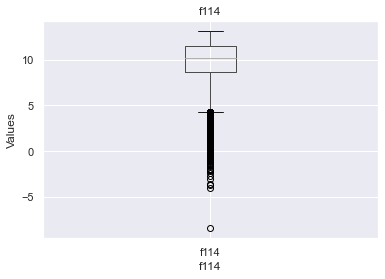

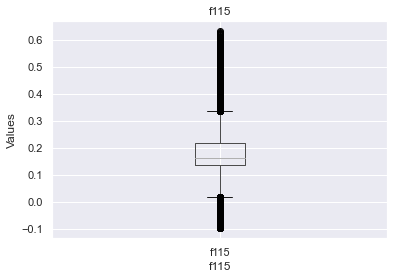

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


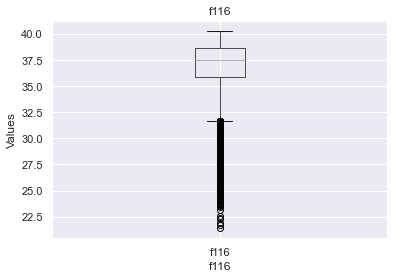

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


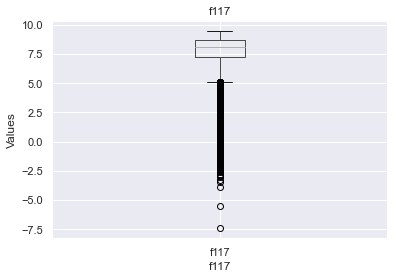

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


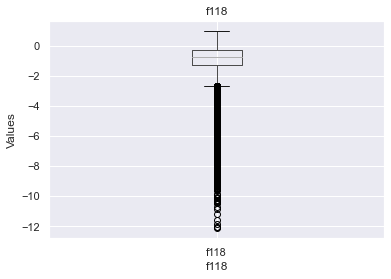

In [25]:
for feature in features_with_na:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel('Values')
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

## Missing values
We saw previously that every predictor has pretty much the same proportion of 
missing values: if I remember right about 1.6%.
Now we have to use them to gain the information they carry with.

In [26]:
# for feature in features_with_na:
  #  print("{}: {}% of missing values".format(feature, train[feature].isnull().mean()))

We saw that the dataset contains a lot of outliers. So I will replace the NAs
with the median of the corresponding feature.

But before that, I will create a column which contains NAs count per raw, because
we see previously that missing values impact the class proportion.

In [27]:
for feature in features_with_na:
    median_value = train[feature].median()

    # train[feature+'nan'] = np.where(train[feature].isnull(), 1, 0) does it make sense with only 1.6% of records with na for each variable?
    # or we add to many variables and few information?
    train[feature].fillna(median_value, inplace=True)

train.isnull().sum()

id          0
f1          0
f2          0
f3          0
f4          0
           ..
f116        0
f117        0
f118        0
claim       0
na_count    0
Length: 121, dtype: int64

Let's check if datasets index and id column are equals:

In [28]:
print((train['id'] != train.index).sum(), (test['id'] != (test.index + train.shape[0])).sum(), sep="\n")

0
0


In [29]:
train.reset_index(inplace=True)

Now we are sure that id columns ad dataframes indexes are equals, so I'll drop id column
(both from the train set and the test set).

In [30]:
train.drop(columns=['index','id'], inplace=True)
test.drop(columns='id',inplace=True)

## Log normal transformations

As we saw earlier, now I'll apply a log transformation to each column.

In [31]:
#for feature in features_with_na:
 #   train[feature] = np.log(train[feature])

## Feature Scaling

We can check the min and the max of each feature, in order to see if the features
vary in scale or not.

In [32]:
pd.set_option('display.max_rows', None)
train.apply([np.min, np.max]).transpose()

amin          amax
f1       -1.499100e-01  4.151700e-01
f2       -1.904400e-02  5.189900e-01
f3       -9.421700e+03  3.954400e+04
f4       -8.212200e-02  1.319900e+00
f5       -6.989800e-03  5.547500e-01
f6       -1.279100e+01  1.120200e+01
f7       -2.248000e+02  5.426600e+03
f8       -2.984300e+04  1.913700e+06
f9       -1.153300e+15  1.042400e+16
f10      -2.640400e+04  8.562200e+04
f11      -8.086300e+00  8.650500e+00
f12      -4.081000e+08  8.473600e+09
f13      -1.038000e-01  5.897700e-01
f14      -8.537600e-01  3.695100e+01
f15      -3.356600e-01  5.096300e-01
f16      -1.168800e+02  2.335400e+03
f17      -3.664500e+00  1.918900e+01
f18      -6.652700e-02  2.545800e+01
f19      -4.422500e+00  8.015400e+01
f20      -5.883400e+01  1.032200e+03
f21      -8.407900e+04  5.235900e+05
f22      -6.009400e+00  1.130600e+01
f23      -2.051400e+01  1.604500e+02
f24      -5.735200e+00  6.960000e+00
f25      -7.150200e+01  1.220800e+03
f26      -6.956700e+11  2.580500e+13
f27      -9.384200e+11  5.447100e+12
f28      -4.706000e+05  8.960600e+06
f29      -5.659200e-03  1.095800e+00
f30      -5.299900e-01  3.674400e+01
f31      -3.813500e+00  3.753100e+00
f32      -3.496500e+05  1.154000e+06
f33      -6.055900e+05  2.873200e+06
f34      -3.881300e-03  3.918600e-03
f35      -2.068900e+16  1.590500e+17
f36      -2.414300e+03  3.728500e+03
f37      -4.088100e+01  1.218000e+03
f38       5.461000e-01  4.084000e+00
f39      -4.337000e+02  1.119500e+04
f40      -7.641000e-03  1.043500e+00
f41      -1.073800e+02  2.335400e+03
f42      -5.771000e-02  1.028700e+00
f43      -4.421400e+00  1.997800e+01
f44      -8.189200e+00  1.809700e+02
f45      -1.026000e-02  6.679400e-02
f46      -3.561500e+00  1.006600e+01
f47      -2.617200e+00  3.015300e+00
f48       1.056400e+00  1.687000e+01
f49      -1.730600e+00  1.799000e+00
f50      -6.924000e-03  5.483200e-01
f51      -1.319500e+02  5.031700e+02
f52      -7.216100e+02  1.455300e+04
f53      -2.663700e+01  1.317500e+02
f54       9.886800e+01  1.751600e+02
f55      -3.395600e-02  4.960700e-01
f56      -5.205200e-02  1.186600e+00
f57      -3.899000e-03  3.905500e-03
f58      -1.179000e+00  7.194700e-02
f59       6.836400e-01  7.734600e+00
f60      -1.509900e-01  1.014100e+00
f61      -1.969200e-01  1.075100e+00
f62      -1.825600e+09  1.828900e+10
f63      -1.194100e+01  2.104300e+02
f64      -1.347800e-01  1.352000e+00
f65      -3.302600e+03  9.187100e+04
f66      -2.202100e+01  1.617500e+02
f67      -6.868200e+01  1.996700e+03
f68      -2.159800e+00  1.676600e+02
f69       8.492200e-01  1.891700e+00
f70      -9.200600e-03  1.017900e+00
f71       7.742000e-01  3.799900e+00
f72      -6.466900e+01  1.453900e+03
f73      -2.802800e+14  6.087900e+15
f74      -6.106700e+11  6.694600e+12
f75      -1.316300e-02  1.030400e+00
f76      -2.986200e+00  1.836600e+01
f77      -1.546000e+03  5.688900e+04
f78      -1.284200e+03  4.750300e+04
f79      -2.428800e+01  4.355200e+01
f80      -1.761500e-02  1.357200e+00
f81       9.642000e-01  7.288300e+00
f82      -7.345700e+10  7.389700e+11
f83      -2.875200e+01  9.505300e+02
f84      -2.992000e+06  3.451100e+07
f85      -7.454500e+01  2.307500e+03
f86      -5.949500e+09  1.309700e+11
f87      -7.616400e+00  1.470800e+02
f88      -2.257600e+01  6.181300e+02
f89      -2.967800e+02  2.067500e+04
f90      -2.575700e-01  2.199400e+01
f91      -1.223800e-02  5.162900e-01
f92      -1.282900e+04  5.536200e+04
f93      -1.292200e+01  4.487800e+02
f94      -3.293300e+00  3.925100e+00
f95      -1.352400e+00  6.531700e+01
f96      -7.764300e+03  3.870400e+04
f97       9.961000e-01  1.003900e+00
f98      -5.714600e+12  7.170100e+13
f99       6.082000e-01  4.169100e+00
f100     -3.455900e-02  1.061300e+00
f101     -4.294900e+00  1.056200e+02
f102     -2.277700e+05  2.337900e+06
f103     -2.222100e+02  3.260900e+03
f104     -1.158100e+04  4.687600e+04
f105     -2.902700e-02  4.915600e-01
f106     -6.672600e-02  8.485500e-01
f107     -7.535400e-03  8.901900e-02
f108     -5.877000e+08

Features scale vay a lot, I will use a standard scaler to standardize the data.

In [33]:
lst = list(train.columns)
lst[-1], lst[-2] = lst[-2],lst[-1]

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train.loc[:, 'f1':'na_count'])

StandardScaler()

Now I'll train a model, and after having chosen the best one I will perform
the same preprocessing steps on test data, in order to make the predictions.

## Model Building

Train/Test split:

In [35]:
# I copy the training set in another object so I will keep it unmodified.
X = train.copy()
y = X.pop('claim')

# Splitting the train set in train and test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123,
    train_size=0.75, test_size=0.25)

### Baseline Model

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [37]:
baseline_model = XGBClassifier(random_state=123, 
            n_estimators=100,
            max_depth= 5, 
            subsample=0.8, 
            colsample_by_tree=0.8,
            learning_rate=0.1)
baseline_model.fit(X_train, y_train,
             verbose = False,
             eval_set = [(X_test, y_test)],
             eval_metric = "auc",
             early_stopping_rounds = 500)
preds = baseline_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, preds))

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_by_tree" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8118076801046661


## Test preprocessing
Now I'll apply exactly the same preprocessing steps I used for the training set
on the test set

In [38]:
#test = pd.read_csv('C:/Users/rbuzzini/Documents/Personale/Git/Python/Fun Projects/datasets/Kaggle competitions/test.csv')

In [ ]:
#test.drop(columns='id', inplace=True)

In [ ]:
test.head()

id        f1        f2        f3       f4       f5       f6       f7  \
0  957919  0.165850  0.487050   1295.00  0.02310  0.31900  0.90188   573.29   
1  957920  0.129650  0.373480   1763.00  0.72884  0.33247 -1.26310   875.55   
2  957921  0.120190  0.445210    736.26  0.04615  0.29605  0.31665  2659.50   
3  957922  0.054008  0.395960    996.14  0.85934  0.36678 -0.17060   386.56   
4  957923  0.079947 -0.006919  10574.00  0.34845  0.45008 -1.84200  3027.00   

         f8            f9       f10      f11           f12      f13      f14  \
0    3743.7  2.705700e+12  6221.000  1.17200  5.175000e+09  0.25831  3.42050   
1  554370.0  5.955700e+14   934.430  1.89790  4.905100e+09  0.28471  2.13870   
2  317140.0  3.977800e+14   131.810 -0.48404  3.800000e+06  0.37173  0.40245   
3  325680.0 -3.432200e+13   -26.473 -2.12930  4.675400e+09  0.26659  1.09680   
4  428150.0  9.291500e+11  5999.400  1.87380  1.857300e+09  0.32259  2.21150   

        f15       f16      f17      f18     f19       f20       f21      f22  \
0  0.044983  1001.600  10.1040  10.5360  19.517   -1.1209   1577.60  2.18470   
1 -0.034328    35.223   6.5873  12.7340  29.590    4.1639  31915.00  3.11580   
2  0.015119  1991.600   6.0050   0.9919  11.949  888.0700    887.70  3.52370   
3 -0.083571  1987.500   6.8989  11.1230  23.164  133.5700   -815.32  2.72950   
4 -0.107200   661.070   6.5391   6.8495   7.258  468.7400  10316.00  0.79638   

       f23     f24      f25           f26           f27        f28       f29  \
0   96.109  1.1535   95.865  2.847100e+12  9.642100e+10  6406000.0  0.002990   
1  109.430 -0.8522  991.370  4.700100e+09  1.618200e+12   967810.0  1.021500   
2  108.140 -1.6542  528.140  2.463600e+12  9.005900e+09     7259.3  1.007400   
3   82.011  3.8374  304.570 -1.315900e+10 -8.324500e+09  2297700.0  0.099522   
4  111.520  1.4098  429.790  4.121700e+12 -3.945700e+08     7119.4  1.027700   

       f30       f31       f32       f33       f34           f35       f36  \
0   6.6353 -0.015913   21723.0   67604.0 -0.000227  6.046200e+16   203.580   
1   2.9617  0.810310  415570.0  384720.0  0.002243  6.712900e+15   228.590   
2   2.6123  1.062500 -208010.0   65708.0  0.001391  8.129800e+13   -84.032   
3   4.9249  0.659900   48773.0  199560.0 -0.000621  3.993800e+16  1400.400   
4  16.1210  0.994510  372800.0   12042.0 -0.000659  1.869200e+14  -129.580   

       f37     f38      f39       f40       f41       f42     f43       f44  \
0  301.790  1.3461  5524.60 -0.003163   21.8830  0.027383  7.2113  24.82500   
1   33.952  1.4938  2067.50 -0.002343   32.7720  0.092283  6.5363   2.07730   
2      NaN  1.7556  4729.20  0.003527  861.6600  0.902670  9.3934  58.78500   
3  503.660  1.9131  2811.60  0.002362  278.2000  0.989190  7.4646  33.62400   
4  933.150  2.7392   490.84  0.012809    5.2358  0.009404  1.3044   0.29176   

        f45     f46       f47     f48       f49      f50       f51      f52  \
0 -0.001420  4.8950 -1.087100  7.0561 -1.061500  0.00010   1.85600   449.99   
1  0.046237  4.4590 -0.840920  4.4473 -1.001200  0.00375  99.64700  8146.80   
2  0.007244  5.6645 -0.627470  6.5806 -1.128200  0.38650  56.54700   125.36   
3  0.025889  4.1921  0.096508  4.8219 -0.010526  0.34624   0.92399  1392.10   
4  0.001332  4.0513  0.846520  4.9508 -0.670400  0.43678  36.11000   961.45   

        f53     f54      f55      f56       f57      f58     f59       f60  \
0  -0.36286  160.63  0.24801  0.62300  0.000116 -0.39384  1.9038  0.068588   
1  22.50400  153.40  0.43076  0.74301 -0.000047 -0.11692  1.6544  0.467440   
2  12.70300  147.38  0.41437  0.51998  0.000857 -0.12065  5.4115  0.772530   
3   1.38660  144.19  0.14750  0.26398 -0.000571 -0.14971  4.8384  0.357740   
4   0.47044  108.67  0.25482  0.27473 -0.001589 -0.99328  2.5776  0.903620   

        f61           f62      f63       f64      f65       f66       f67  \
0  0.020439  2.506500e+09  48.1640 -0.002272  78643.0  112.3600  1021.900   
1  0.129650  4.442800e+08  38.5060  0.396220  7

Create na_count feature and then remove every missing value:

In [41]:
test['na_count'] = test.transpose().isnull().sum()

Replace NAs with the median:

In [42]:
for feature in test.columns:
    median_value = test[feature].median()

    # train[feature+'nan'] = np.where(train[feature].isnull(), 1, 0) does it make sense with only 1.6% of records with na for each variable?
    # or we add to many variables and few information?
    test[feature].fillna(median_value, inplace=True)

test.isnull().sum()

f1          0
f2          0
f3          0
f4          0
f5          0
f6          0
f7          0
f8          0
f9          0
f10         0
f11         0
f12         0
f13         0
f14         0
f15         0
f16         0
f17         0
f18         0
f19         0
f20         0
f21         0
f22         0
f23         0
f24         0
f25         0
f26         0
f27         0
f28         0
f29         0
f30         0
f31         0
f32         0
f33         0
f34         0
f35         0
f36         0
f37         0
f38         0
f39         0
f40         0
f41         0
f42         0
f43         0
f44         0
f45         0
f46         0
f47         0
f48         0
f49         0
f50         0
f51         0
f52         0
f53         0
f54         0
f55         0
f56         0
f57         0
f58         0
f59         0
f60         0
f61         0
f62         0
f63         0
f64         0
f65         0
f66         0
f67         0
f68         0
f69         0
f70         0
f71         0
f72   

Log transformation:

In [ ]:
#for feature in test.columns:
 #   if 0 not in test[feature].unique():
      #  test[feature] = np.log(test[feature])
    #else:
     #   pass

C:\Users\rbuzzini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Scaling test data:

In [43]:
scaler.fit(test.loc[:, 'f1':'na_count'])

StandardScaler()

Predictions:

In [46]:
train.shape[0]

957919

In [49]:
test.shape[0]

493474

In [52]:
test['id'] = np.arange(train.shape[0], train.shape[0] + test.shape[0], 1)

In [56]:
test.head()

f1        f2        f3       f4       f5       f6       f7        f8  \
0  0.165850  0.487050   1295.00  0.02310  0.31900  0.90188   573.29    3743.7   
1  0.129650  0.373480   1763.00  0.72884  0.33247 -1.26310   875.55  554370.0   
2  0.120190  0.445210    736.26  0.04615  0.29605  0.31665  2659.50  317140.0   
3  0.054008  0.395960    996.14  0.85934  0.36678 -0.17060   386.56  325680.0   
4  0.079947 -0.006919  10574.00  0.34845  0.45008 -1.84200  3027.00  428150.0   

             f9       f10      f11           f12      f13      f14       f15  \
0  2.705700e+12  6221.000  1.17200  5.175000e+09  0.25831  3.42050  0.044983   
1  5.955700e+14   934.430  1.89790  4.905100e+09  0.28471  2.13870 -0.034328   
2  3.977800e+14   131.810 -0.48404  3.800000e+06  0.37173  0.40245  0.015119   
3 -3.432200e+13   -26.473 -2.12930  4.675400e+09  0.26659  1.09680 -0.083571   
4  9.291500e+11  5999.400  1.87380  1.857300e+09  0.32259  2.21150 -0.107200   

        f16      f17      f18     f19       f20       f21      f22      f23  \
0  1001.600  10.1040  10.5360  19.517   -1.1209   1577.60  2.18470   96.109   
1    35.223   6.5873  12.7340  29.590    4.1639  31915.00  3.11580  109.430   
2  1991.600   6.0050   0.9919  11.949  888.0700    887.70  3.52370  108.140   
3  1987.500   6.8989  11.1230  23.164  133.5700   -815.32  2.72950   82.011   
4   661.070   6.5391   6.8495   7.258  468.7400  10316.00  0.79638  111.520   

      f24      f25           f26           f27        f28       f29      f30  \
0  1.1535   95.865  2.847100e+12  9.642100e+10  6406000.0  0.002990   6.6353   
1 -0.8522  991.370  4.700100e+09  1.618200e+12   967810.0  1.021500   2.9617   
2 -1.6542  528.140  2.463600e+12  9.005900e+09     7259.3  1.007400   2.6123   
3  3.8374  304.570 -1.315900e+10 -8.324500e+09  2297700.0  0.099522   4.9249   
4  1.4098  429.790  4.121700e+12 -3.945700e+08     7119.4  1.027700  16.1210   

        f31       f32       f33       f34           f35       f36      f37  \
0 -0.015913   21723.0   67604.0 -0.000227  6.046200e+16   203.580  301.790   
1  0.810310  415570.0  384720.0  0.002243  6.712900e+15   228.590   33.952   
2  1.062500 -208010.0   65708.0  0.001391  8.129800e+13   -84.032  358.440   
3  0.659900   48773.0  199560.0 -0.000621  3.993800e+16  1400.400  503.660   
4  0.994510  372800.0   12042.0 -0.000659  1.869200e+14  -129.580  933.150   

      f38      f39       f40       f41       f42     f43       f44       f45  \
0  1.3461  5524.60 -0.003163   21.8830  0.027383  7.2113  24.82500 -0.001420   
1  1.4938  2067.50 -0.002343   32.7720  0.092283  6.5363   2.07730  0.046237   
2  1.7556  4729.20  0.003527  861.6600  0.902670  9.3934  58.78500  0.007244   
3  1.9131  2811.60  0.002362  278.2000  0.989190  7.4646  33.62400  0.025889   
4  2.7392   490.84  0.012809    5.2358  0.009404  1.3044   0.29176  0.001332   

      f46       f47     f48       f49      f50       f51      f52       f53  \
0  4.8950 -1.087100  7.0561 -1.061500  0.00010   1.85600   449.99  -0.36286   
1  4.4590 -0.840920  4.4473 -1.001200  0.00375  99.64700  8146.80  22.50400   
2  5.6645 -0.627470  6.5806 -1.128200  0.38650  56.54700   125.36  12.70300   
3  4.1921  0.096508  4.8219 -0.010526  0.34624   0.92399  1392.10   1.38660   
4  4.0513  0.846520  4.9508 -0.670400  0.43678  36.11000   961.45   0.47044   

      f54      f55      f56       f57      f58     f59       f60       f61  \
0  160.63  0.24801  0.62300  0.000116 -0.39384  1.9038  0.068588  0.020439   
1  153.40  0.43076  0.74301 -0.000047 -0.11692  1.6544  0.467440  0.129650   
2  147.38  0.41437  0.51998  0.000857 -0.12065  5.4115  0.772530  0.128850   
3  144.19  0.14750  0.26398 -0.000571 -0.14971  4.8384  0.357740  0.124860   
4  108.67  0.25482  0.27473 -0.001589 -0.99328  2.5776  0.903620  0.247530   

            f62      f63       f64      f65       f66       f67     f68  \
0  2.506500e+09  48.1640 -0.002272  78643.0  112.3600  1021.900  11.481   
1  4.442800e+08  38.5060  0.396220  74296

In [61]:
pred_sub = baseline_model.predict_proba(test.loc[:,'f1':'na_count'])[:,1]

# Saving the predictions to a csv file:
export = pd.DataFrame({'id': test['id'],
                        'claim': pred_sub})
export.to_csv('submission.csv', index=False)            